# Setup and load data

In [1]:
import os
import math
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums


expt_path = 'D:\\Emma Tracking Results'
data_paths = glob(os.path.join(expt_path,'*','*.csv'))

tracks = {}
for fpath in tqdm(data_paths):
    well, fname = fpath.split('\\')[-2:]
    if ' RED ' in fname: ring = 'RED'
    else: ring = fname[fname.index('Ring ')+5]
    if ring=='0': continue
    if ring=='5': continue

    
    df = pd.read_csv(fpath)
    for track in df['Track n°'].unique():
        subset = df[df['Track n°']==track]
        if len(subset)==74: 
            # print(type(track))
            if f'{well}_{ring}_{track}' in tracks: tracks[f'{well}_{ring}_{track+6}'] = subset
            else: tracks[f'{well}_{ring}_{track}'] = subset

  0%|          | 0/111 [00:00<?, ?it/s]

In [2]:
df

Track n°  Slice n°     X     Y  Distance  Velocity  Pixel Value
0           1         1   388  1392    -1.000    -1.000    -14233600
1           1         2   386  1394     0.365     0.182    -16734208
2           1         3   387  1393     0.182     0.091    -16732416
3           1         4   387  1395     0.258     0.129    -16732416
4           1         5   389  1396     0.288     0.144    -16749824
..        ...       ...   ...   ...       ...       ...          ...
439         6        70  1671   521     0.129     0.065    -16768768
440         6        71  1667   524     0.645     0.323    -16766976
441         6        72  1667   524     0.000     0.000    -16765184
442         6        73  1667   524     0.000     0.000    -16763648
443         6        74  1667   524     0.000     0.000    -16744448

[444 rows x 7 columns]

# Plot Tracks

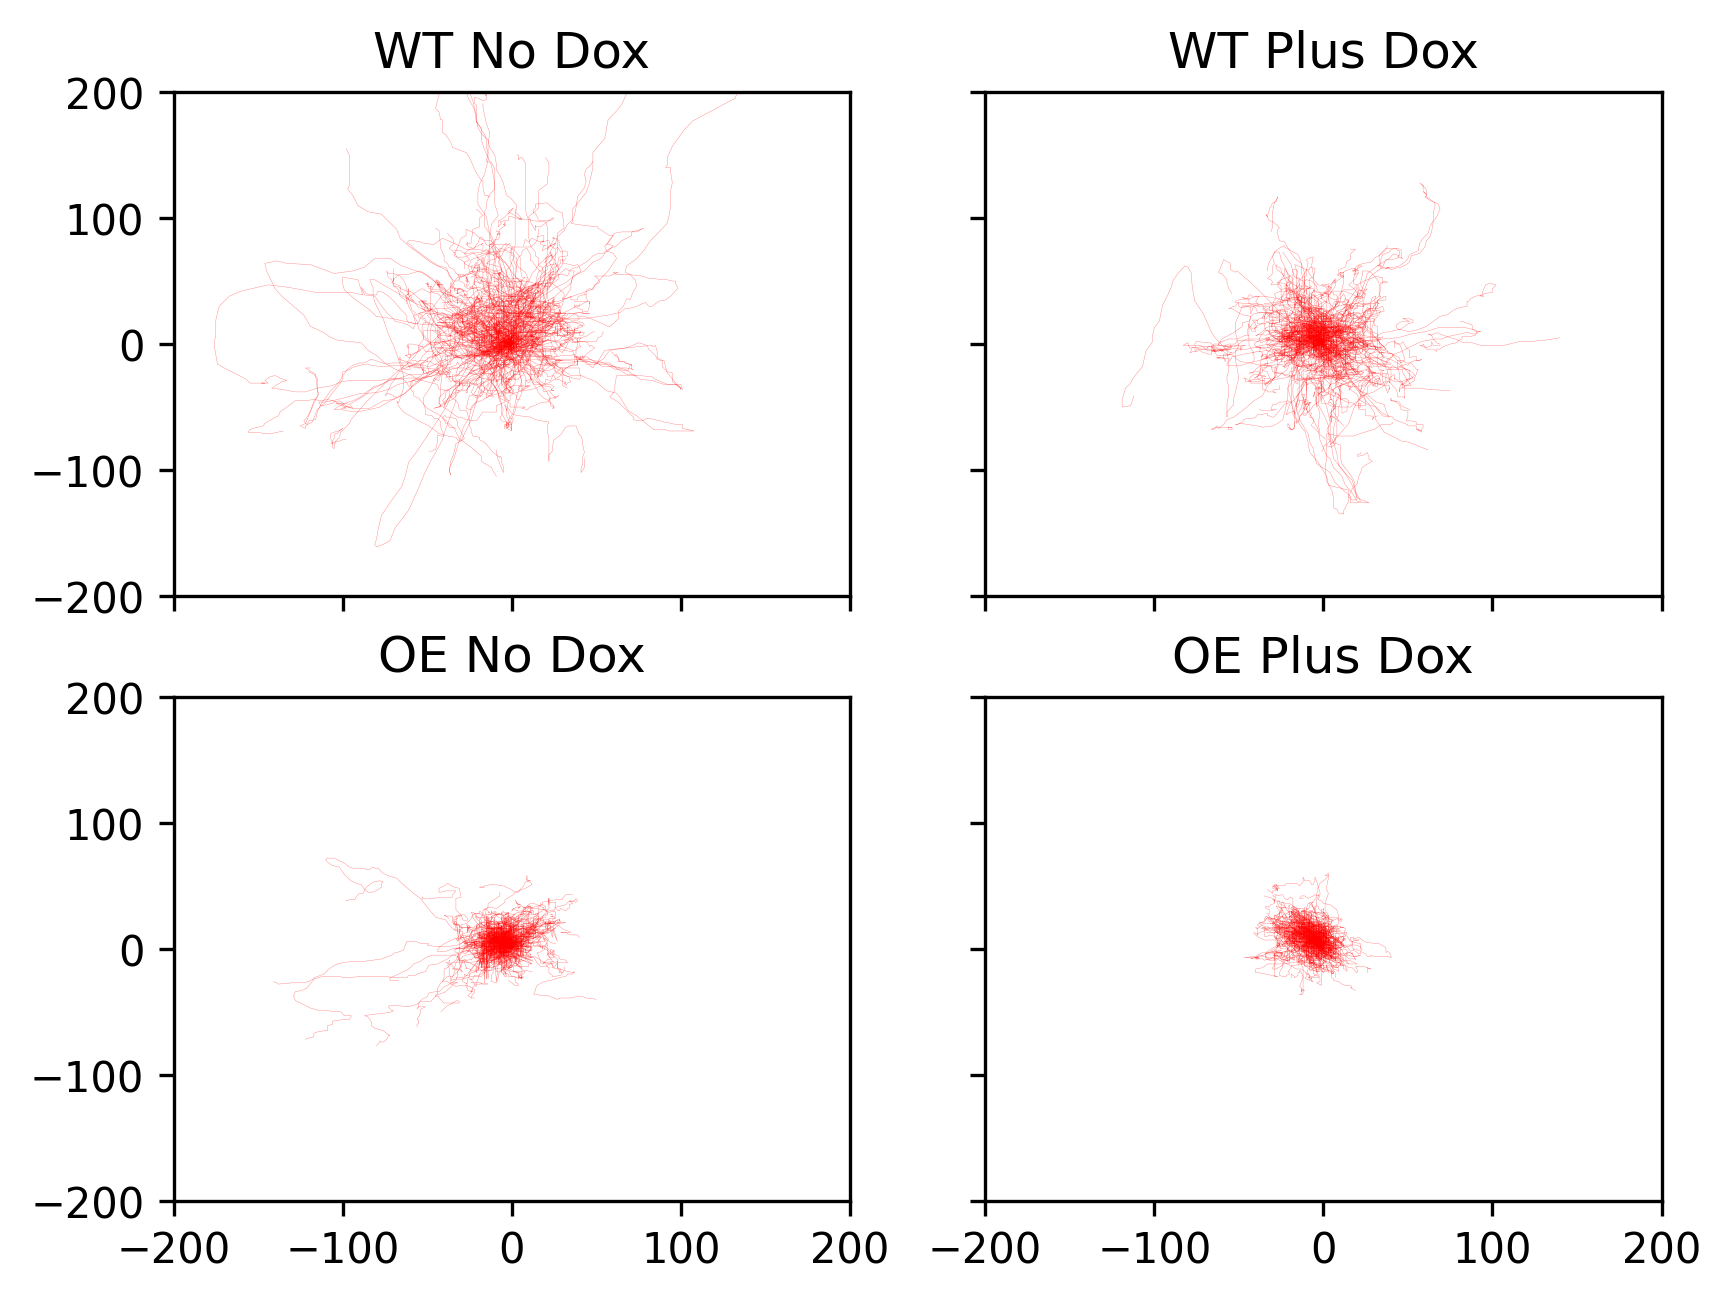

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-200,200)
plt.ylim(-200,200)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if track_id.split('_')[1] == 'RED': continue
    # elif well in ['XY11','XY12']: continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

# Plot Red Cells only

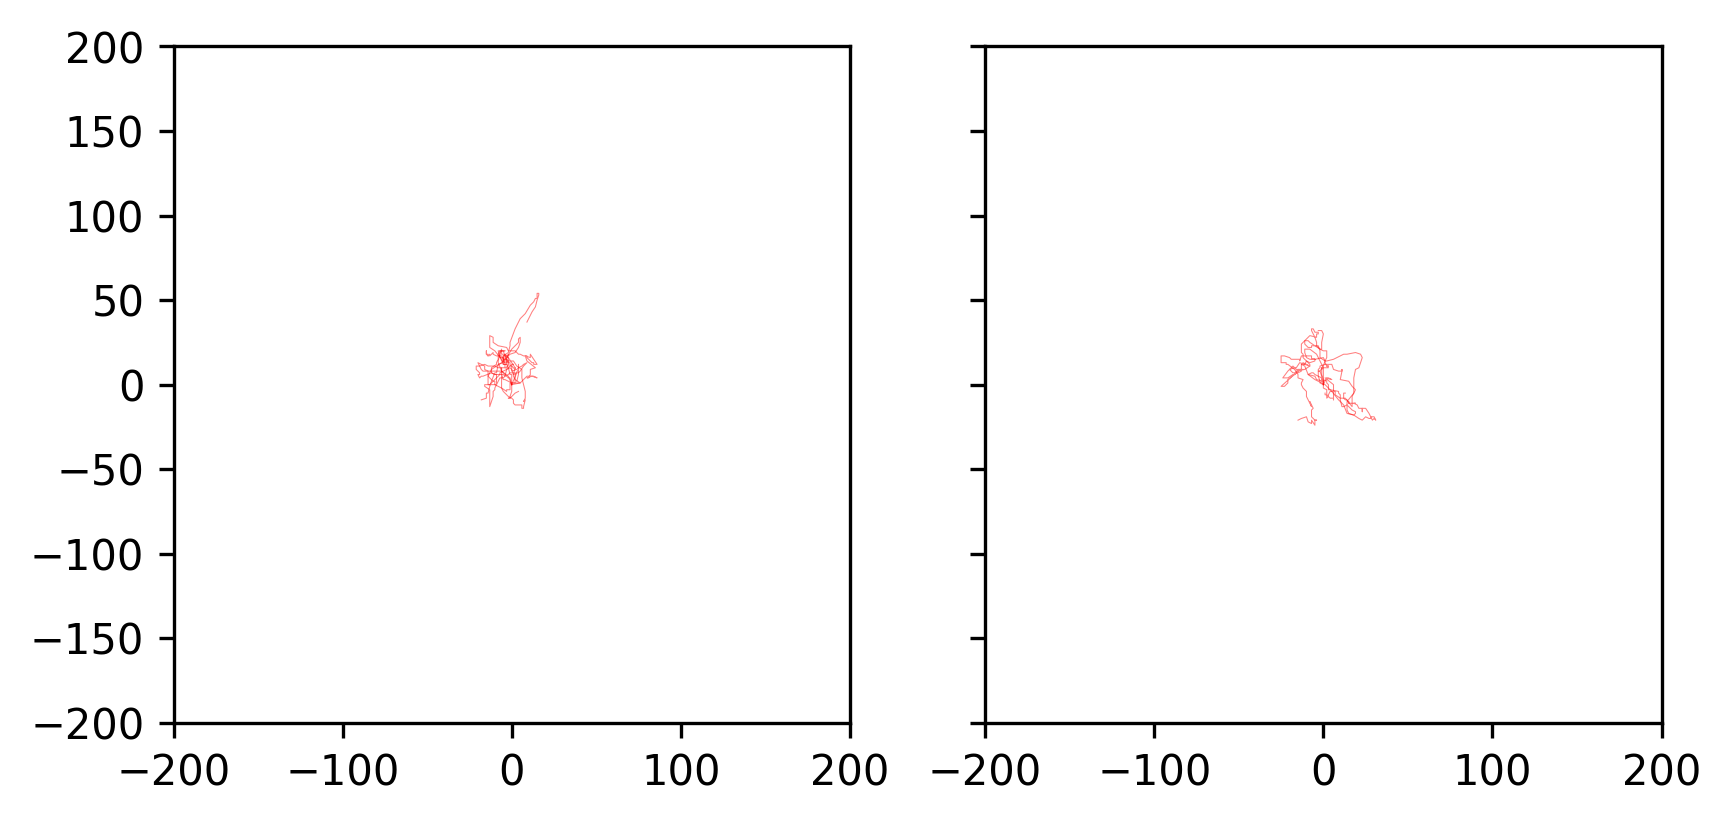

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=300, sharex=True, sharey=True)
plt.xlim(-200,200)
plt.ylim(-200,200)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if track_id.split('_')[1] != 'RED': continue
    if well=='XY07': axes[0].plot(x,y,'r-', linewidth=0.25, alpha=0.5)
    else: axes[1].plot(x,y,'r-', linewidth=0.25, alpha=0.5)

plt.show()

# Net displacement histogram

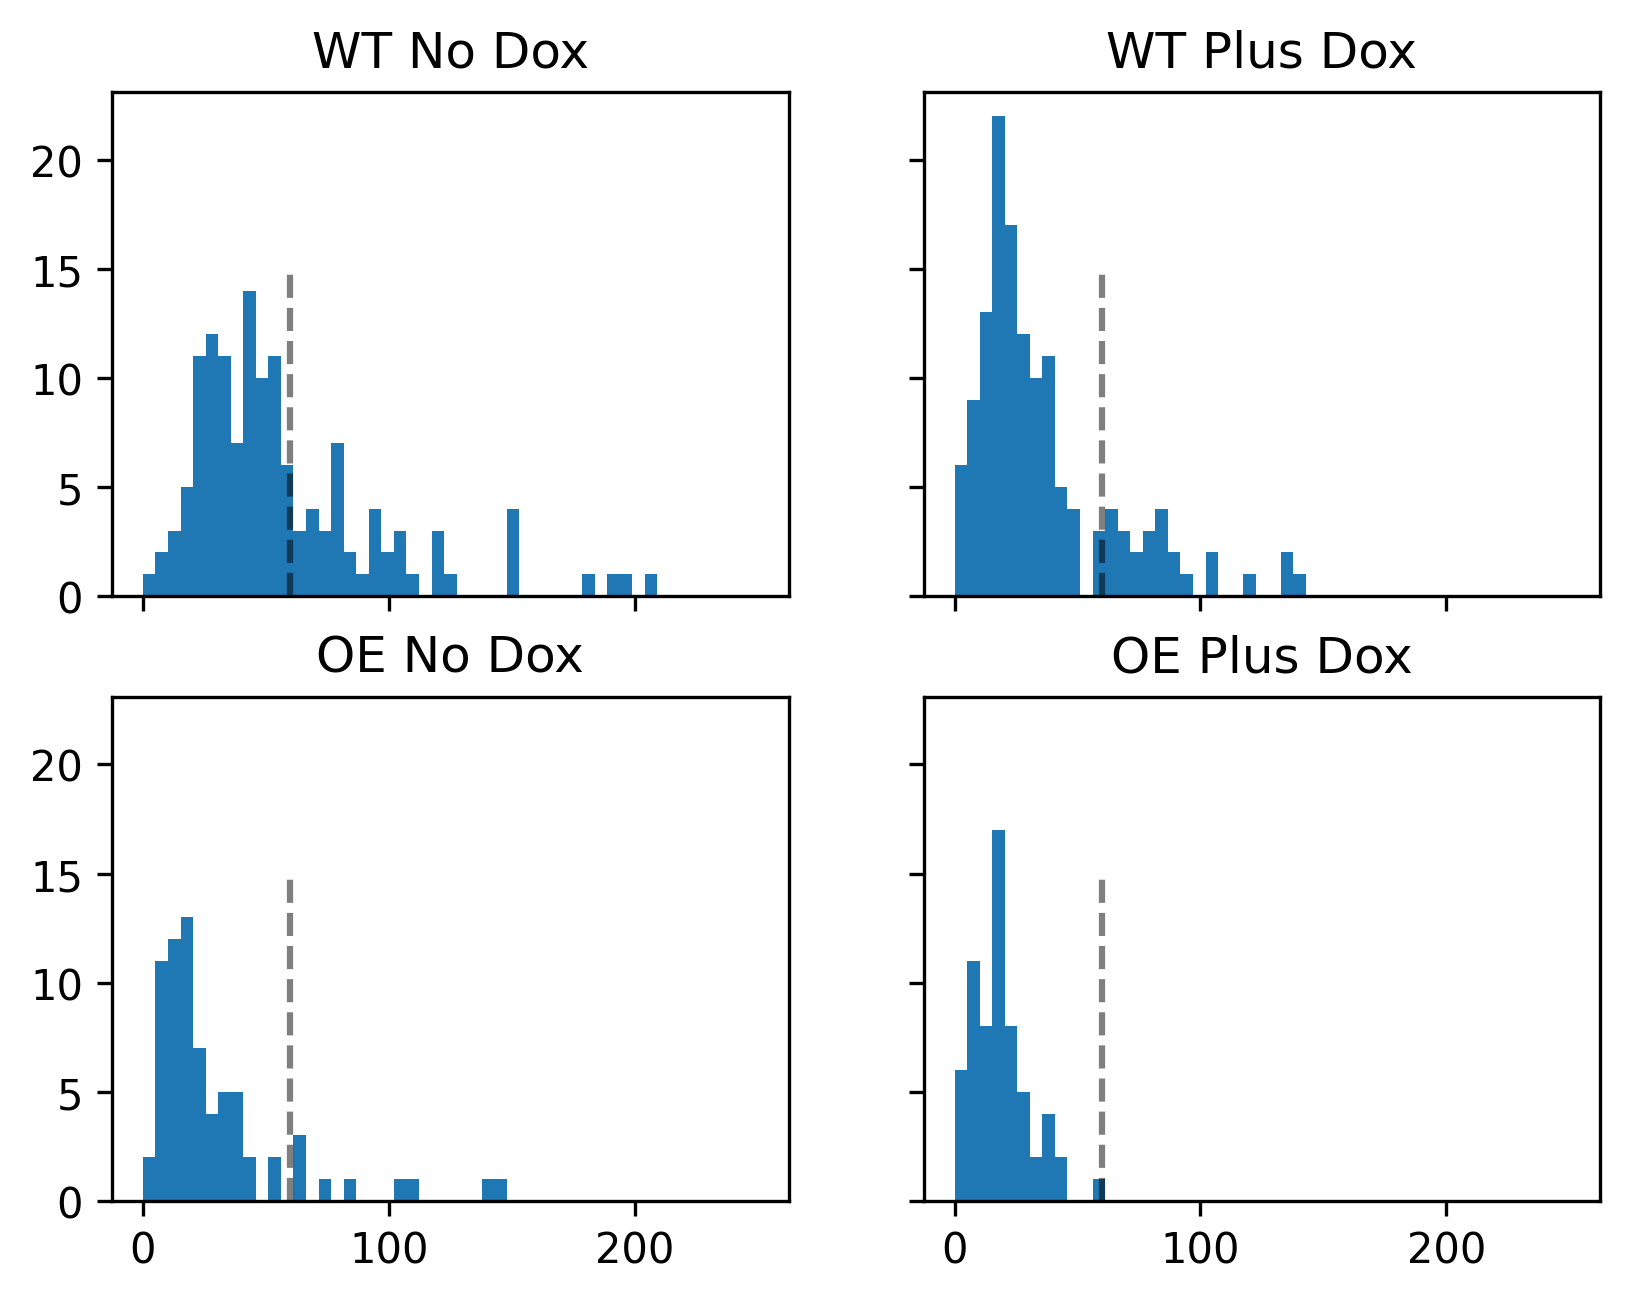

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
# plt.xlim(-200,200)
# plt.ylim(-200,200)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    x_final, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    dx = x_final - x_init
    dy = y_final - y_init
    displacement = np.sqrt((dx**2) + (dy**2))

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY11','XY12']: continue
    elif well in ['XY01','XY05','XY09']: a.append(displacement)
    elif well in ['XY02','XY06','XY10']: b.append(displacement)
    elif well in ['XY03','XY07','XY11']: c.append(displacement)
    elif well in ['XY04','XY08','XY12']: d.append(displacement)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,250,50))
axes[0,1].hist(b, bins=np.linspace(0,250,50))
axes[1,0].hist(c, bins=np.linspace(0,250,50))
axes[1,1].hist(d, bins=np.linspace(0,250,50))

axes[0,0].plot([60,60], [0,15], 'k--', alpha=0.5)
axes[0,1].plot([60,60], [0,15], 'k--', alpha=0.5)
axes[1,0].plot([60,60], [0,15], 'k--', alpha=0.5)
axes[1,1].plot([60,60], [0,15], 'k--', alpha=0.5)

plt.show()

In [12]:
print((np.array(a)>60).sum())
print((np.array(b)>60).sum())
print((np.array(c)>60).sum())
print((np.array(d)>60).sum())


26
11
8
1


In [15]:
(8/26) * (11/26) * 26

3.3846153846153846

## Stats

In [170]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

8.729757298052064e-06
0.004206851975644435
7.432363891382661e-08
0.47139484486030825
0.006940763431570478
0.01094398071216248


In [171]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

3.3320396740195415e-08
2.2181524098173134e-06
2.255432683694894e-12
0.7860545288671109
0.0063850853931795735
0.0344768375044154


## Bar graph net displacement

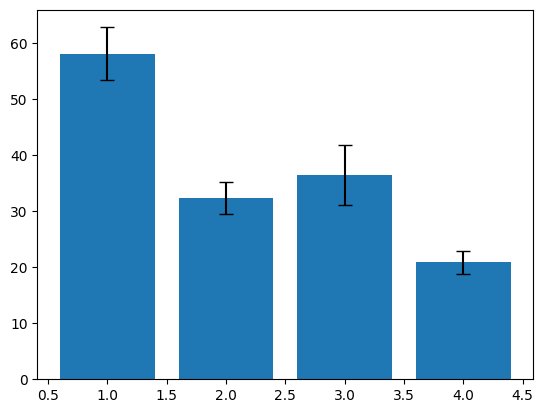

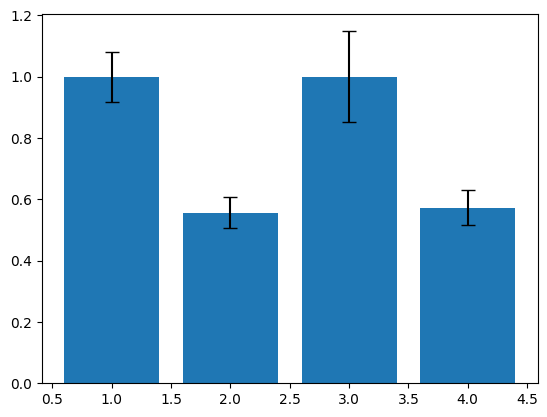

0.44721088029393274


In [21]:
total_displacements = [np.array(data) for data in [a,b,c,d]]
plt.bar([1,2,3,4], height=[data.mean() for data in total_displacements], yerr=[np.std(data)/np.sqrt(len(data)) for data in total_displacements], capsize=5)
# plt.ylim(0,125)
plt.show()

total_displacements[1] = total_displacements[1] / total_displacements[0].mean()
total_displacements[0] = total_displacements[0] / total_displacements[0].mean()
total_displacements[3] = total_displacements[3] / total_displacements[2].mean()
total_displacements[2] = total_displacements[2] / total_displacements[2].mean()

plt.bar([1,2,3,4], height=[data.mean() for data in total_displacements], yerr=[np.std(data)/np.sqrt(len(data)) for data in total_displacements], capsize=5)
# plt.ylim(0,125)
plt.show()
print(ranksums(total_displacements[1], total_displacements[3]).pvalue)

# Mean displacement per step histograms

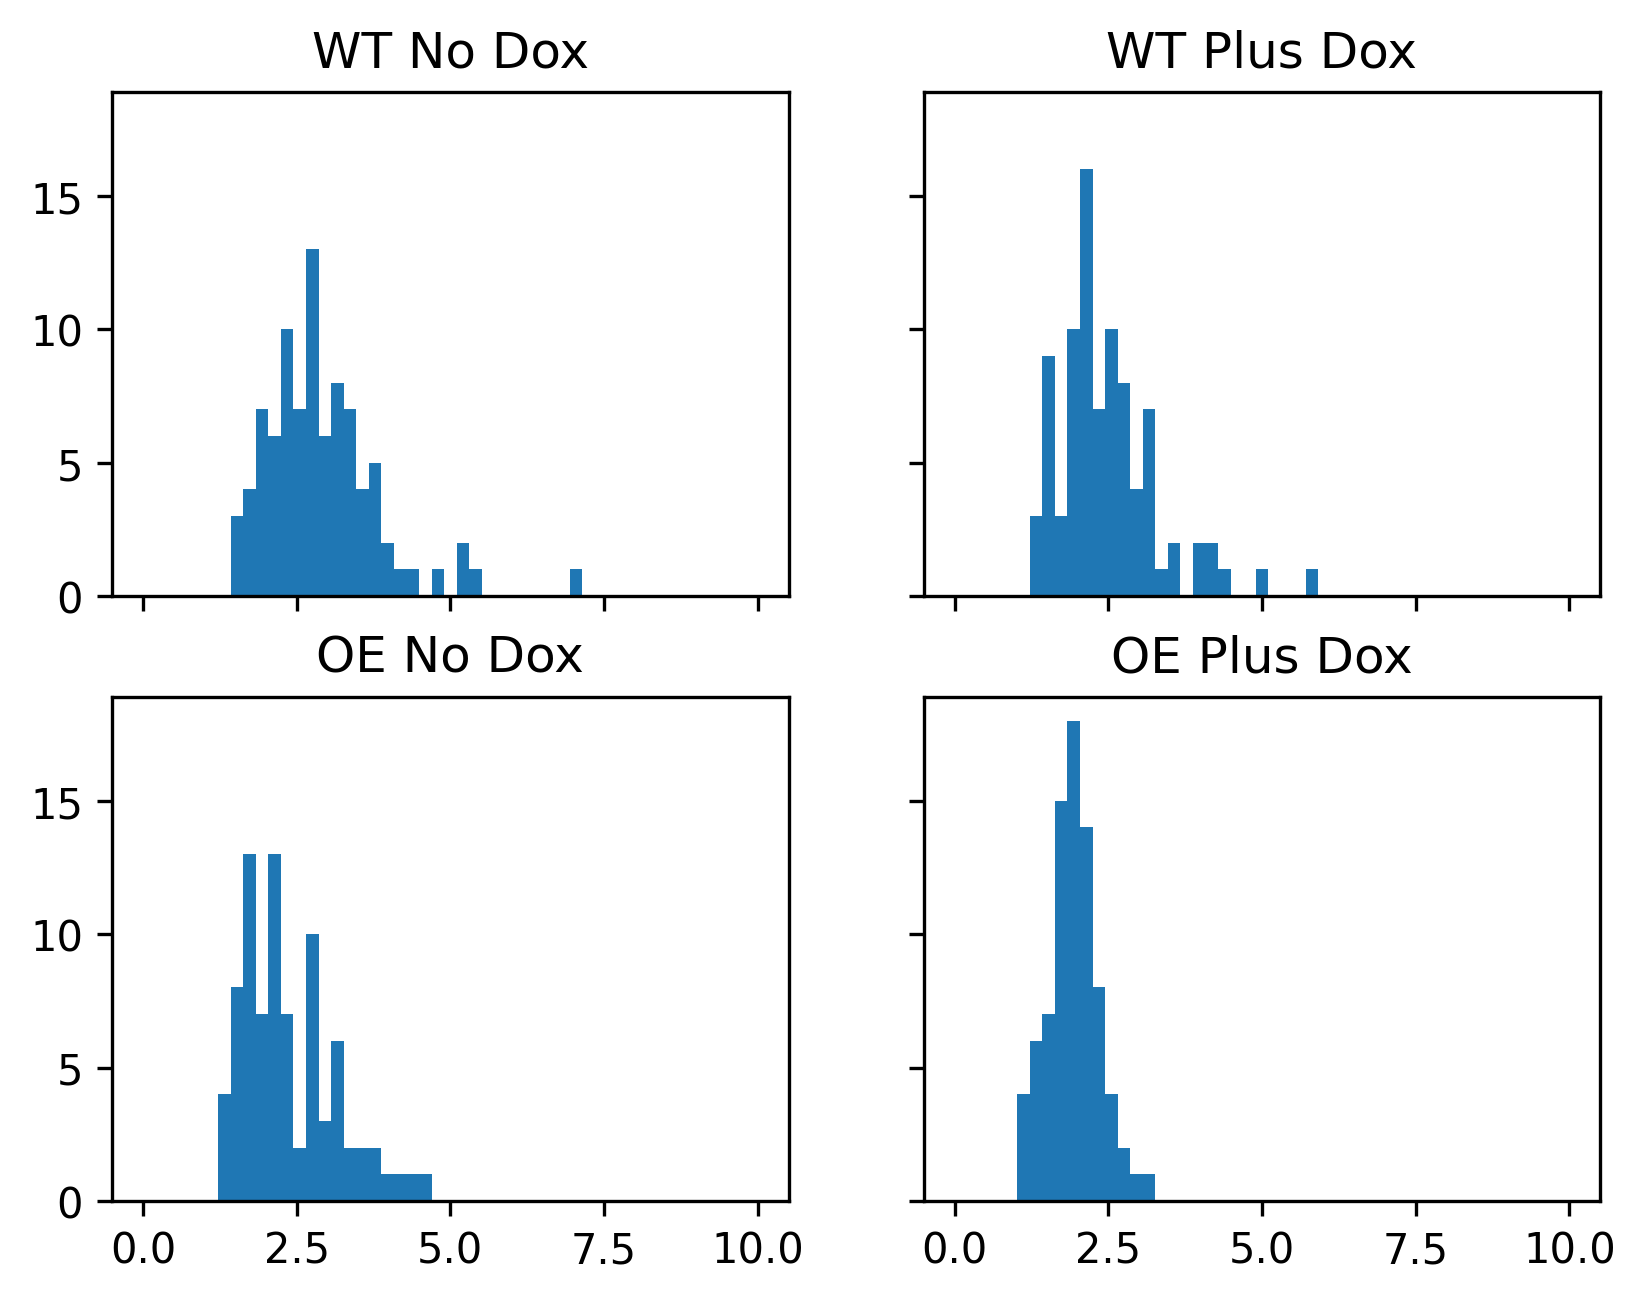

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    mean_displacement = np.sqrt((dx**2) + (dy**2)).mean()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: a.append(mean_displacement)
    elif well in ['XY02','XY06','XY10']: b.append(mean_displacement)
    elif well in ['XY03','XY07','XY11']: c.append(mean_displacement)
    elif well in ['XY04','XY08','XY12']: d.append(mean_displacement)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,10,50))
axes[0,1].hist(b, bins=np.linspace(0,10,50))
axes[1,0].hist(c, bins=np.linspace(0,10,50))
axes[1,1].hist(d, bins=np.linspace(0,10,50))

plt.show()

## Stats

In [77]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

0.0014870836700877589
4.183973389787009e-05
4.137225081605731e-15
0.31396066560959307
1.6718653906111922e-07
1.4835837061370562e-05


In [78]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.0003861739982248855
2.1503970956005532e-05
1.8128189877808064e-15
0.3028673517420156
3.572349966832858e-07
0.00048502926677112575


## Bar graph mean displacement

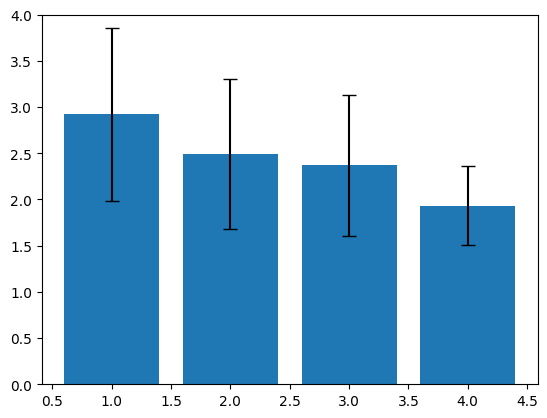

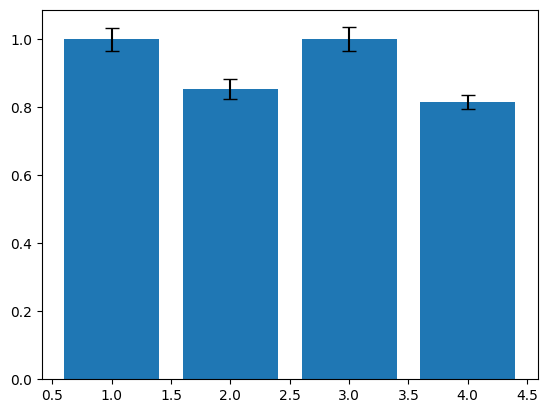

0.9005723110239939


In [4]:
total_displacements = [np.array(data) for data in [a,b,c,d]]
plt.bar([1,2,3,4], height=[data.mean() for data in total_displacements], yerr=[data.std() for data in total_displacements], capsize=5)
plt.ylim(0,4)
plt.show()

total_displacements[1] = total_displacements[1] / total_displacements[0].mean()
total_displacements[0] = total_displacements[0] / total_displacements[0].mean()
total_displacements[3] = total_displacements[3] / total_displacements[2].mean()
total_displacements[2] = total_displacements[2] / total_displacements[2].mean()

plt.bar([1,2,3,4], height=[data.mean() for data in total_displacements], yerr=[np.std(data)/np.sqrt(len(data)) for data in total_displacements], capsize=5)
# plt.ylim(0,125)
plt.show()
print(ranksums(total_displacements[1], total_displacements[3]).pvalue)

# Plot data by ring

## Ring 0

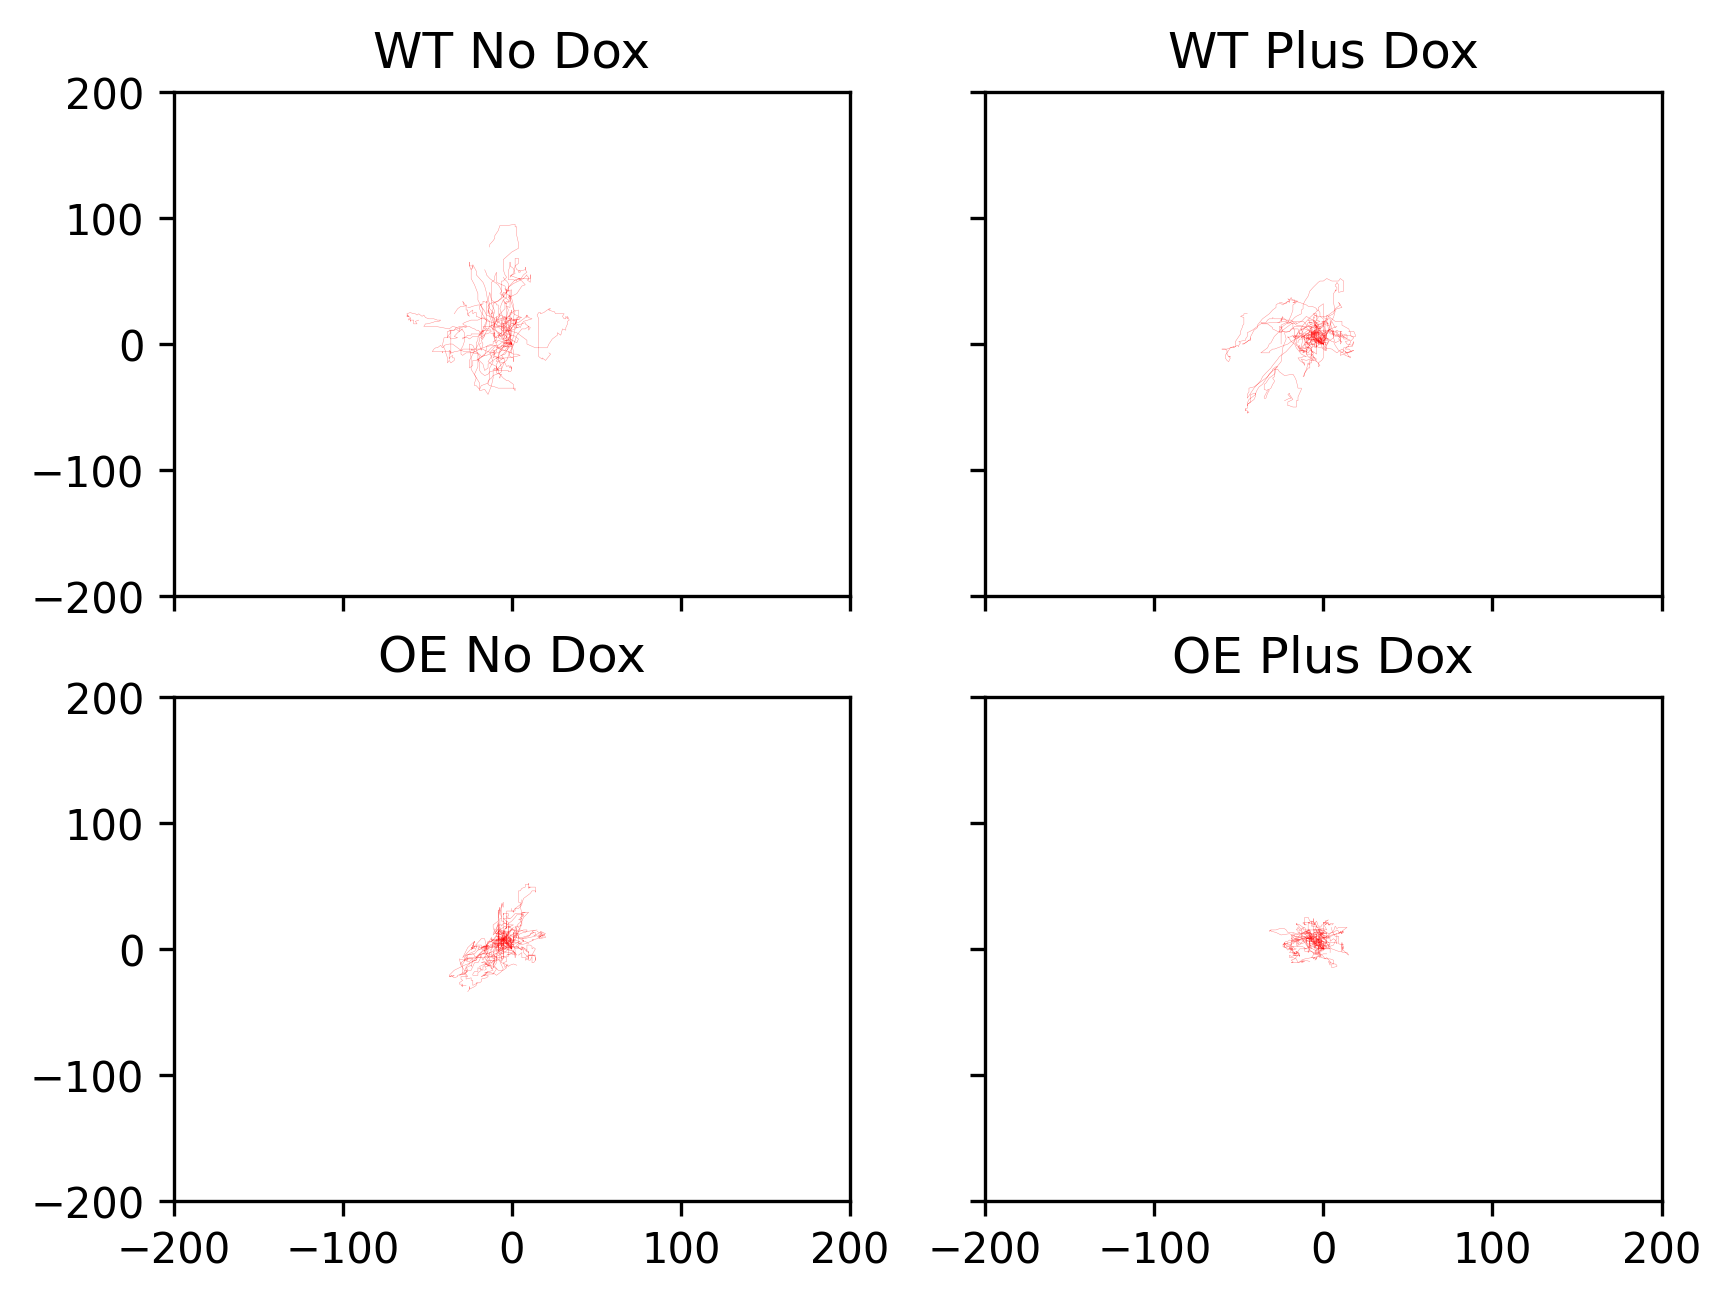

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-200,200)
plt.ylim(-200,200)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if track_id.split('_')[1] != '0': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Ring 1

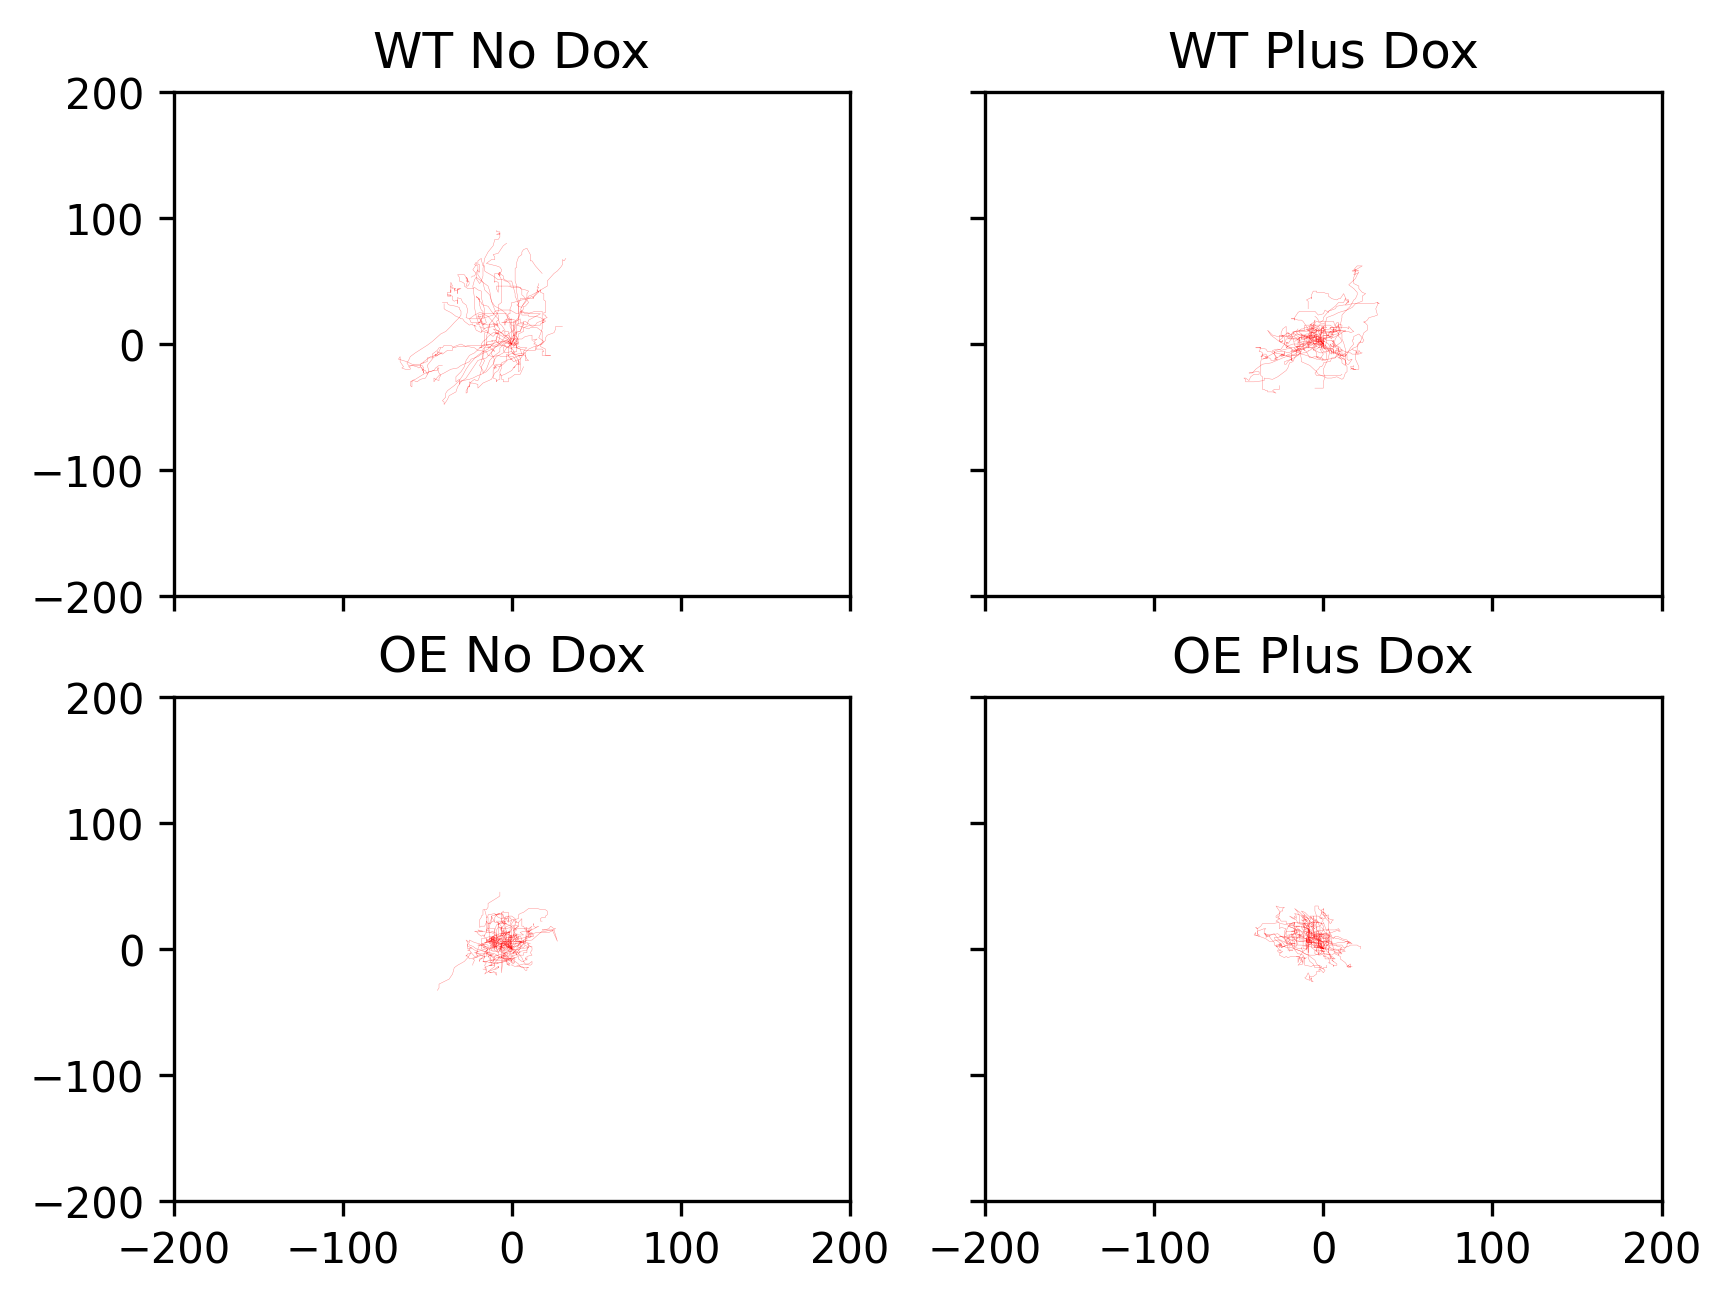

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-200,200)
plt.ylim(-200,200)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if track_id.split('_')[1] != '1': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Ring 2

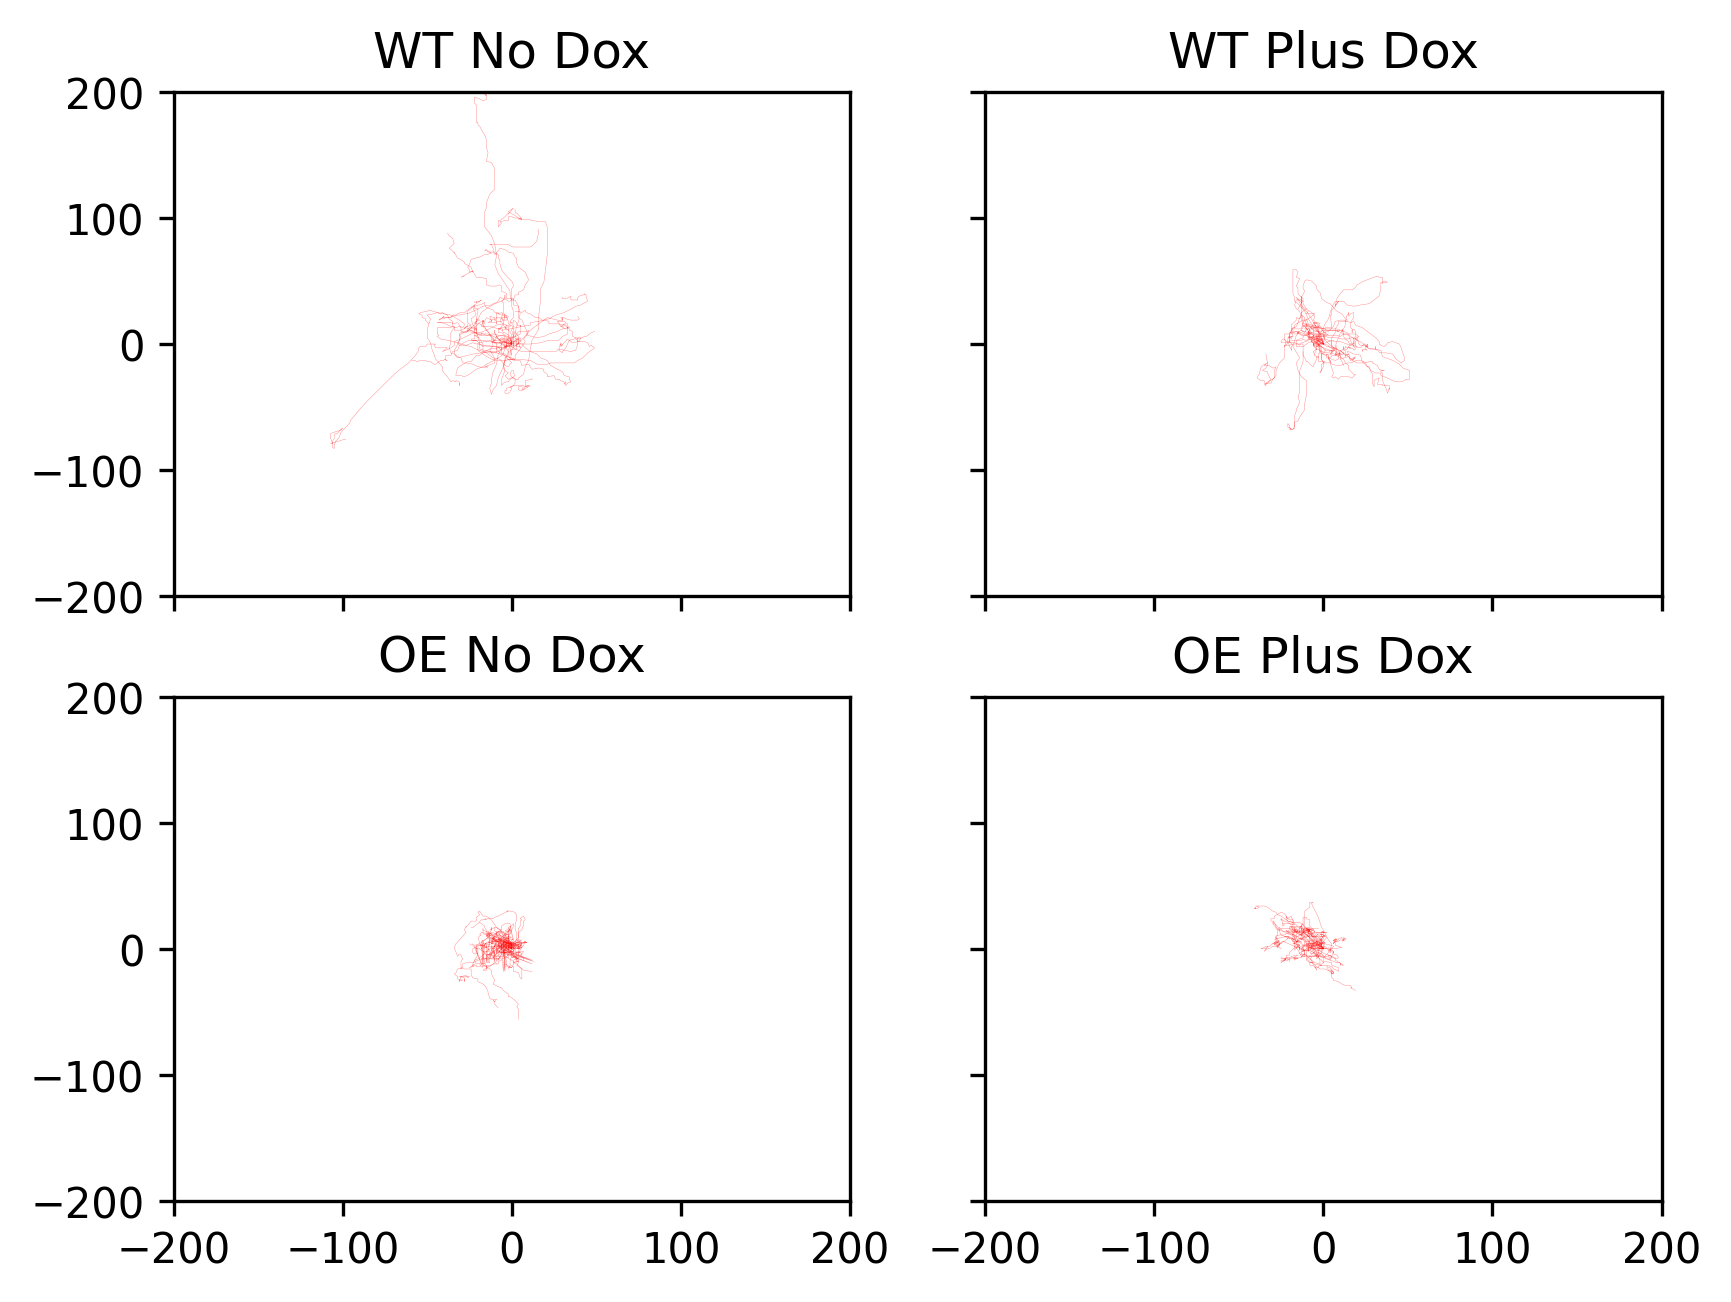

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-200,200)
plt.ylim(-200,200)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if track_id.split('_')[1] != '2': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Ring 3

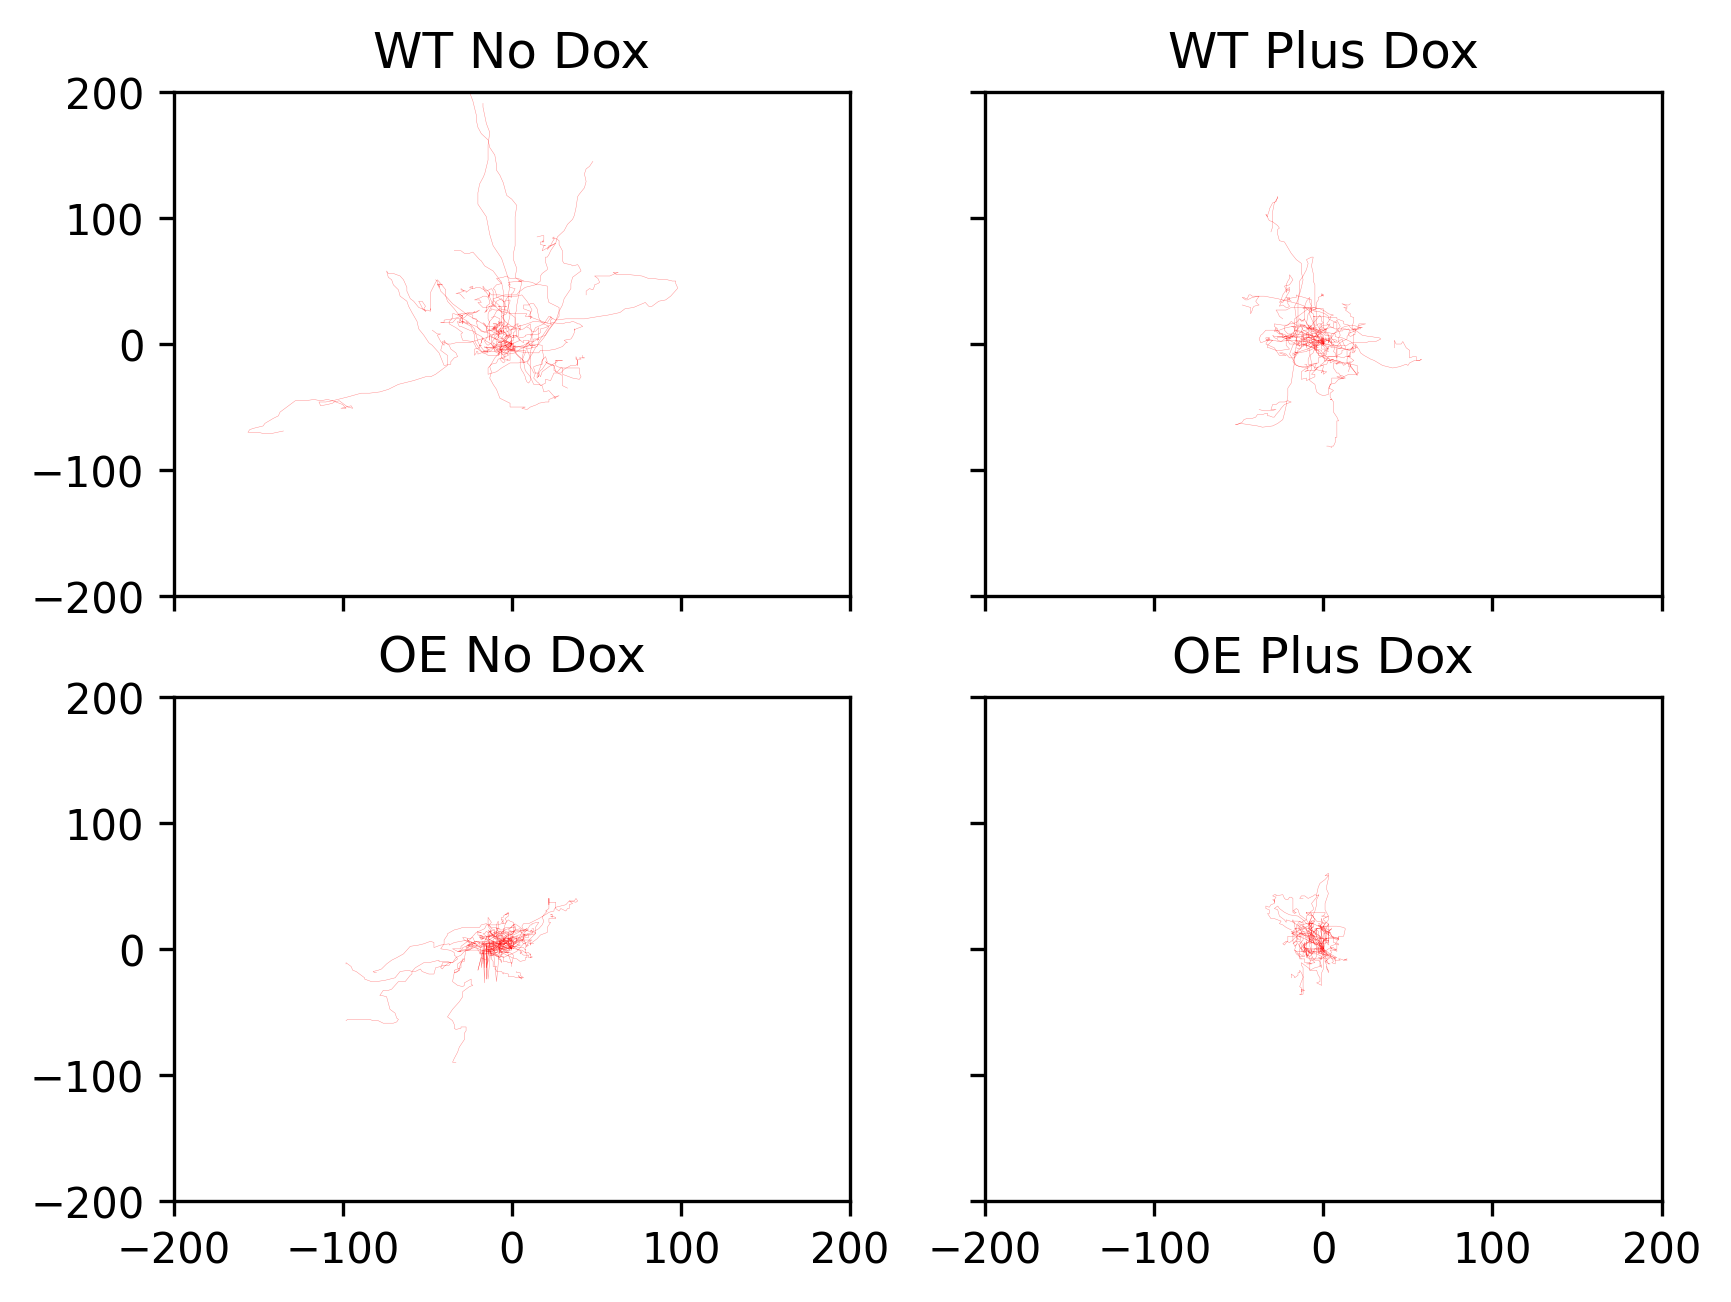

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-200,200)
plt.ylim(-200,200)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if track_id.split('_')[1] != '3': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Ring 4

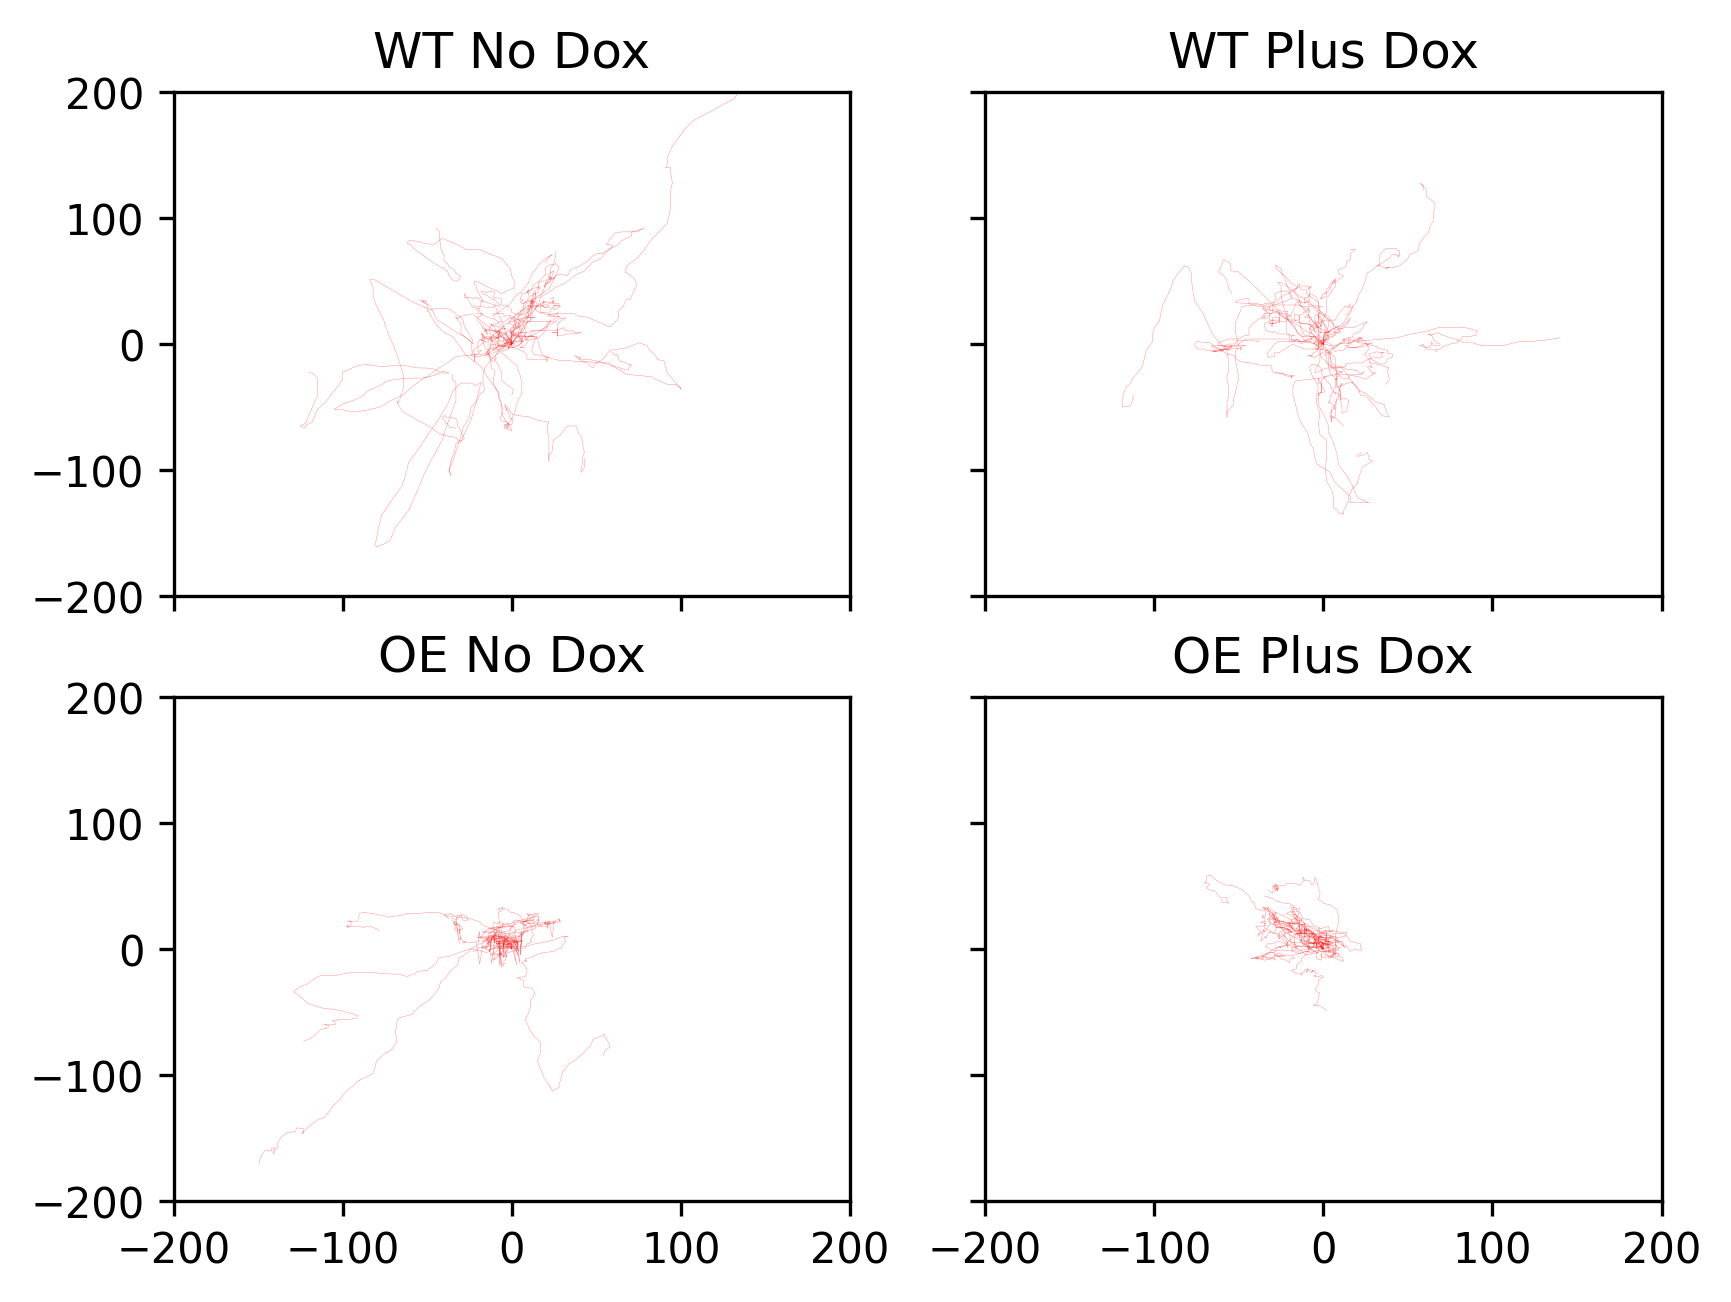

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-200,200)
plt.ylim(-200,200)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if track_id.split('_')[1] != '4': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Ring 3 total displacement

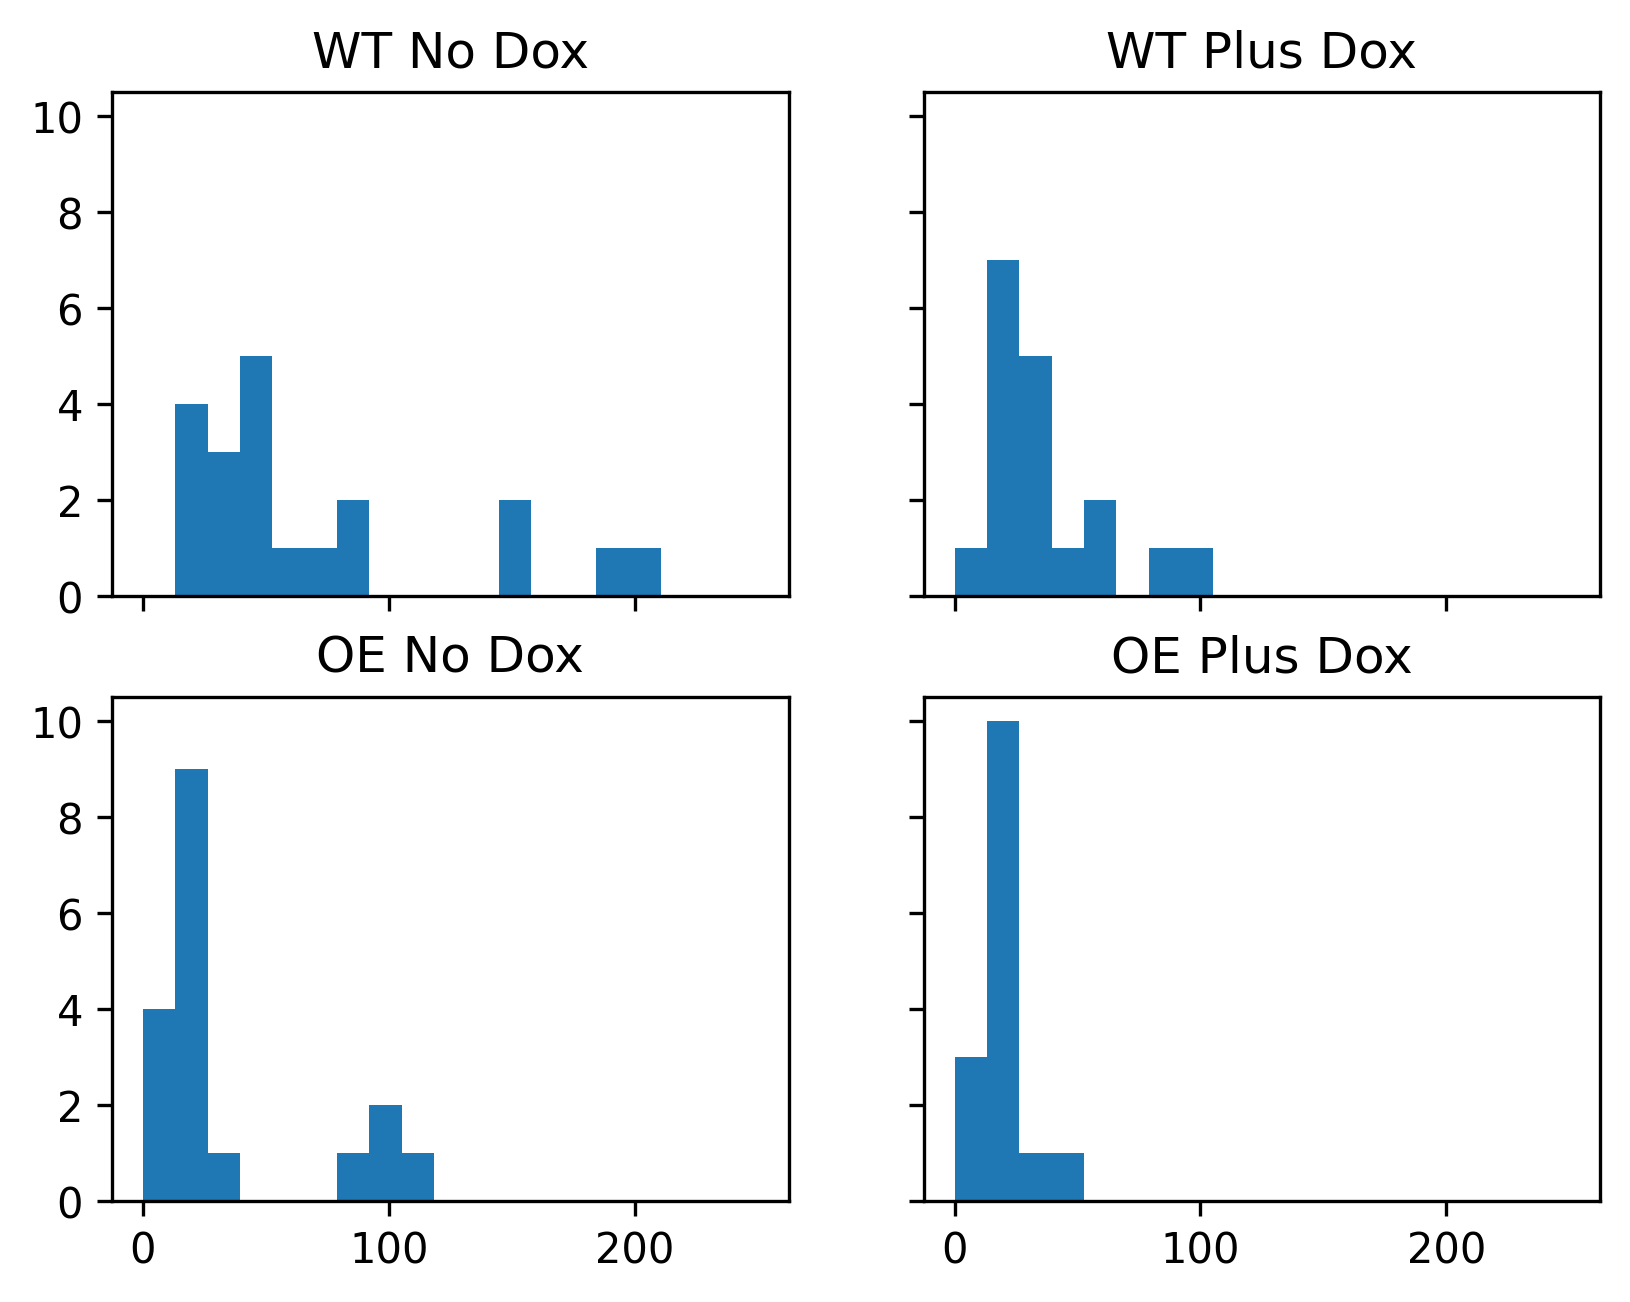

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
# plt.xlim(-200,200)
# plt.ylim(-200,200)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    x_final, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    dx = x_final - x_init
    dy = y_final - y_init
    displacement = np.sqrt((dx**2) + (dy**2))

    if track_id.split('_')[1] != '3': continue
    elif well in ['XY01','XY05','XY09']: a.append(displacement)
    elif well in ['XY02','XY06','XY10']: b.append(displacement)
    elif well in ['XY03','XY07','XY11']: c.append(displacement)
    elif well in ['XY04','XY08','XY12']: d.append(displacement)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,250,20))
axes[0,1].hist(b, bins=np.linspace(0,250,20))
axes[1,0].hist(c, bins=np.linspace(0,250,20))
axes[1,1].hist(d, bins=np.linspace(0,250,20))

plt.show()

### Stats

In [95]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

0.026762655720955382
0.03187684180705603
0.0015803235443457718
0.8917647343134045
0.008807100946202519
0.08201840749775118


In [96]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.037921337713852296
0.005006959790552178
4.1315013825093434e-05
0.1545226206284662
0.005370282255081932
0.5387949380177839


## Ring 3 mean displacement

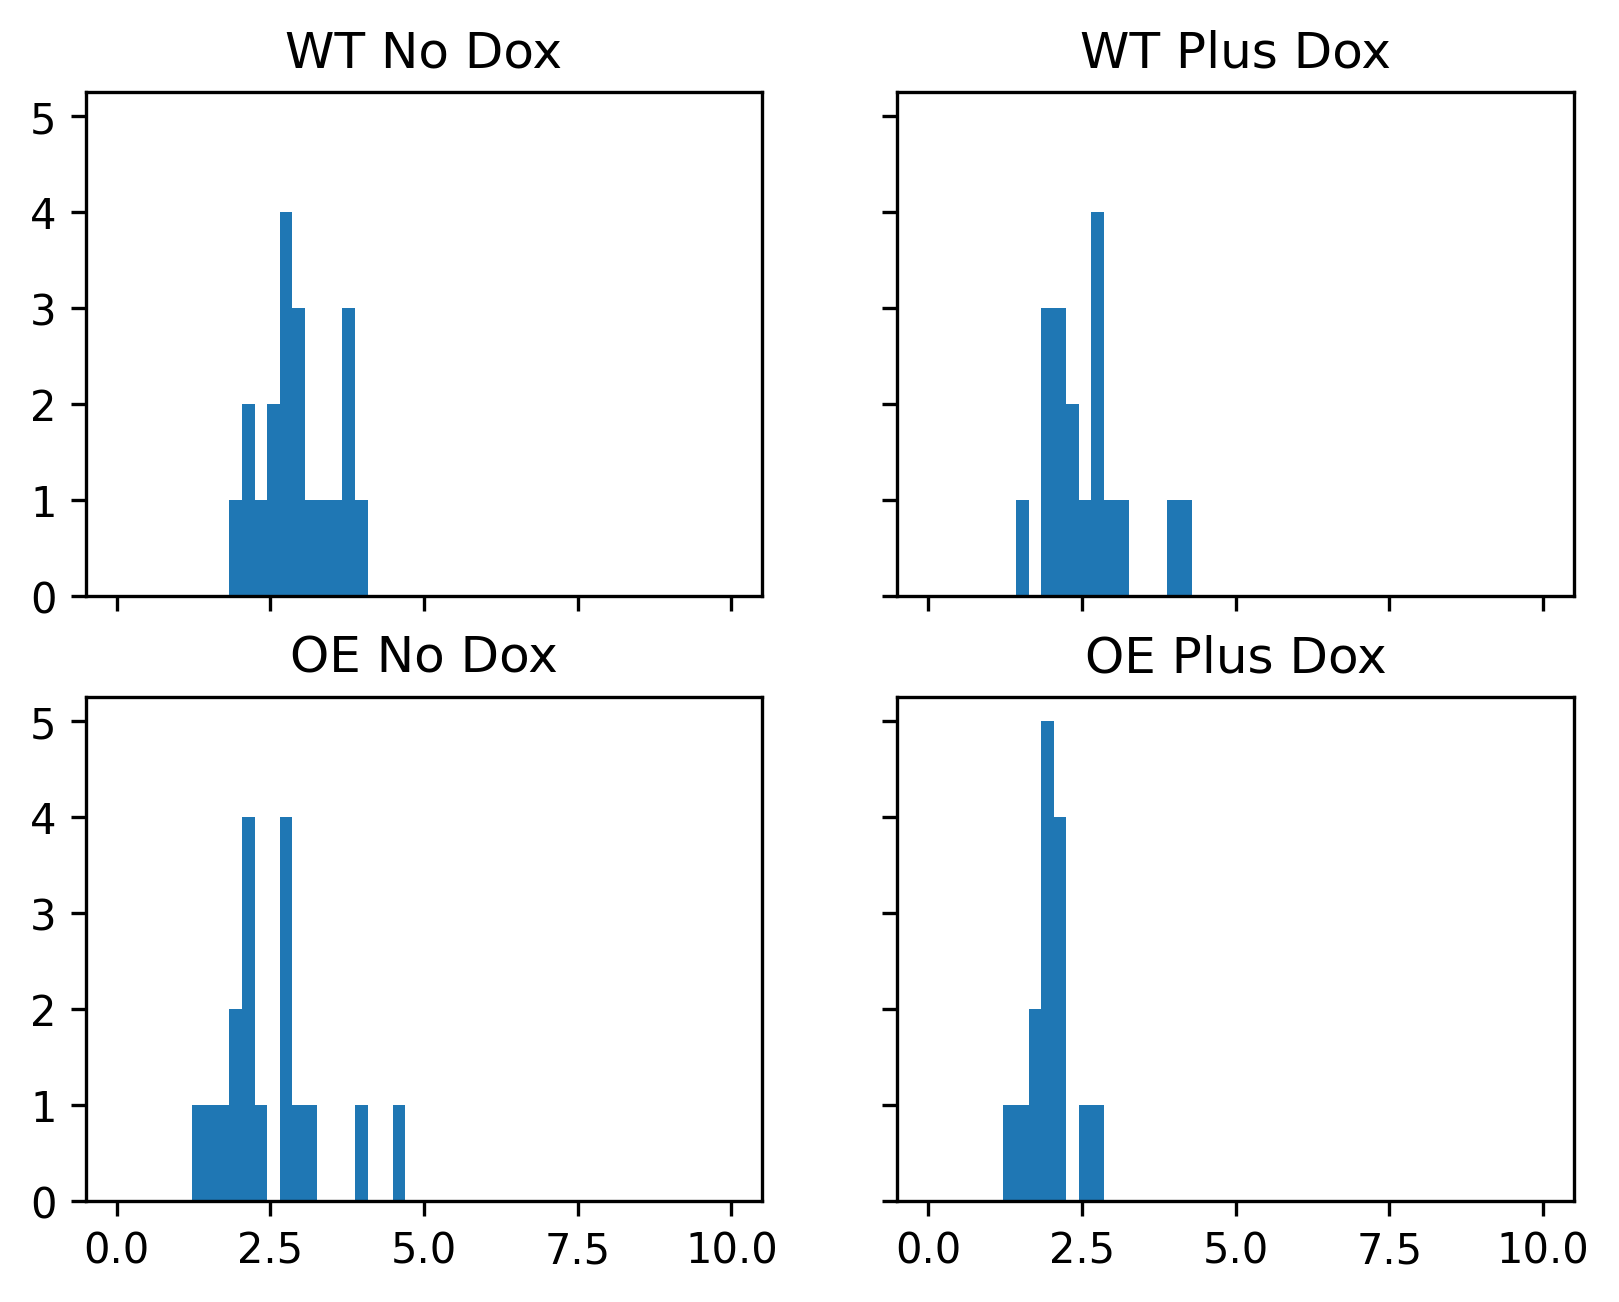

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    mean_displacement = np.sqrt((dx**2) + (dy**2)).mean()

    if track_id.split('_')[1] != '3': continue
    elif well in ['XY01','XY05','XY09']: a.append(mean_displacement)
    elif well in ['XY02','XY06','XY10']: b.append(mean_displacement)
    elif well in ['XY03','XY07','XY11']: c.append(mean_displacement)
    elif well in ['XY04','XY08','XY12']: d.append(mean_displacement)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,10,50))
axes[0,1].hist(b, bins=np.linspace(0,10,50))
axes[1,0].hist(c, bins=np.linspace(0,10,50))
axes[1,1].hist(d, bins=np.linspace(0,10,50))

plt.show()

### Stats

In [98]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

0.08300042749547752
0.07829060913631486
1.0982210810752971e-05
0.8395314200260586
0.010264508143859262
0.043376179054382916


In [99]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.06989561022728952
0.057394761418403314
6.334248366623973e-05
0.7758376742179303
0.008307238564936717
0.055337220313911105


## Ring 4 total displacement

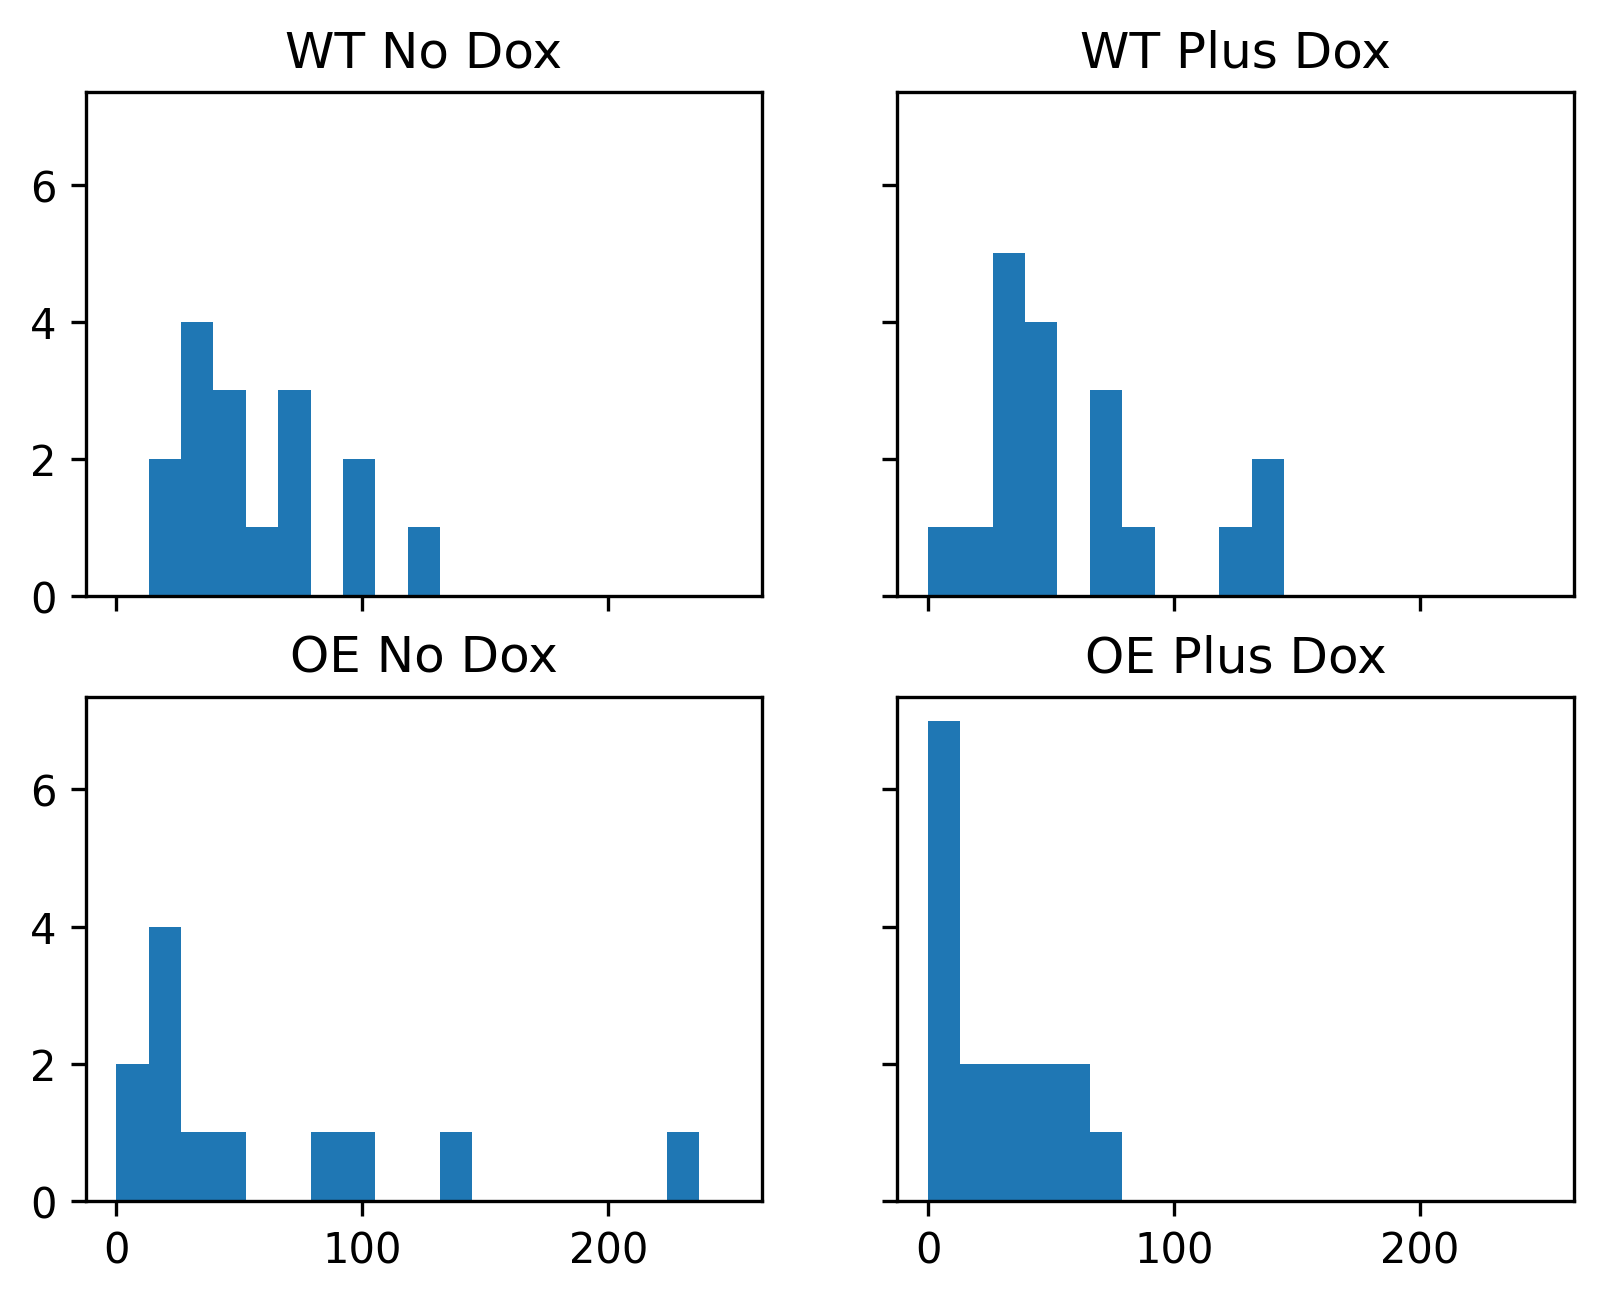

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
# plt.xlim(-200,200)
# plt.ylim(-200,200)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    x_final, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    dx = x_final - x_init
    dy = y_final - y_init
    displacement = np.sqrt((dx**2) + (dy**2))

    if track_id.split('_')[1] != '4': continue
    elif well in ['XY01','XY05','XY09']: a.append(displacement)
    elif well in ['XY02','XY06','XY10']: b.append(displacement)
    elif well in ['XY03','XY07','XY11']: c.append(displacement)
    elif well in ['XY04','XY08','XY12']: d.append(displacement)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,250,20))
axes[0,1].hist(b, bins=np.linspace(0,250,20))
axes[1,0].hist(c, bins=np.linspace(0,250,20))
axes[1,1].hist(d, bins=np.linspace(0,250,20))

plt.show()

### Stats

In [89]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

0.5716192504892648
0.7278893407593543
0.008267395433840927
0.9505228097884486
0.00531284404237401
0.06565601369653287


In [90]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.7917496014327556
0.21502687042445745
0.0027914338493665023
0.29965770663669156
0.00966062299748495
0.11447136336679034


## Ring 4 mean displacement

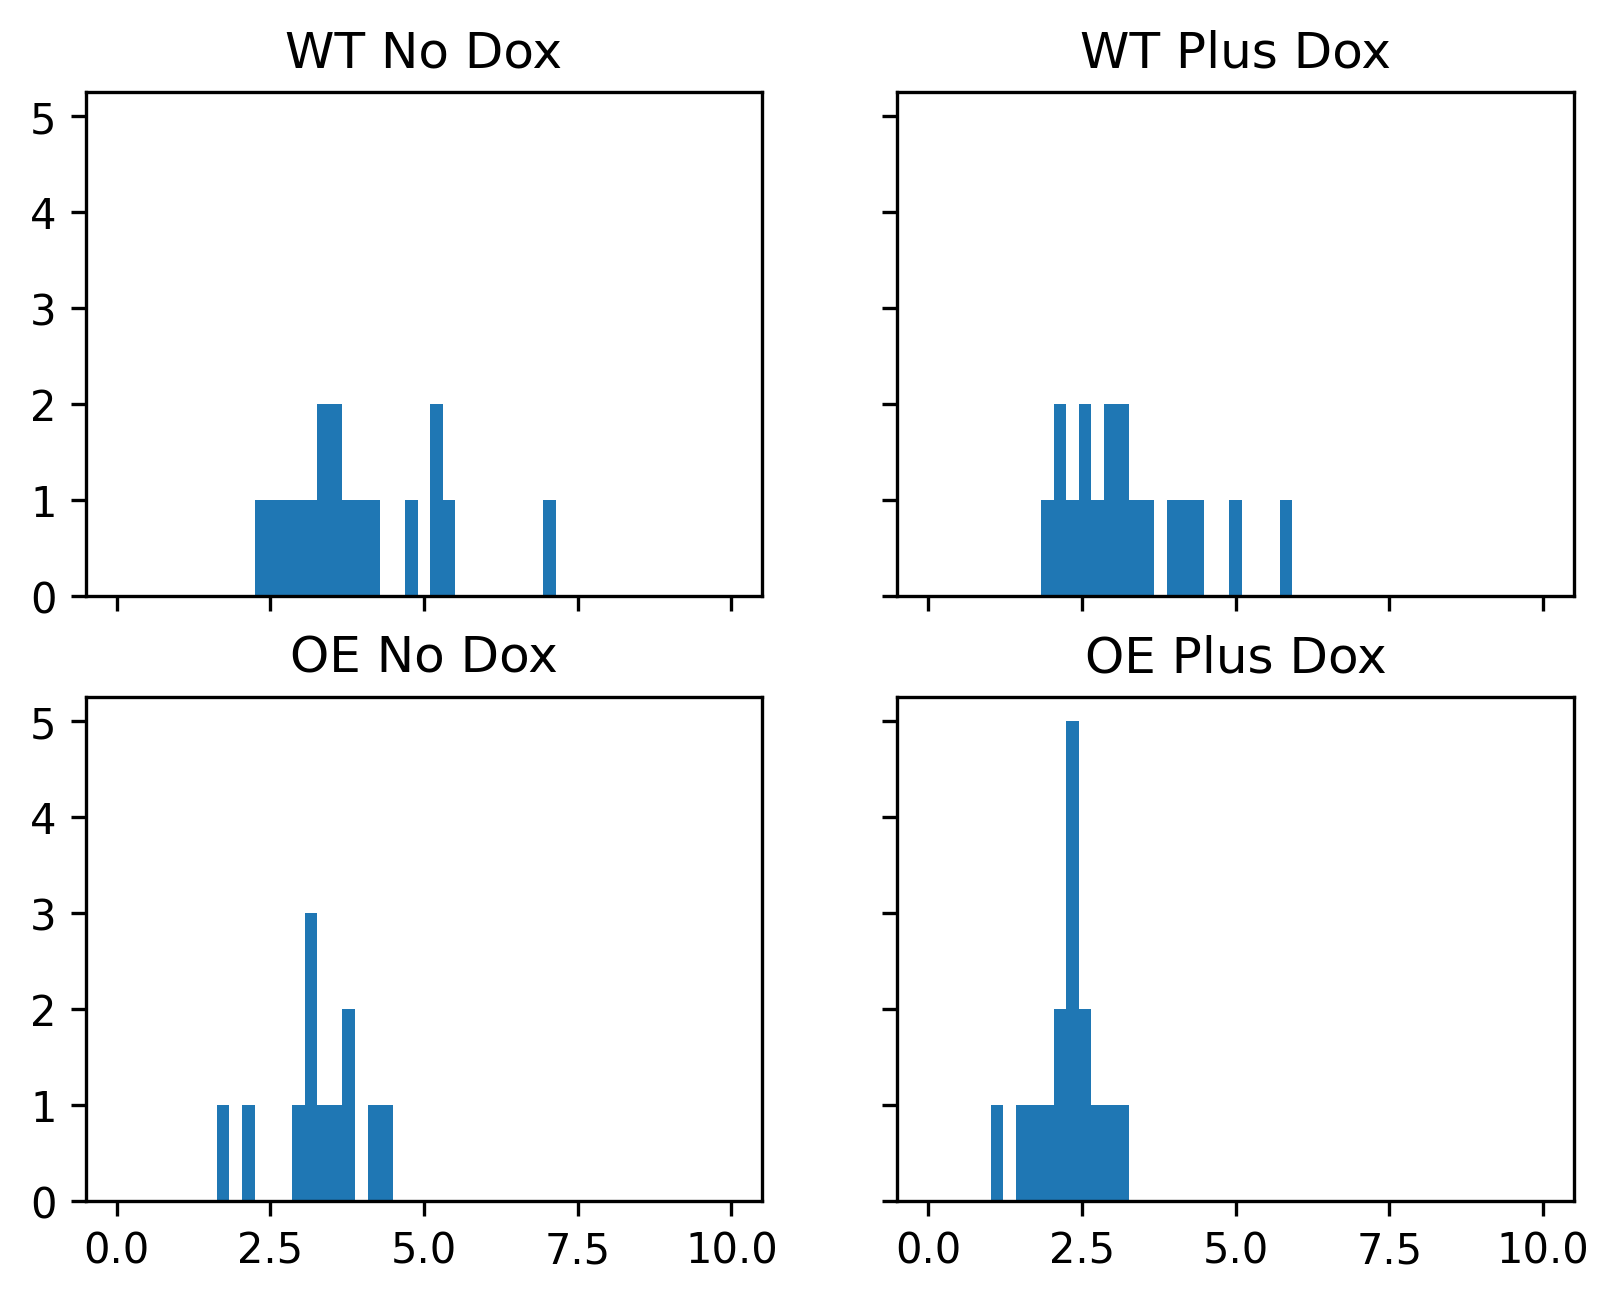

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    mean_displacement = np.sqrt((dx**2) + (dy**2)).mean()

    if track_id.split('_')[1] != '4': continue
    elif well in ['XY01','XY05','XY09']: a.append(mean_displacement)
    elif well in ['XY02','XY06','XY10']: b.append(mean_displacement)
    elif well in ['XY03','XY07','XY11']: c.append(mean_displacement)
    elif well in ['XY04','XY08','XY12']: d.append(mean_displacement)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,10,50))
axes[0,1].hist(b, bins=np.linspace(0,10,50))
axes[1,0].hist(c, bins=np.linspace(0,10,50))
axes[1,1].hist(d, bins=np.linspace(0,10,50))

plt.show()

### Stats

In [92]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

0.08480909087901768
0.10265572977575338
1.777183713059598e-05
0.9931157140998781
0.0013883722359378098
0.00028656023319154685


In [93]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.07470593331213043
0.1990924202385259
2.1321276587664618e-05
0.5820903879024839
0.0016906419619070758
0.0013588851925967185


## Ring 3 histogram of all displacements

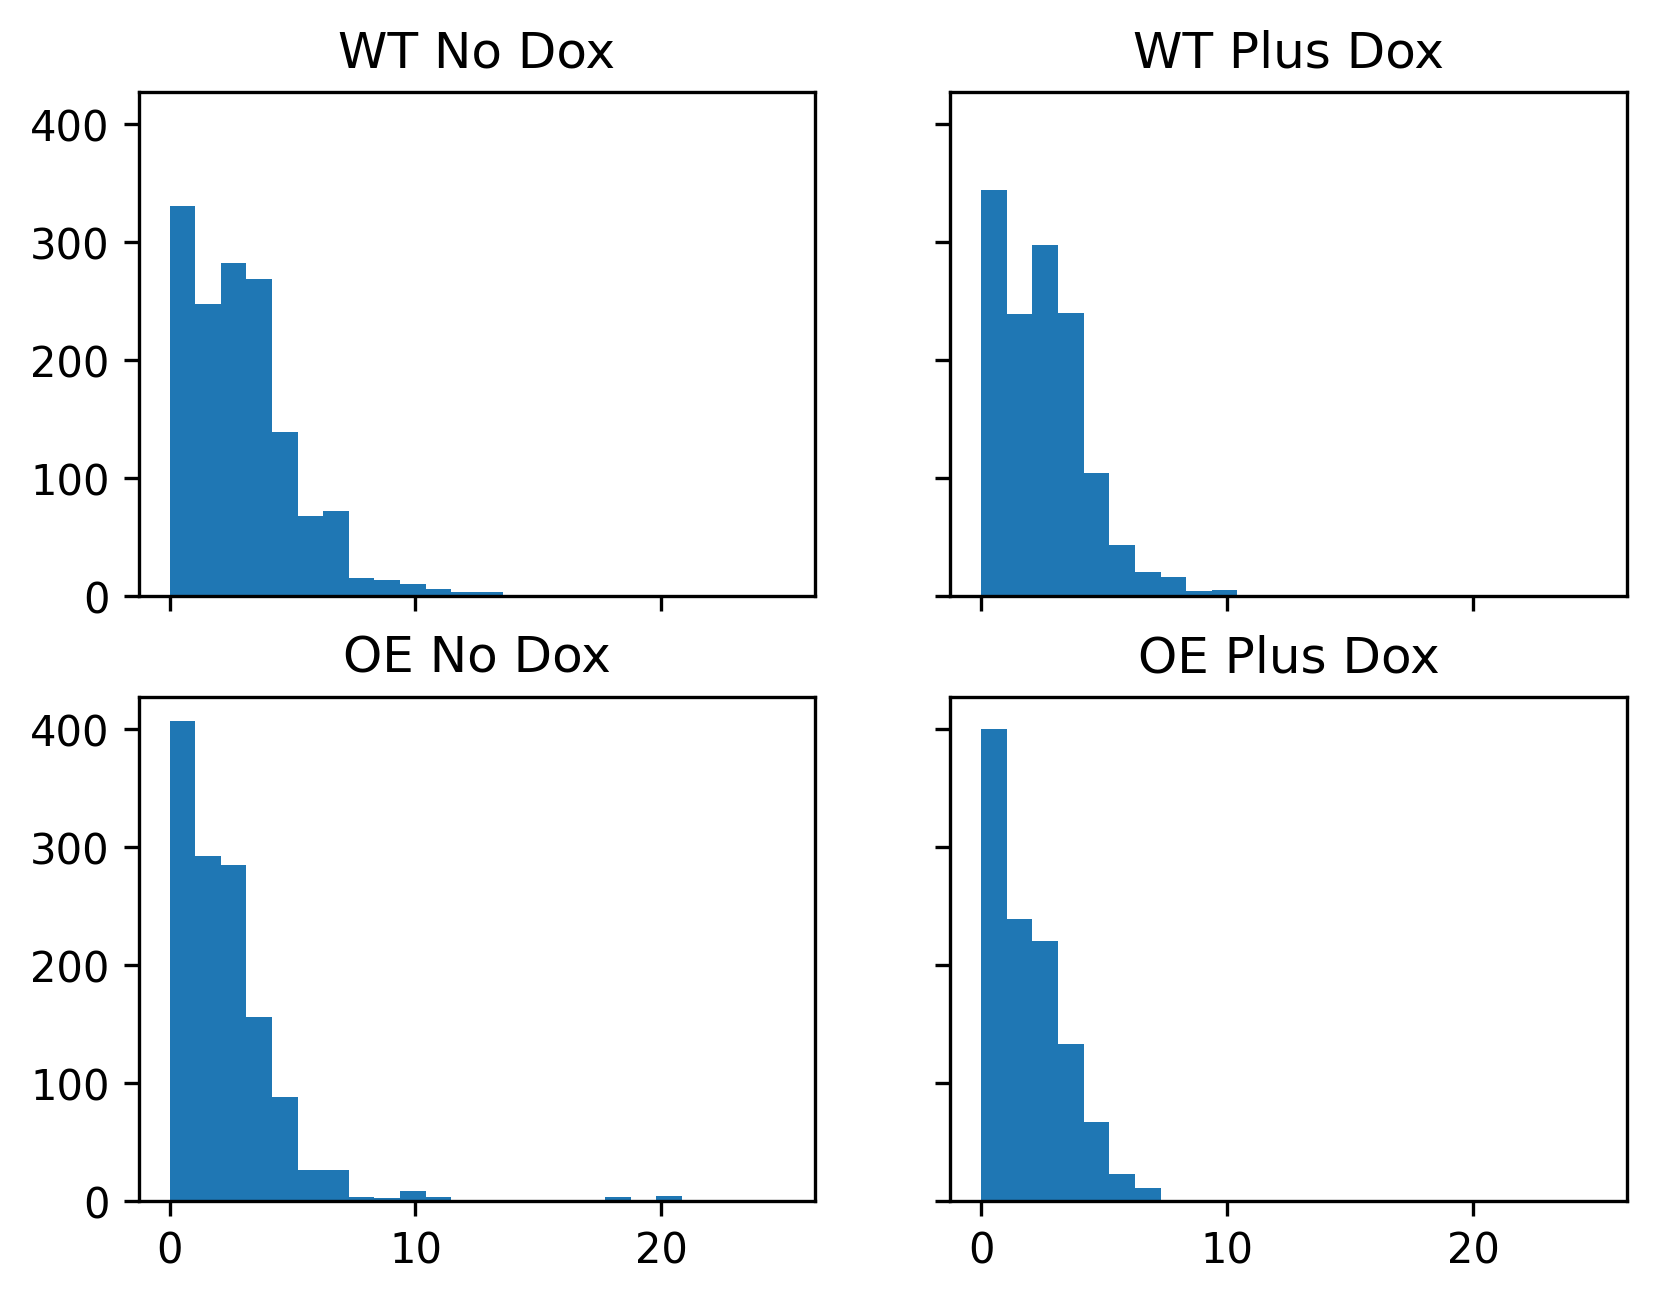

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacements = np.sqrt((dx**2) + (dy**2))

    if track_id.split('_')[1] != '3': continue
    elif well in ['XY01','XY05','XY09']: a.append(displacements)
    elif well in ['XY02','XY06','XY10']: b.append(displacements)
    elif well in ['XY03','XY07','XY11']: c.append(displacements)
    elif well in ['XY04','XY08','XY12']: d.append(displacements)

a = np.concatenate(a)
b = np.concatenate(b)
c = np.concatenate(c)
d = np.concatenate(d)

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,25,25))
axes[0,1].hist(b, bins=np.linspace(0,25,25))
axes[1,0].hist(c, bins=np.linspace(0,25,25))
axes[1,1].hist(d, bins=np.linspace(0,25,25))

plt.show()

### Stats

In [115]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

8.361224176079119e-07
1.0472817132341228e-05
3.572301885476048e-32
0.5743199993576592
7.666901557035513e-16
3.080831039582595e-07


In [116]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

6.906995785439618e-05
5.029182407791e-16
4.8759234863843505e-28
3.5447815597436154e-06
4.538159455506612e-15
0.0005270434025497781


## Ring 4 histogram of all displacements

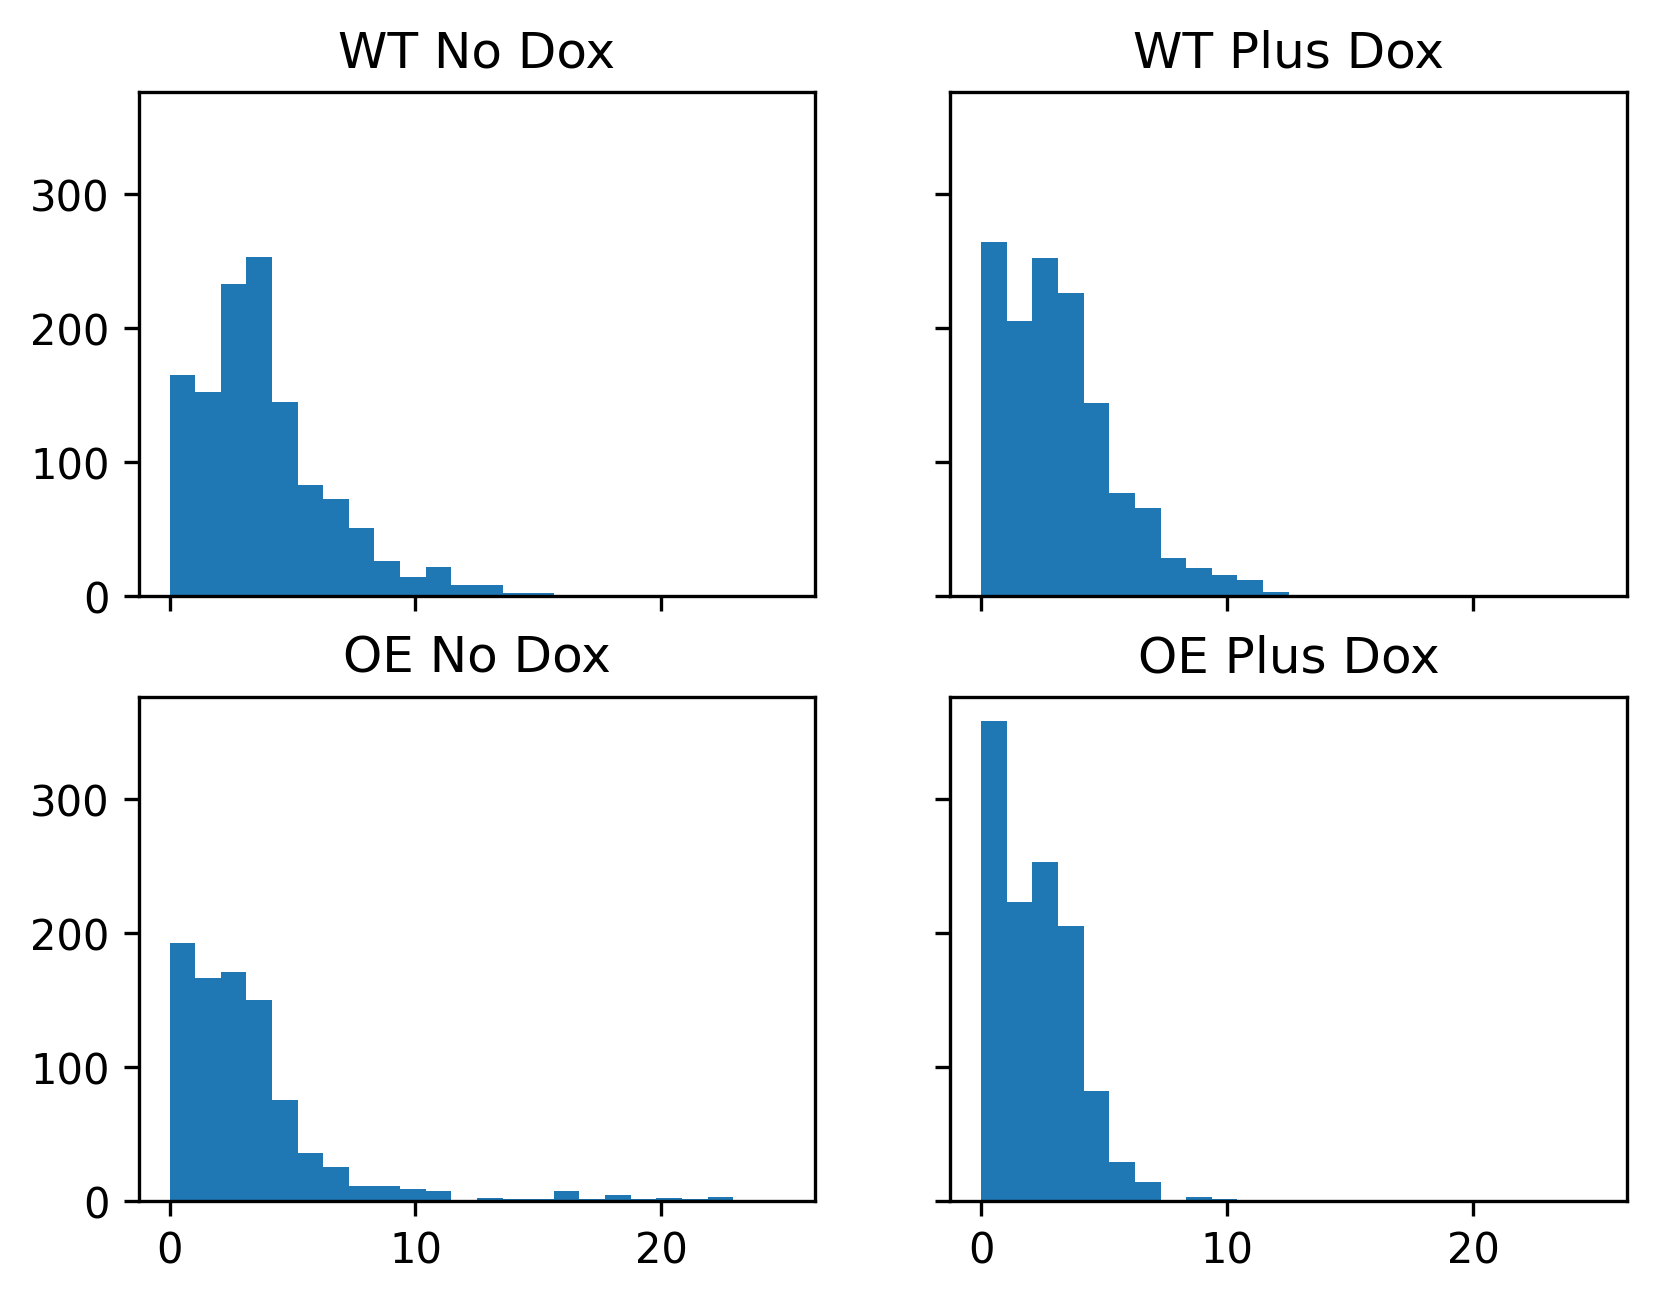

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacements = np.sqrt((dx**2) + (dy**2))

    if track_id.split('_')[1] != '4': continue
    elif well in ['XY01','XY05','XY09']: a.append(displacements)
    elif well in ['XY02','XY06','XY10']: b.append(displacements)
    elif well in ['XY03','XY07','XY11']: c.append(displacements)
    elif well in ['XY04','XY08','XY12']: d.append(displacements)

a = np.concatenate(a)
b = np.concatenate(b)
c = np.concatenate(c)
d = np.concatenate(d)

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,25,25))
axes[0,1].hist(b, bins=np.linspace(0,25,25))
axes[1,0].hist(c, bins=np.linspace(0,25,25))
axes[1,1].hist(d, bins=np.linspace(0,25,25))

plt.show()

### Stats

In [112]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

3.350851902572593e-11
2.4990183345165624e-07
8.049027070025912e-67
0.9793095079230726
3.8306090849651424e-34
1.4198269305769926e-20


In [113]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

4.07928383677657e-10
3.657170929015431e-16
3.0735726375871466e-60
0.00845019328284525
3.2049266921772656e-25
3.692354941616443e-11


# Plot combined ring 3+4 data

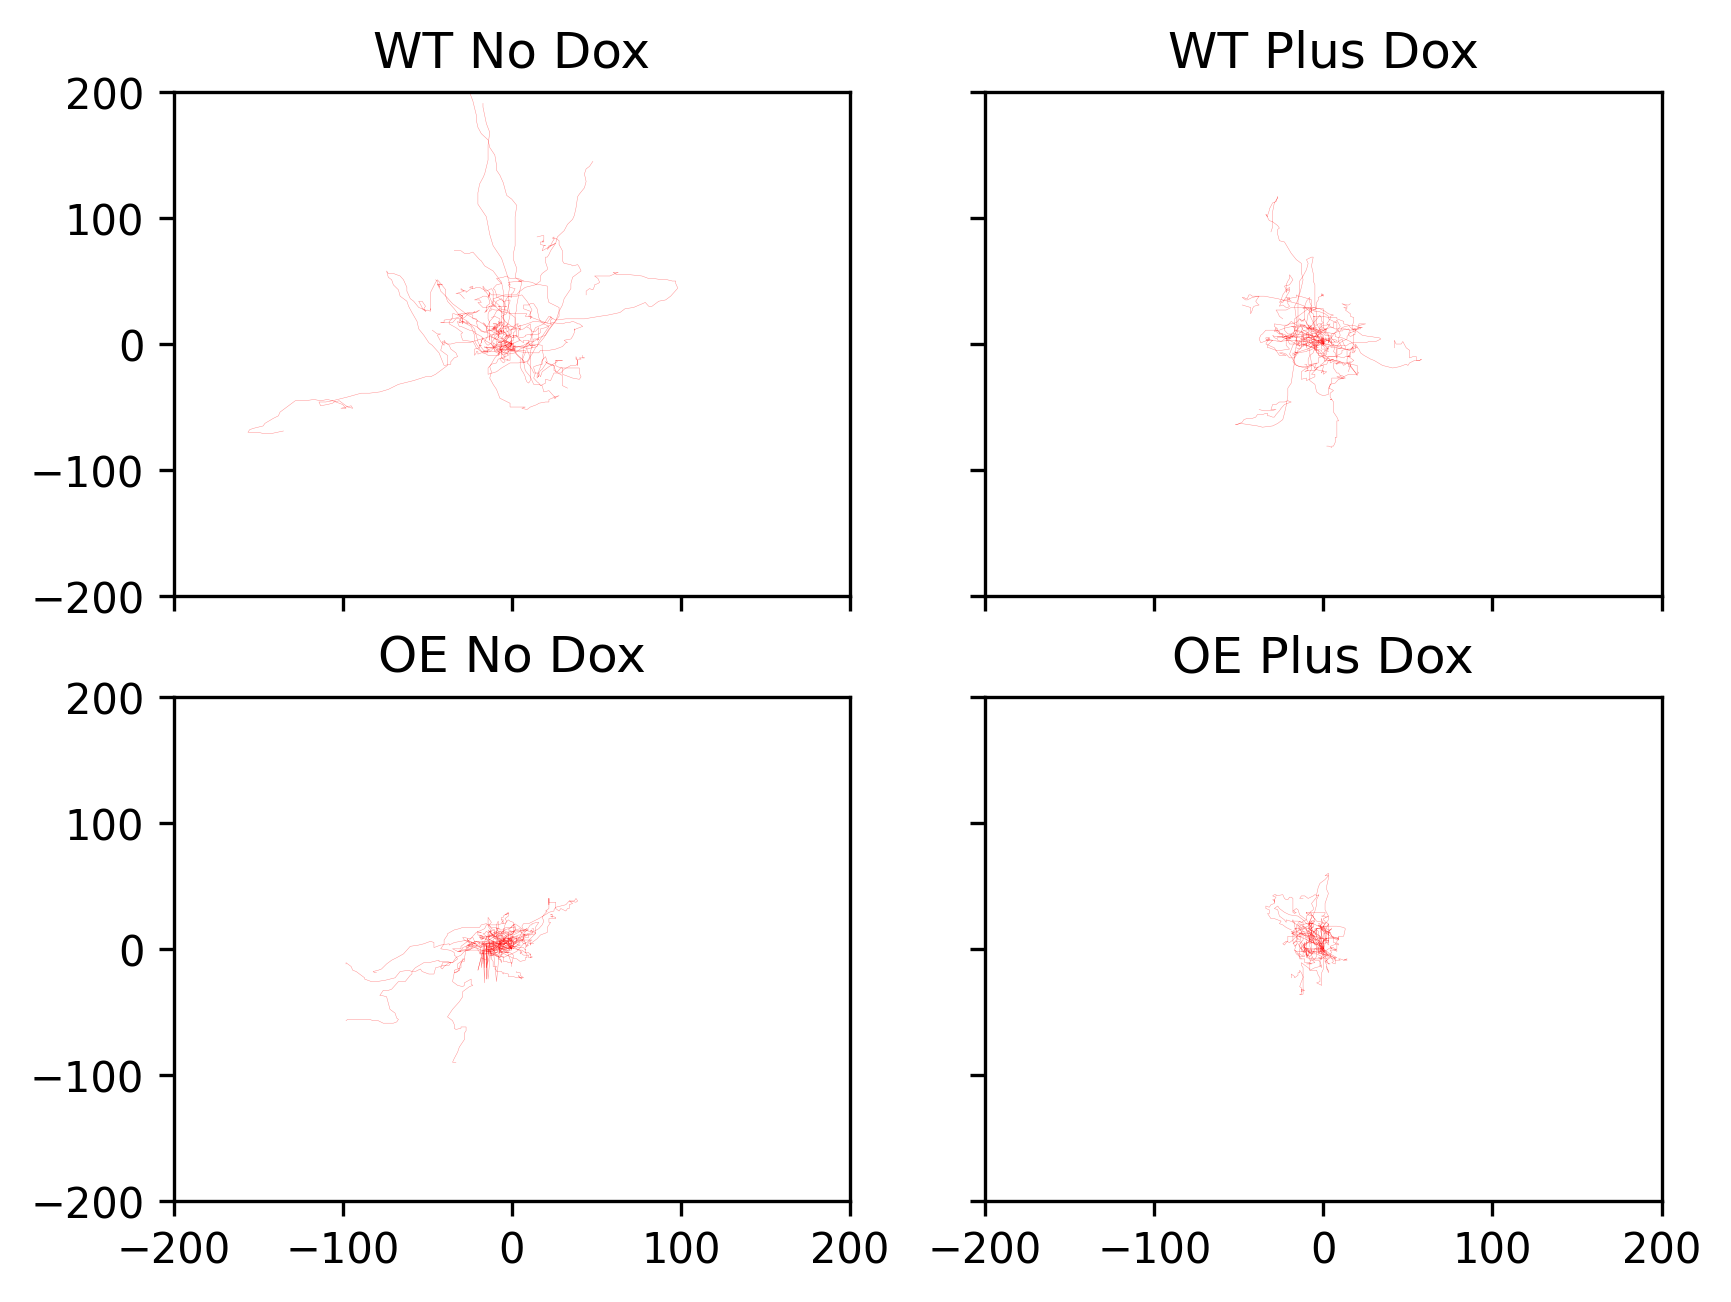

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-200,200)
plt.ylim(-200,200)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if (track_id.split('_')[1] != '3') and (track_id.split('_')[1] != '3'): continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=0.1, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=0.1, alpha=0.5)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

# Total distance traveled histograms

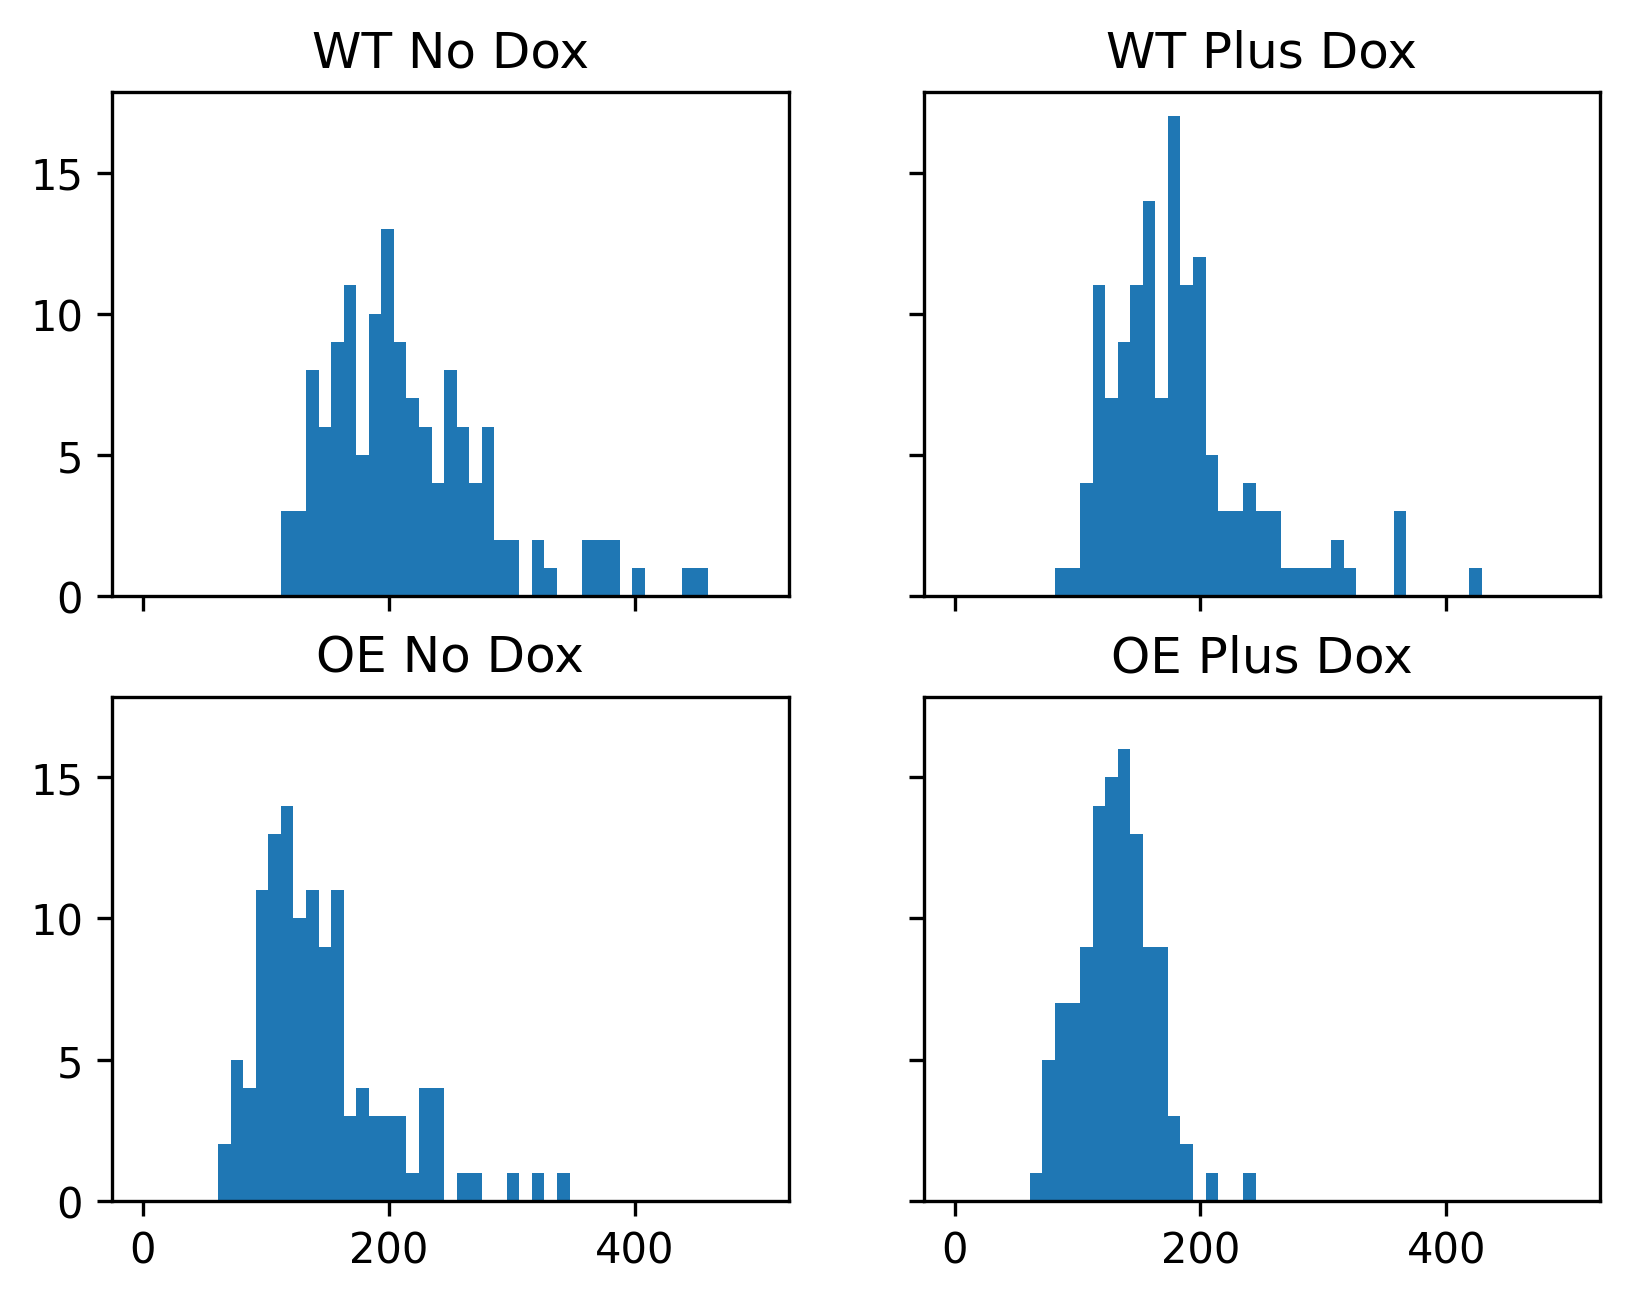

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacement = np.sqrt((dx**2) + (dy**2)).sum()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: a.append(displacement)
    elif well in ['XY02','XY06','XY10']: b.append(displacement)
    elif well in ['XY03','XY07','XY11']: c.append(displacement)
    elif well in ['XY04','XY08','XY12']: d.append(displacement)

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].hist(a, bins=np.linspace(0,500,50))
axes[0,1].hist(b, bins=np.linspace(0,500,50))
axes[1,0].hist(c, bins=np.linspace(0,500,50))
axes[1,1].hist(d, bins=np.linspace(0,500,50))

plt.show()

## Stats

In [120]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ttest(a,b).pvalue)
print(ttest(a,c).pvalue)
print(ttest(a,d).pvalue)
print(ttest(b,c).pvalue) # Not sig
print(ttest(b,d).pvalue)
print(ttest(c,d).pvalue)

0.0014870836700877938
4.183973389787166e-05
4.137225081605849e-15
0.3139606656095935
1.6718653906111652e-07
1.4835837061370402e-05


In [23]:
from scipy.stats import ttest_ind as ttest
from scipy.stats import ranksums

print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

4.22750867253237e-07
4.293420981548627e-20
2.645870630060144e-29
3.0772959854292574e-09
1.9329514541895477e-16
0.2332030613210092


## Bar graph

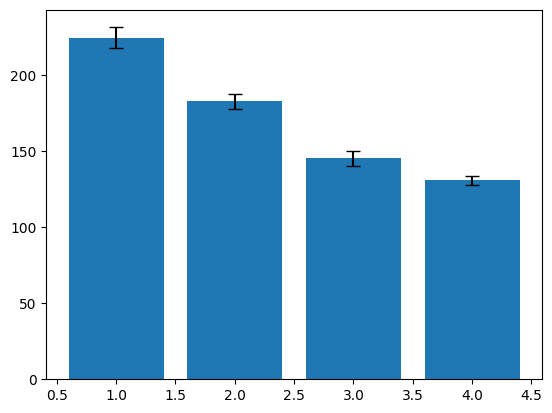

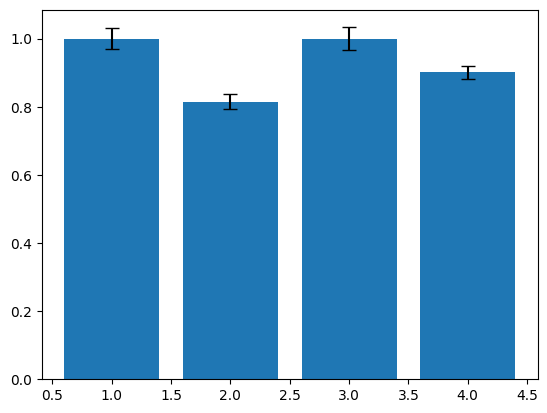

9.620942072958046e-05


In [24]:
total_displacements = [np.array(data) for data in [a,b,c,d]]

plt.bar([1,2,3,4], height=[data.mean() for data in total_displacements], yerr=[np.std(data)/np.sqrt(len(data)) for data in total_displacements], capsize=5)
# plt.ylim(0,4)
plt.show()

total_displacements[1] = total_displacements[1] / total_displacements[0].mean()
total_displacements[0] = total_displacements[0] / total_displacements[0].mean()
total_displacements[3] = total_displacements[3] / total_displacements[2].mean()
total_displacements[2] = total_displacements[2] / total_displacements[2].mean()

plt.bar([1,2,3,4], height=[data.mean() for data in total_displacements], yerr=[np.std(data)/np.sqrt(len(data)) for data in total_displacements], capsize=5)
# plt.ylim(0,4)
plt.show()
print(ranksums(total_displacements[1], total_displacements[3]).pvalue)


# Turn angle Autocorrelation

## Individual tracks

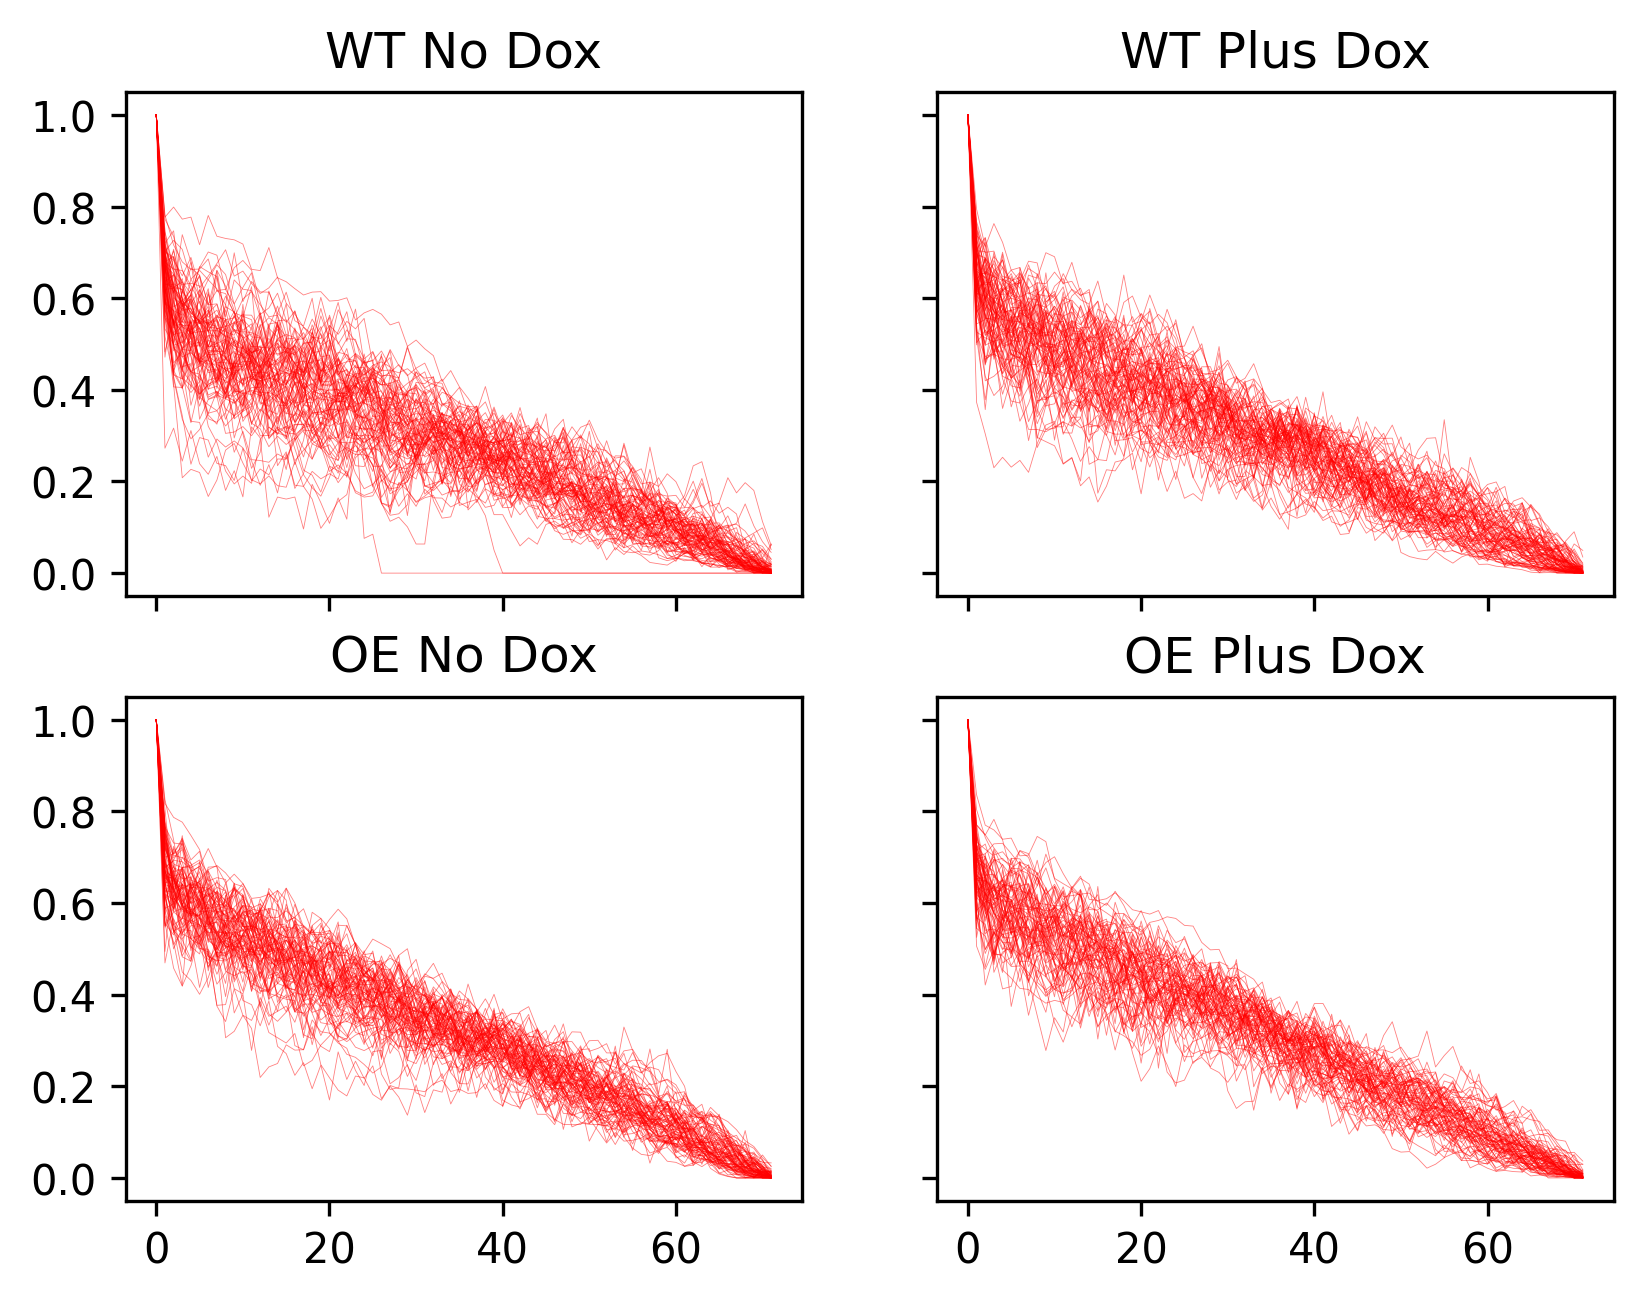

In [156]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacement_magnitudes = np.sqrt((dx**2) + (dy**2))
    displacement_angles = np.arctan2(dy,dx)
    turn_angles = np.absolute(displacement_angles[1:] - displacement_angles[:-1])
    turn_angles = np.where(turn_angles>math.pi, (2*math.pi)-turn_angles, turn_angles)
    autocorr = np.correlate(turn_angles, turn_angles, mode='full')[-72:]
    autocorr_norm = autocorr / autocorr.max()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot([i for i in range(72)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot([i for i in range(72)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot([i for i in range(72)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot([i for i in range(72)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()


## Expt means

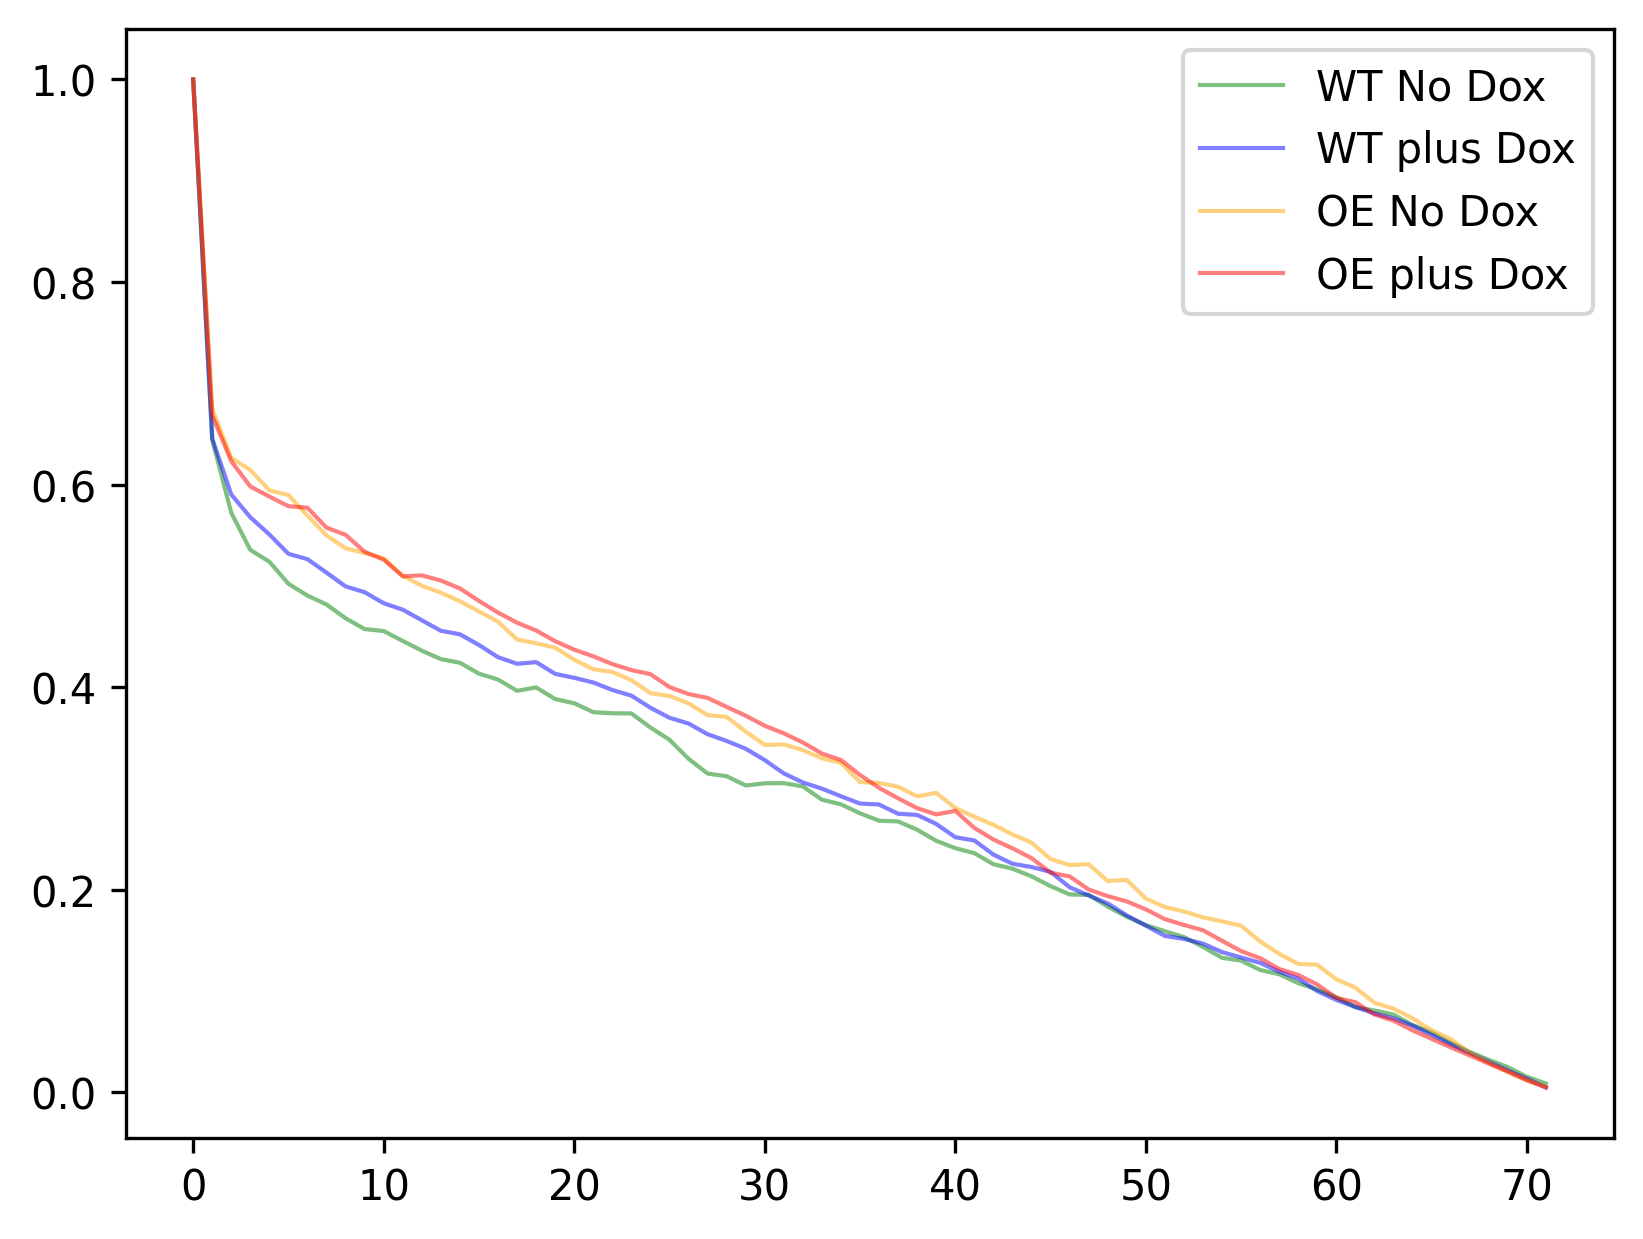

In [173]:
a,b,c,d = [],[],[],[]
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacement_magnitudes = np.sqrt((dx**2) + (dy**2))
    displacement_angles = np.arctan2(dy,dx)
    turn_angles = np.absolute(displacement_angles[1:] - displacement_angles[:-1])
    turn_angles = np.where(turn_angles>math.pi, (2*math.pi)-turn_angles, turn_angles)
    autocorr = np.correlate(turn_angles, turn_angles, mode='full')[-72:]
    autocorr_norm = autocorr / autocorr.max()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: a.append(autocorr_norm)
    elif well in ['XY02','XY06','XY10']: b.append(autocorr_norm)
    elif well in ['XY03','XY07','XY11']: c.append(autocorr_norm)
    elif well in ['XY04','XY08','XY12']: d.append(autocorr_norm)

a = np.stack(a)
b = np.stack(b)
c = np.stack(c)
d = np.stack(d)

a = a.mean(axis=0)
b = b.mean(axis=0)
c = c.mean(axis=0)
d = d.mean(axis=0)

x = [i for i in range(72)]
plt.figure(dpi=300)
plt.plot(x, a, linewidth=1, alpha=0.5, color='green')
plt.plot(x, b, linewidth=1, alpha=0.5, color='blue')
plt.plot(x, c, linewidth=1, alpha=0.5, color='orange')
plt.plot(x, d, linewidth=1, alpha=0.5, color='red')
plt.legend(['WT No Dox', 'WT plus Dox', 'OE No Dox', 'OE plus Dox'])
plt.show()

## Ring 4 only

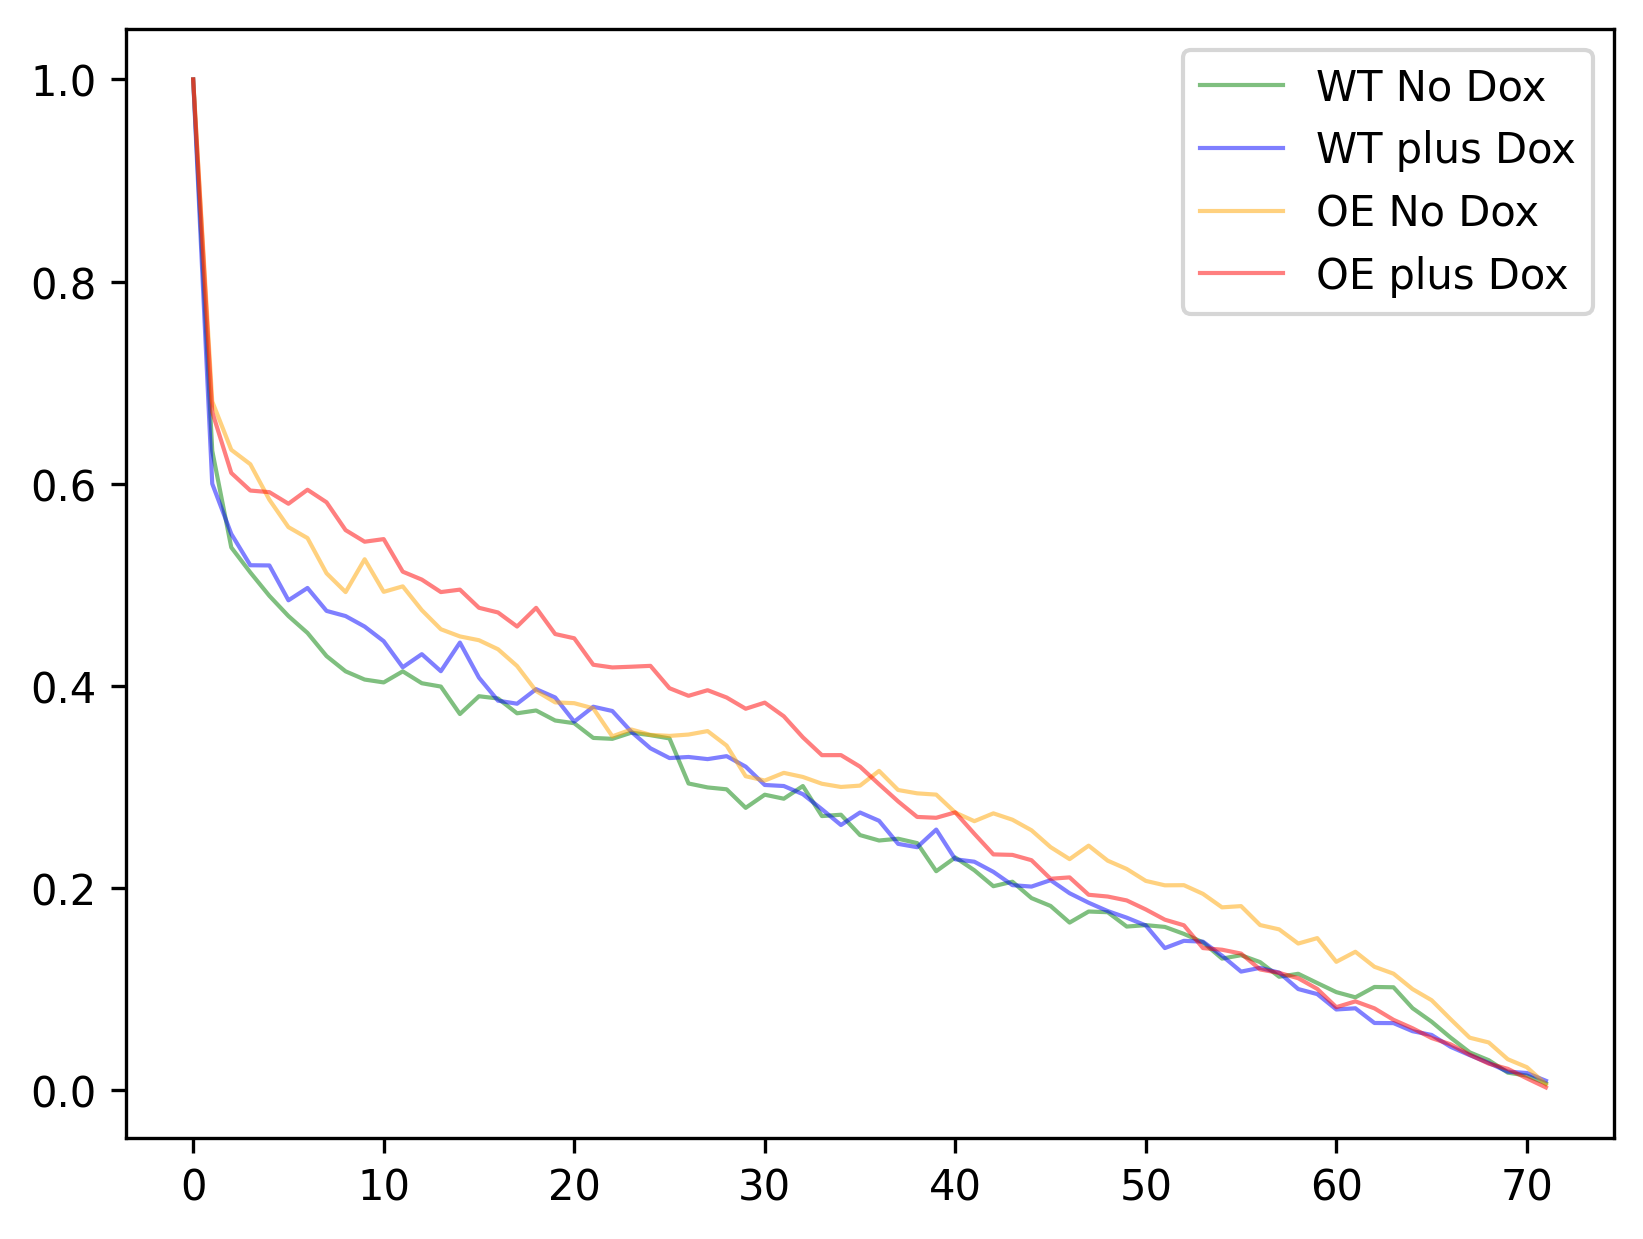

In [163]:
a,b,c,d = [],[],[],[]
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacement_magnitudes = np.sqrt((dx**2) + (dy**2))
    displacement_angles = np.arctan2(dy,dx)
    turn_angles = np.absolute(displacement_angles[1:] - displacement_angles[:-1])
    turn_angles = np.where(turn_angles>math.pi, (2*math.pi)-turn_angles, turn_angles)
    autocorr = np.correlate(turn_angles, turn_angles, mode='full')[-72:]
    autocorr_norm = autocorr / autocorr.max()

    if track_id.split('_')[1] != '4': continue
    elif well in ['XY01','XY05','XY09']: a.append(autocorr_norm)
    elif well in ['XY02','XY06','XY10']: b.append(autocorr_norm)
    elif well in ['XY03','XY07','XY11']: c.append(autocorr_norm)
    elif well in ['XY04','XY08','XY12']: d.append(autocorr_norm)

a = np.stack(a)
b = np.stack(b)
c = np.stack(c)
d = np.stack(d)

a = a.mean(axis=0)
b = b.mean(axis=0)
c = c.mean(axis=0)
d = d.mean(axis=0)

x = [i for i in range(72)]
plt.figure(dpi=300)
plt.plot(x, a, linewidth=1, alpha=0.5, color='green')
plt.plot(x, b, linewidth=1, alpha=0.5, color='blue')
plt.plot(x, c, linewidth=1, alpha=0.5, color='orange')
plt.plot(x, d, linewidth=1, alpha=0.5, color='red')
plt.legend(['WT No Dox', 'WT plus Dox', 'OE No Dox', 'OE plus Dox'])
plt.show()

# Velocity autocorrelation

## Individual tracks

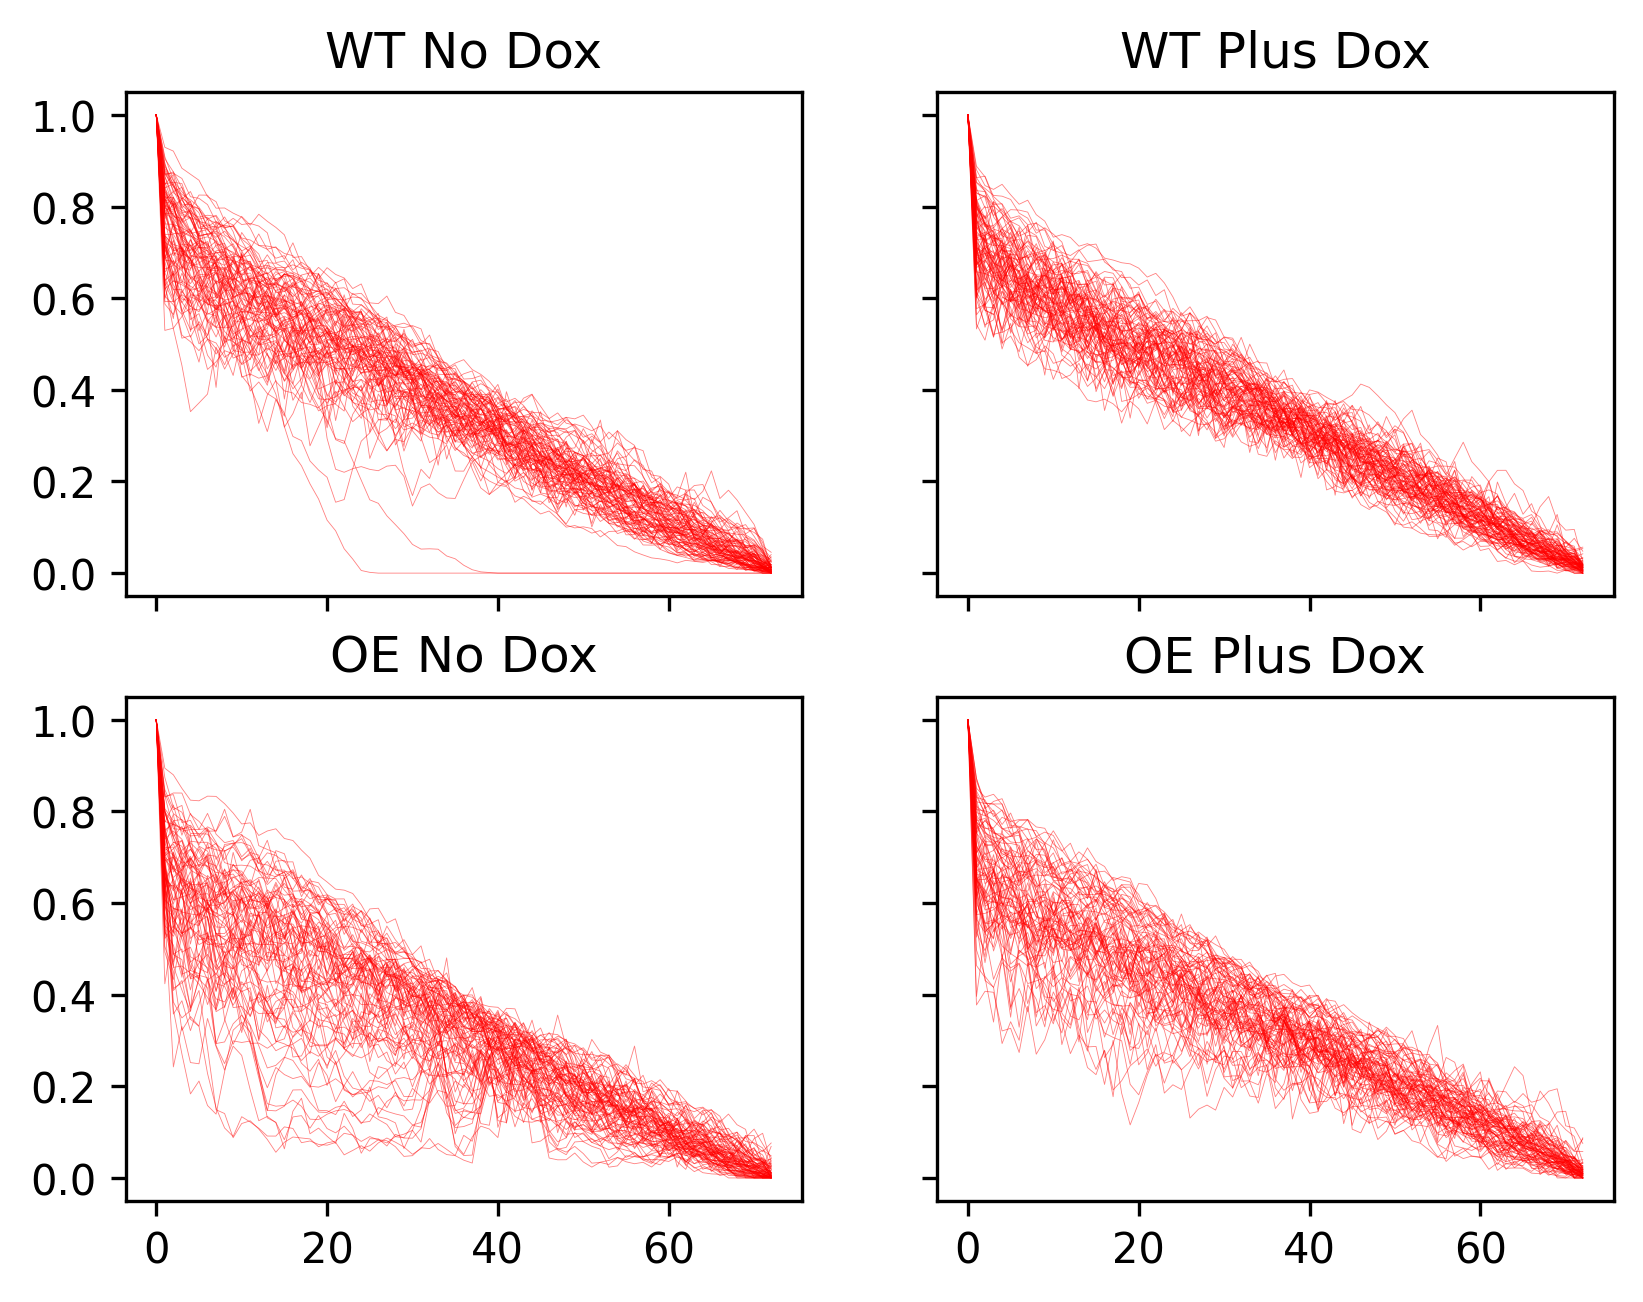

In [166]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacement_magnitudes = np.sqrt((dx**2) + (dy**2))
    # displacement_angles = np.arctan2(dy,dx)
    # turn_angles = np.absolute(displacement_angles[1:] - displacement_angles[:-1])
    # turn_angles = np.where(turn_angles>math.pi, (2*math.pi)-turn_angles, turn_angles)
    autocorr = np.correlate(displacement_magnitudes, displacement_magnitudes, mode='full')[-73:]
    autocorr_norm = autocorr / autocorr.max()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot([i for i in range(73)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot([i for i in range(73)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot([i for i in range(73)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot([i for i in range(73)], autocorr_norm, 'r-', linewidth=0.2, alpha=0.5)

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()


## Expt means

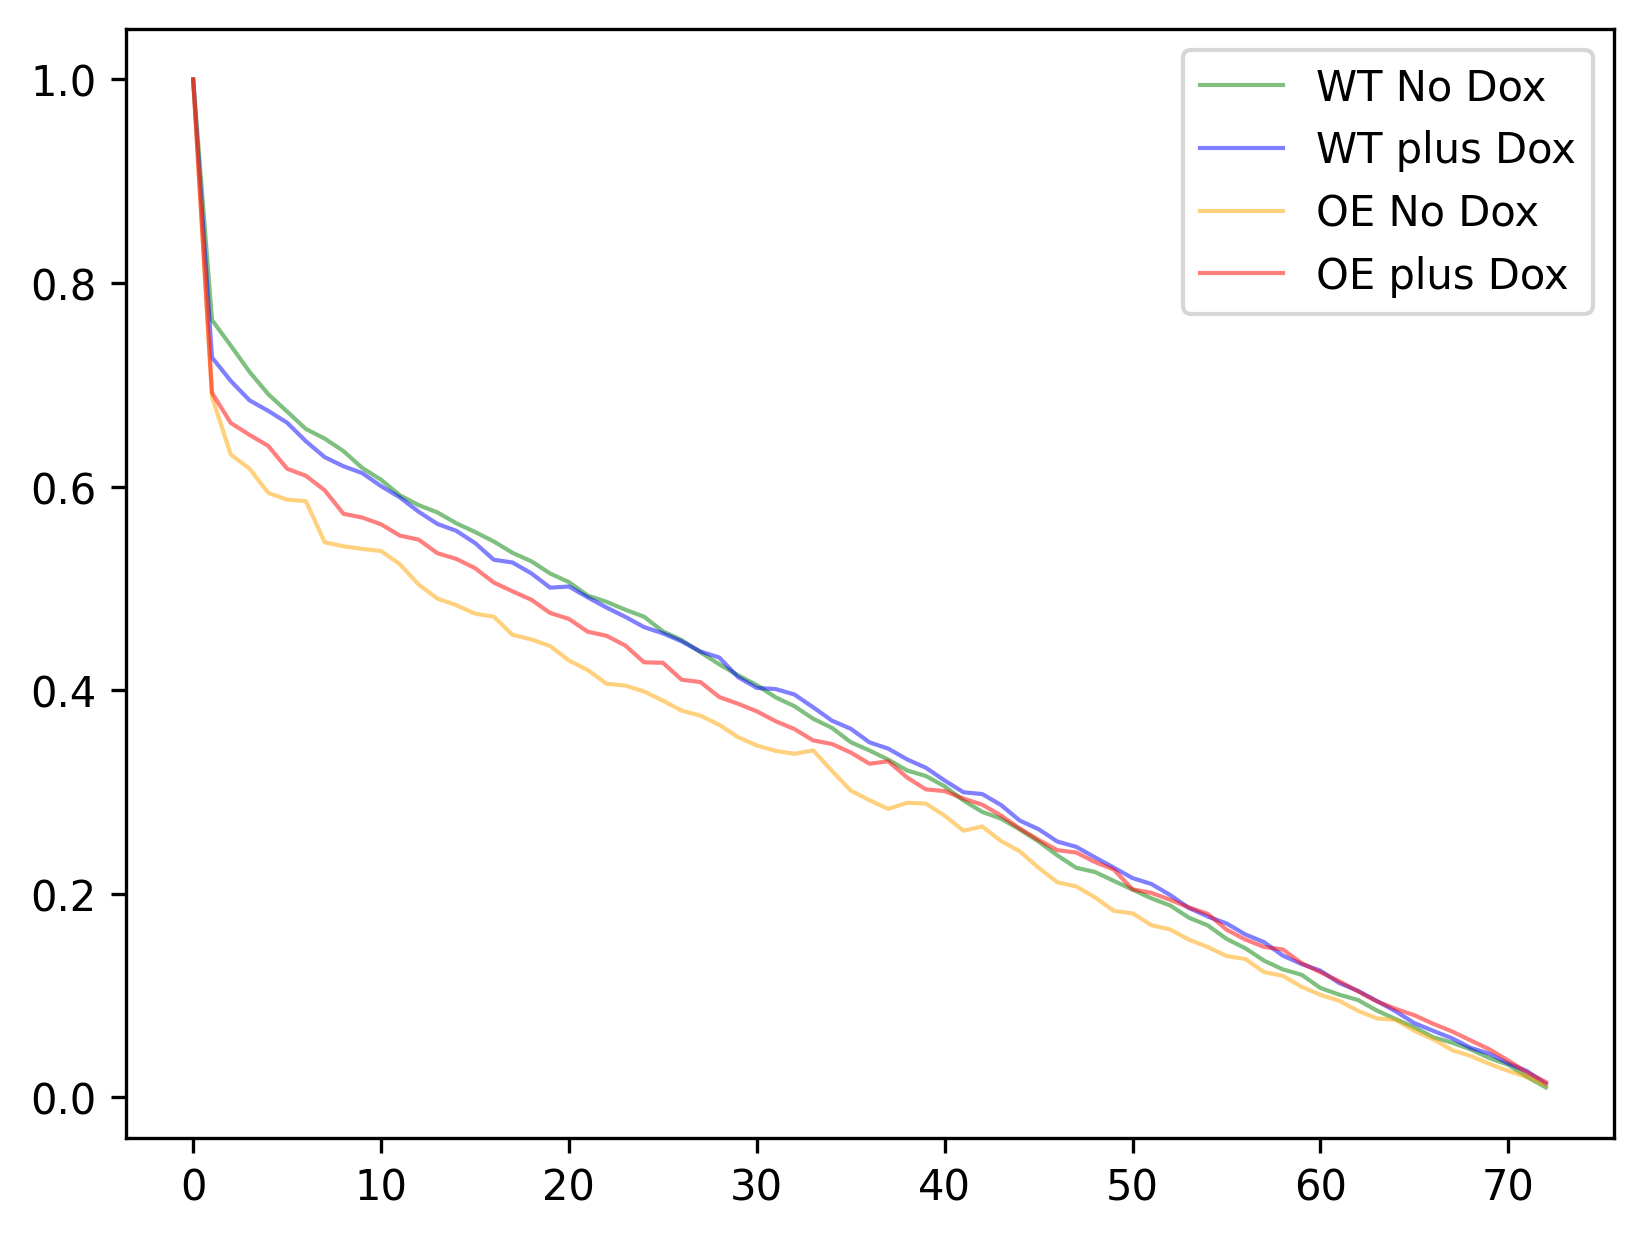

In [167]:
a,b,c,d = [],[],[],[]
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacement_magnitudes = np.sqrt((dx**2) + (dy**2))
    # displacement_angles = np.arctan2(dy,dx)
    # turn_angles = np.absolute(displacement_angles[1:] - displacement_angles[:-1])
    # turn_angles = np.where(turn_angles>math.pi, (2*math.pi)-turn_angles, turn_angles)
    autocorr = np.correlate(displacement_magnitudes, displacement_magnitudes, mode='full')[-73:]
    autocorr_norm = autocorr / autocorr.max()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: a.append(autocorr_norm)
    elif well in ['XY02','XY06','XY10']: b.append(autocorr_norm)
    elif well in ['XY03','XY07','XY11']: c.append(autocorr_norm)
    elif well in ['XY04','XY08','XY12']: d.append(autocorr_norm)

a = np.stack(a)
b = np.stack(b)
c = np.stack(c)
d = np.stack(d)

a = a.mean(axis=0)
b = b.mean(axis=0)
c = c.mean(axis=0)
d = d.mean(axis=0)

x = [i for i in range(73)]
plt.figure(dpi=300)
plt.plot(x, a, linewidth=1, alpha=0.5, color='green')
plt.plot(x, b, linewidth=1, alpha=0.5, color='blue')
plt.plot(x, c, linewidth=1, alpha=0.5, color='orange')
plt.plot(x, d, linewidth=1, alpha=0.5, color='red')
plt.legend(['WT No Dox', 'WT plus Dox', 'OE No Dox', 'OE plus Dox'])
plt.show()

# Draw single wells

## Define cell centers

In [13]:
well_centers = {
    'XY01': (1150,1350),
    'XY02': (1000,900),
    'XY03': (1075,725),
    'XY04': (1500,800),
    'XY05': (1050,1100),
    'XY06': (1175,1225),
    'XY07': (1950,875),
    'XY08': (1000,1150),
    'XY09': (1375,1425),
    'XY10': (850,1050),
    'XY11': (1525,325),
    'XY12': (1250,1375)}

## Plate row A

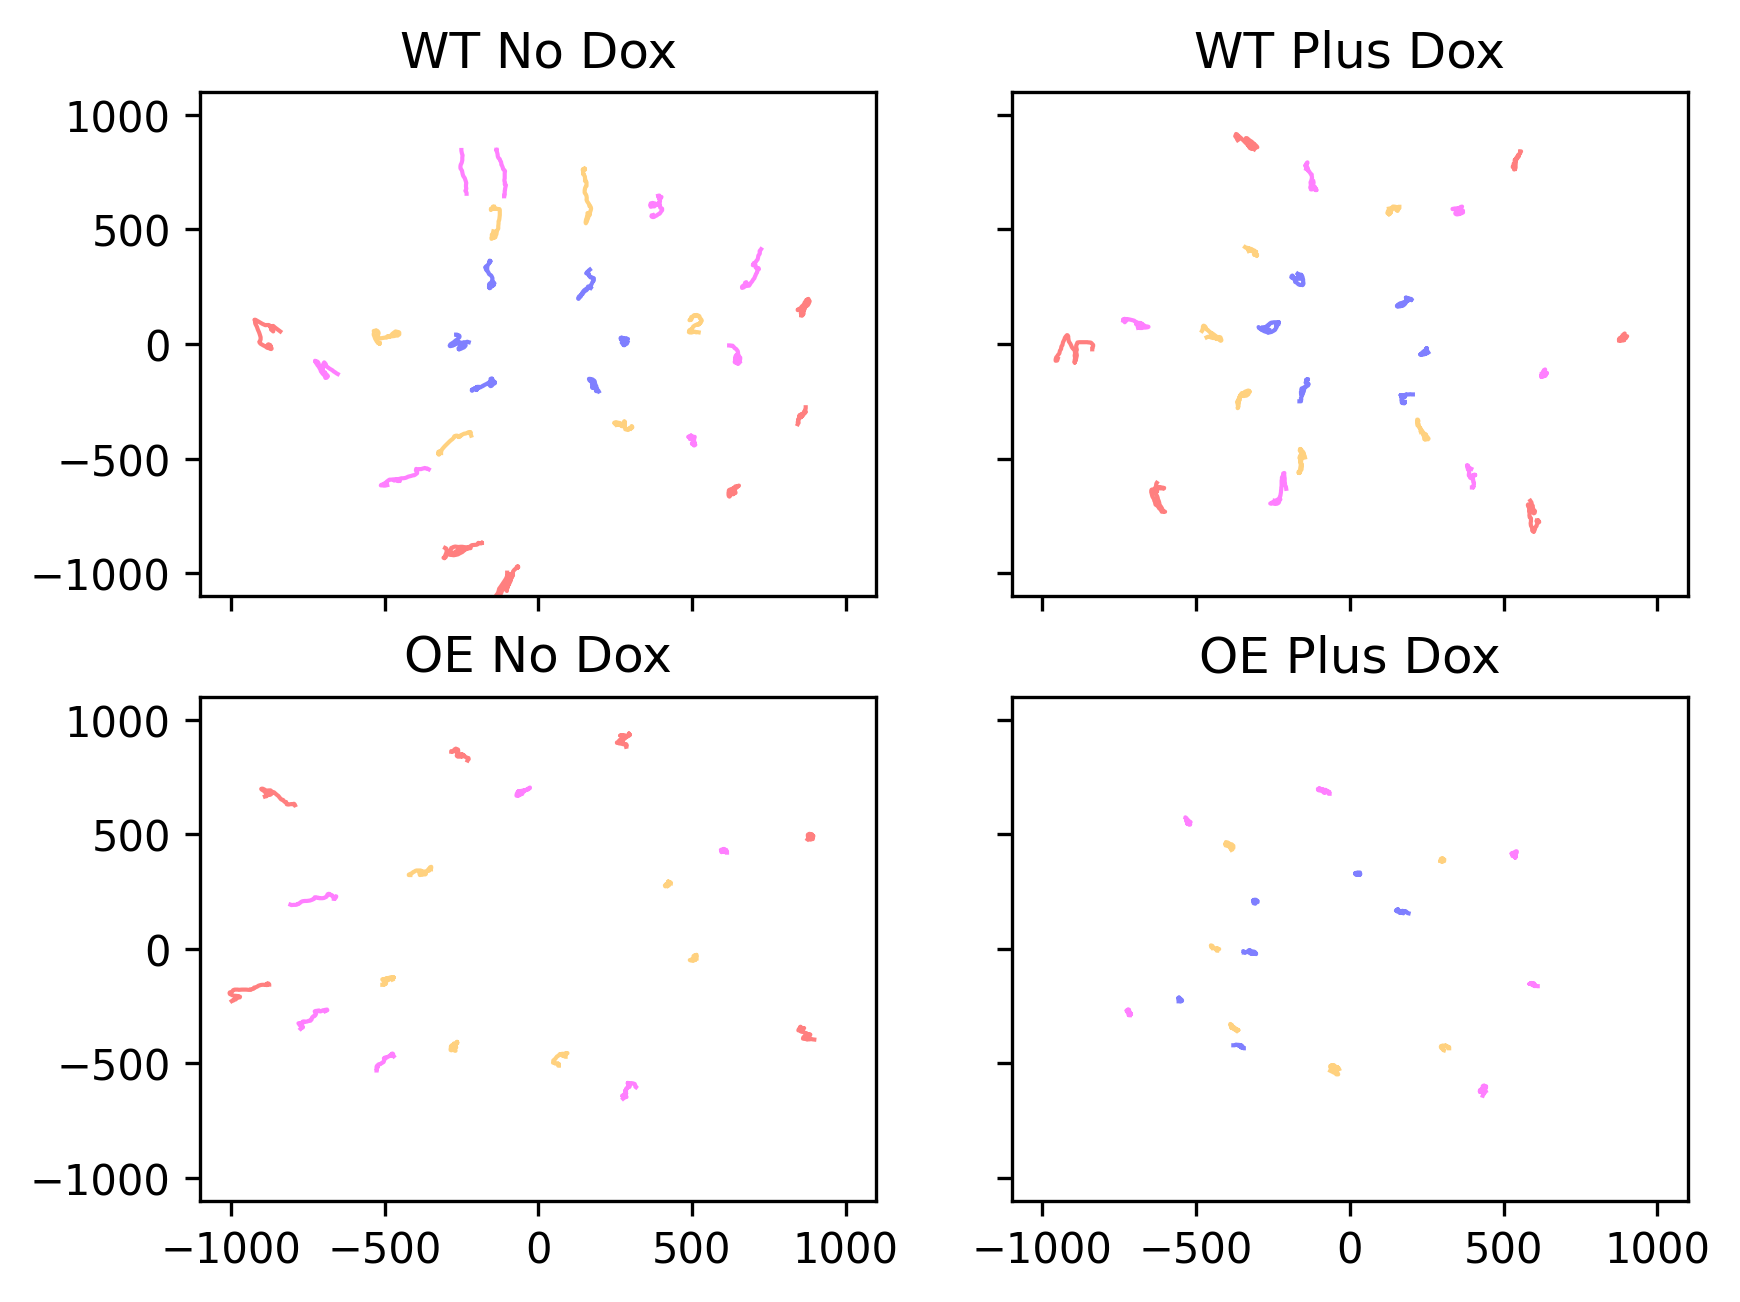

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-1100,1100)
plt.ylim(-1100,1100)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid

    ring_colors = ['green','blue','orange','magenta','red']
    if track_id.split('_')[1] == 'RED': continue
    elif well =='XY01': axes[0,0].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY02': axes[0,1].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY03': axes[1,0].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY04': axes[1,1].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Plate row B

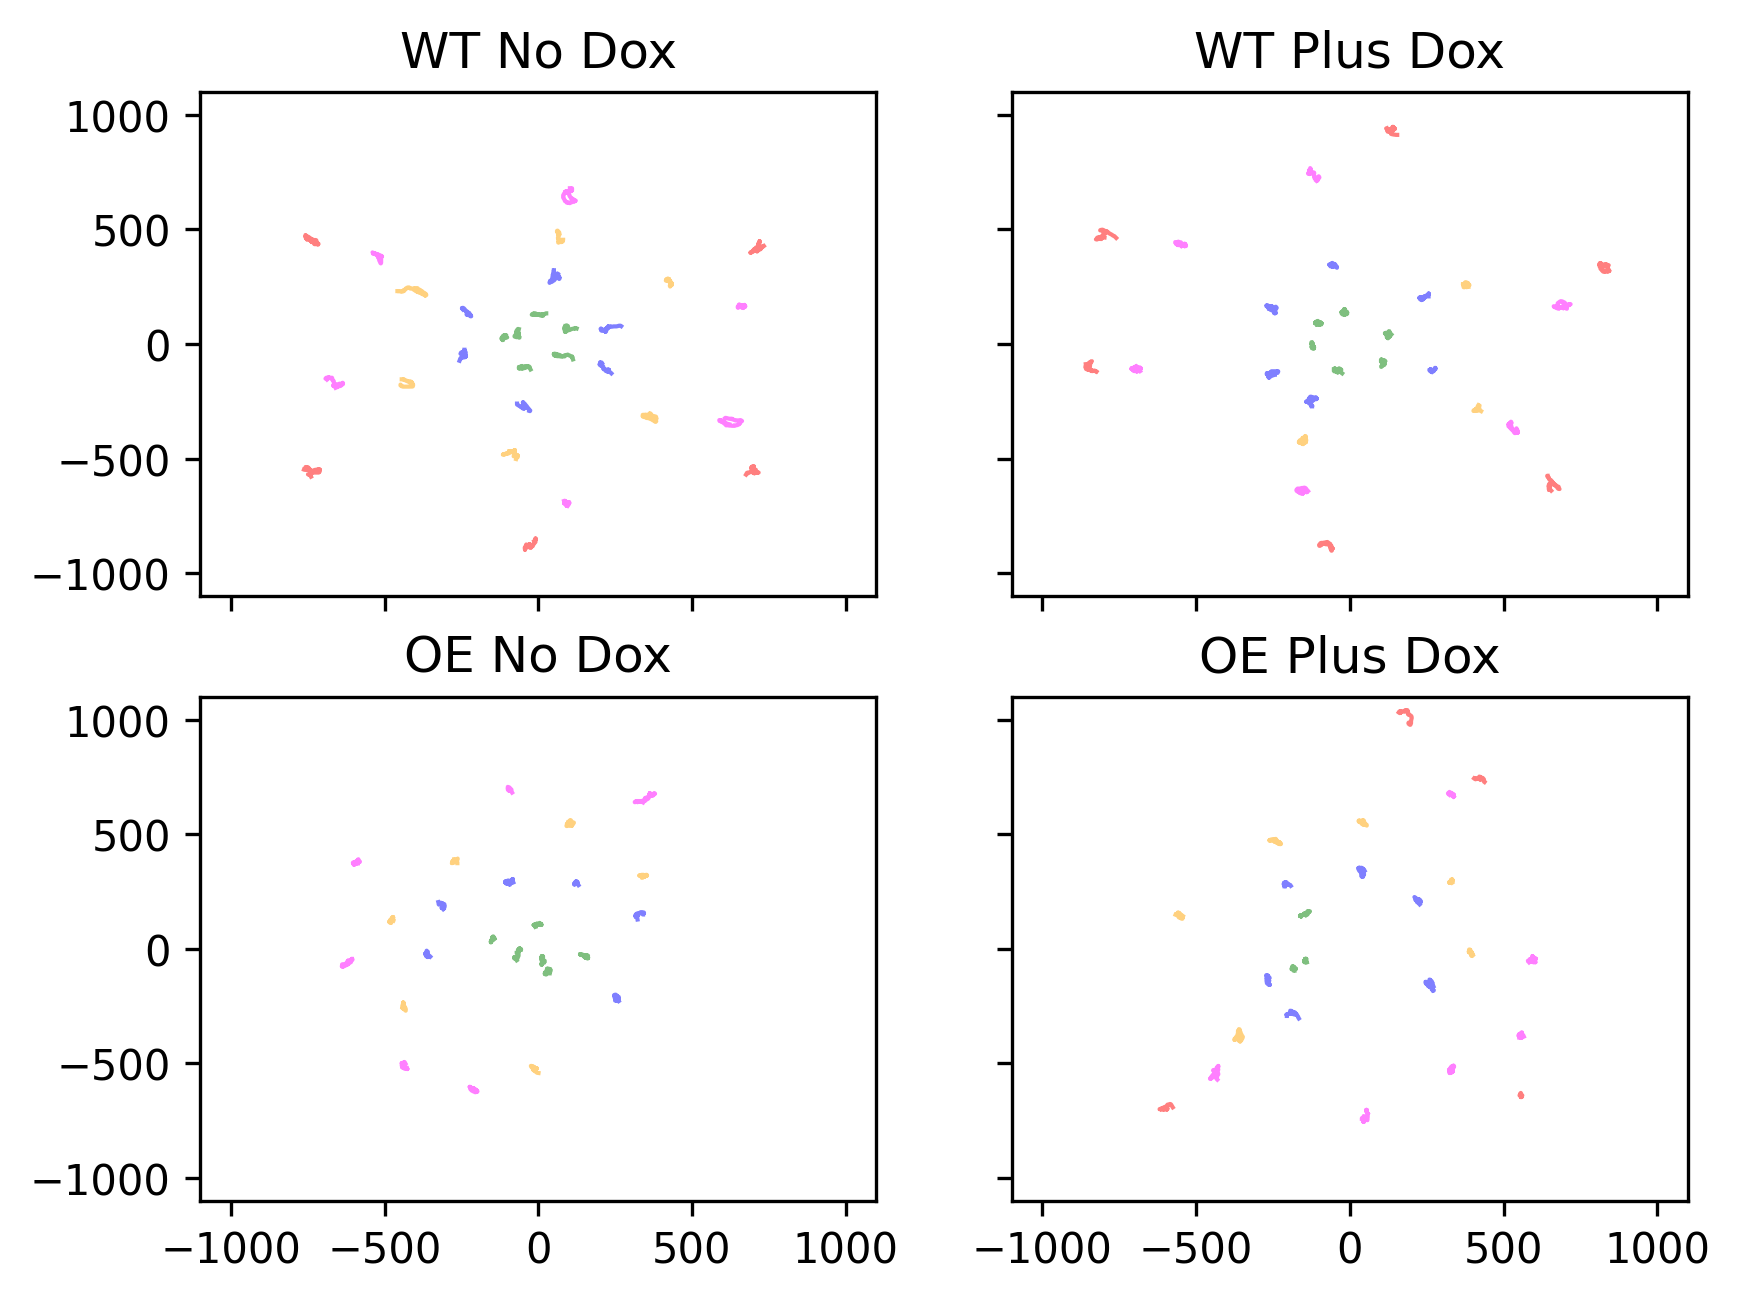

In [219]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-1100,1100)
plt.ylim(-1100,1100)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid

    ring_colors = ['green','blue','orange','magenta','red']
    if track_id.split('_')[1] == 'RED': continue
    elif well =='XY05': axes[0,0].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY06': axes[0,1].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY07': axes[1,0].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY08': axes[1,1].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Plate row C

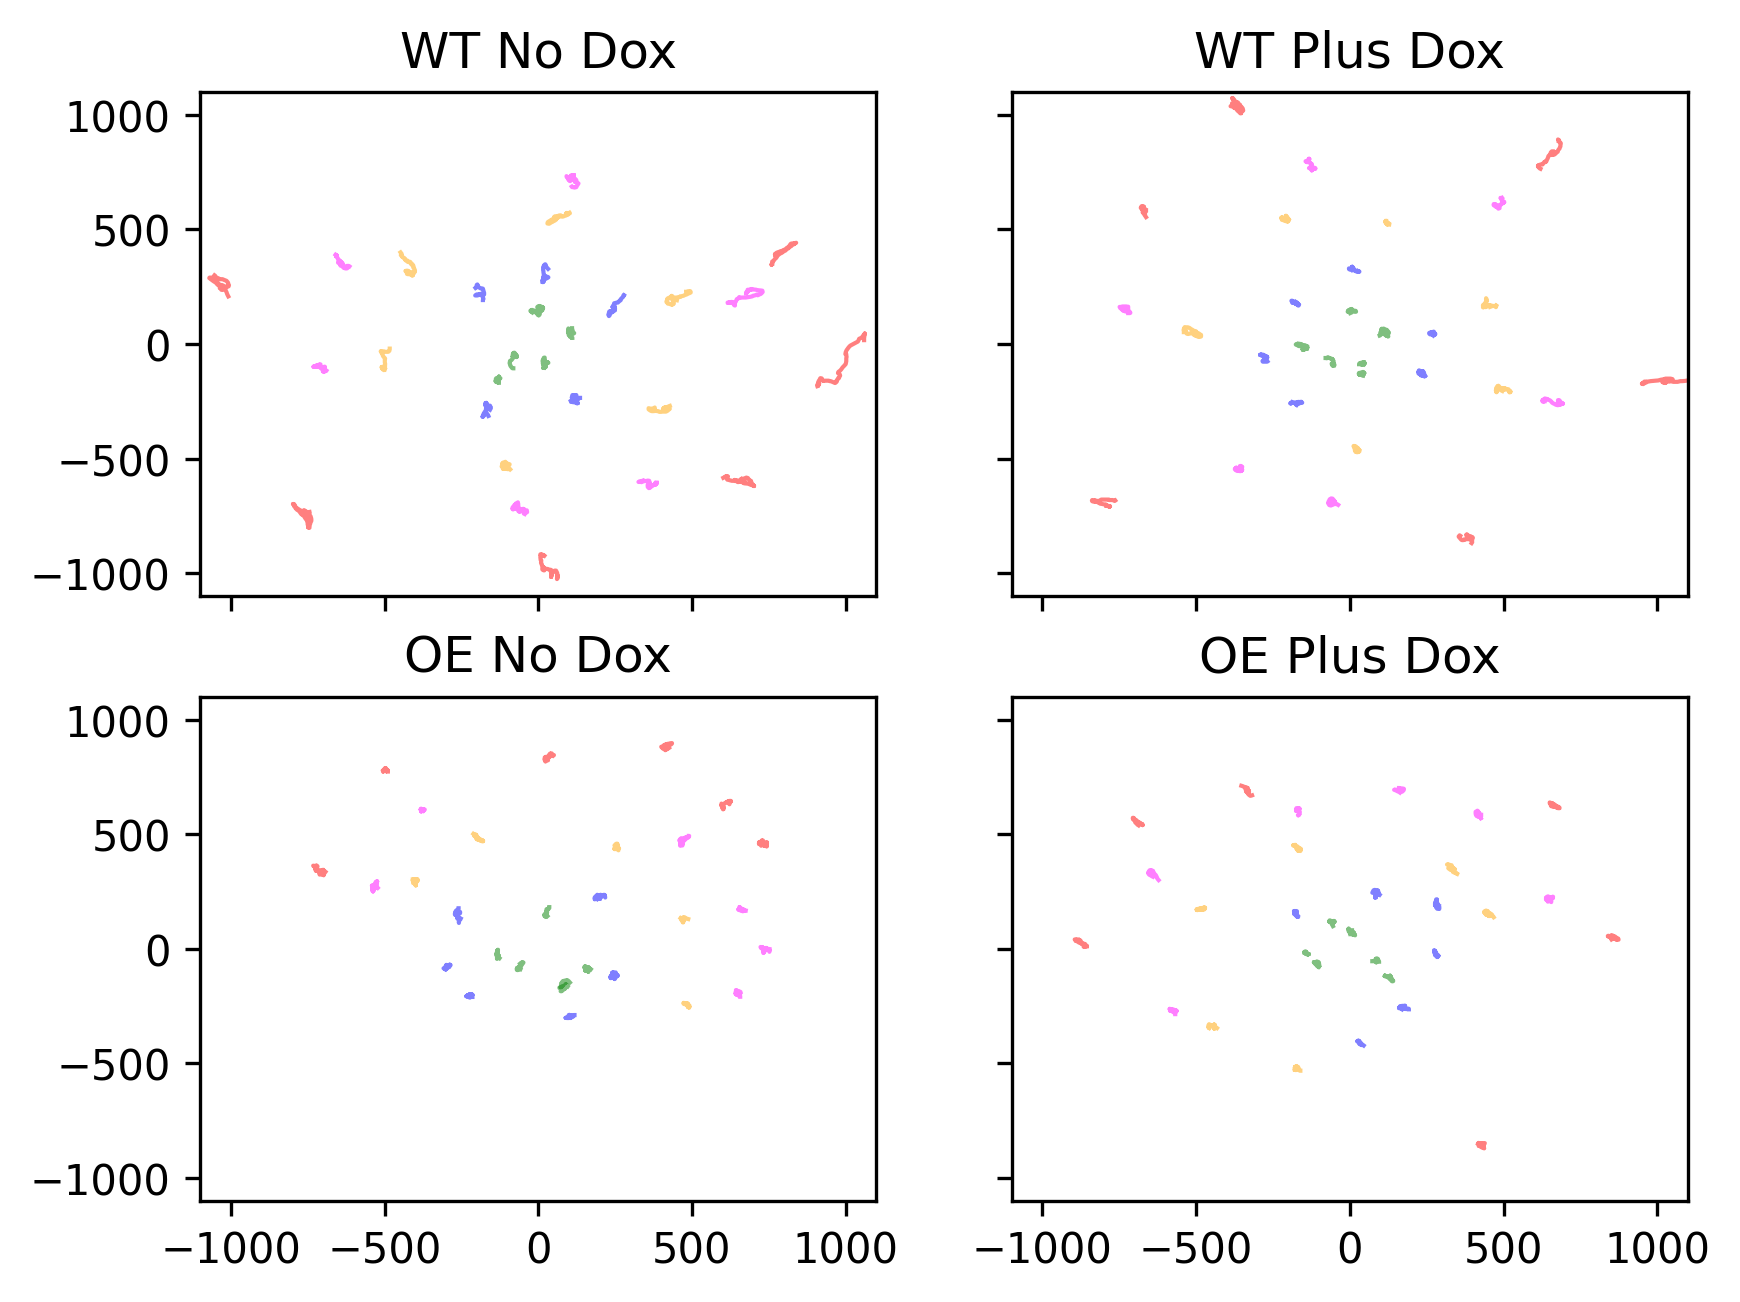

In [231]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-1100,1100)
plt.ylim(-1100,1100)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid

    ring_colors = ['green','blue','orange','magenta','red']
    if track_id.split('_')[1] == 'RED': continue
    elif well =='XY09': axes[0,0].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY10': axes[0,1].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY11': axes[1,0].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY12': axes[1,1].plot(x,y, linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Row A initial to final

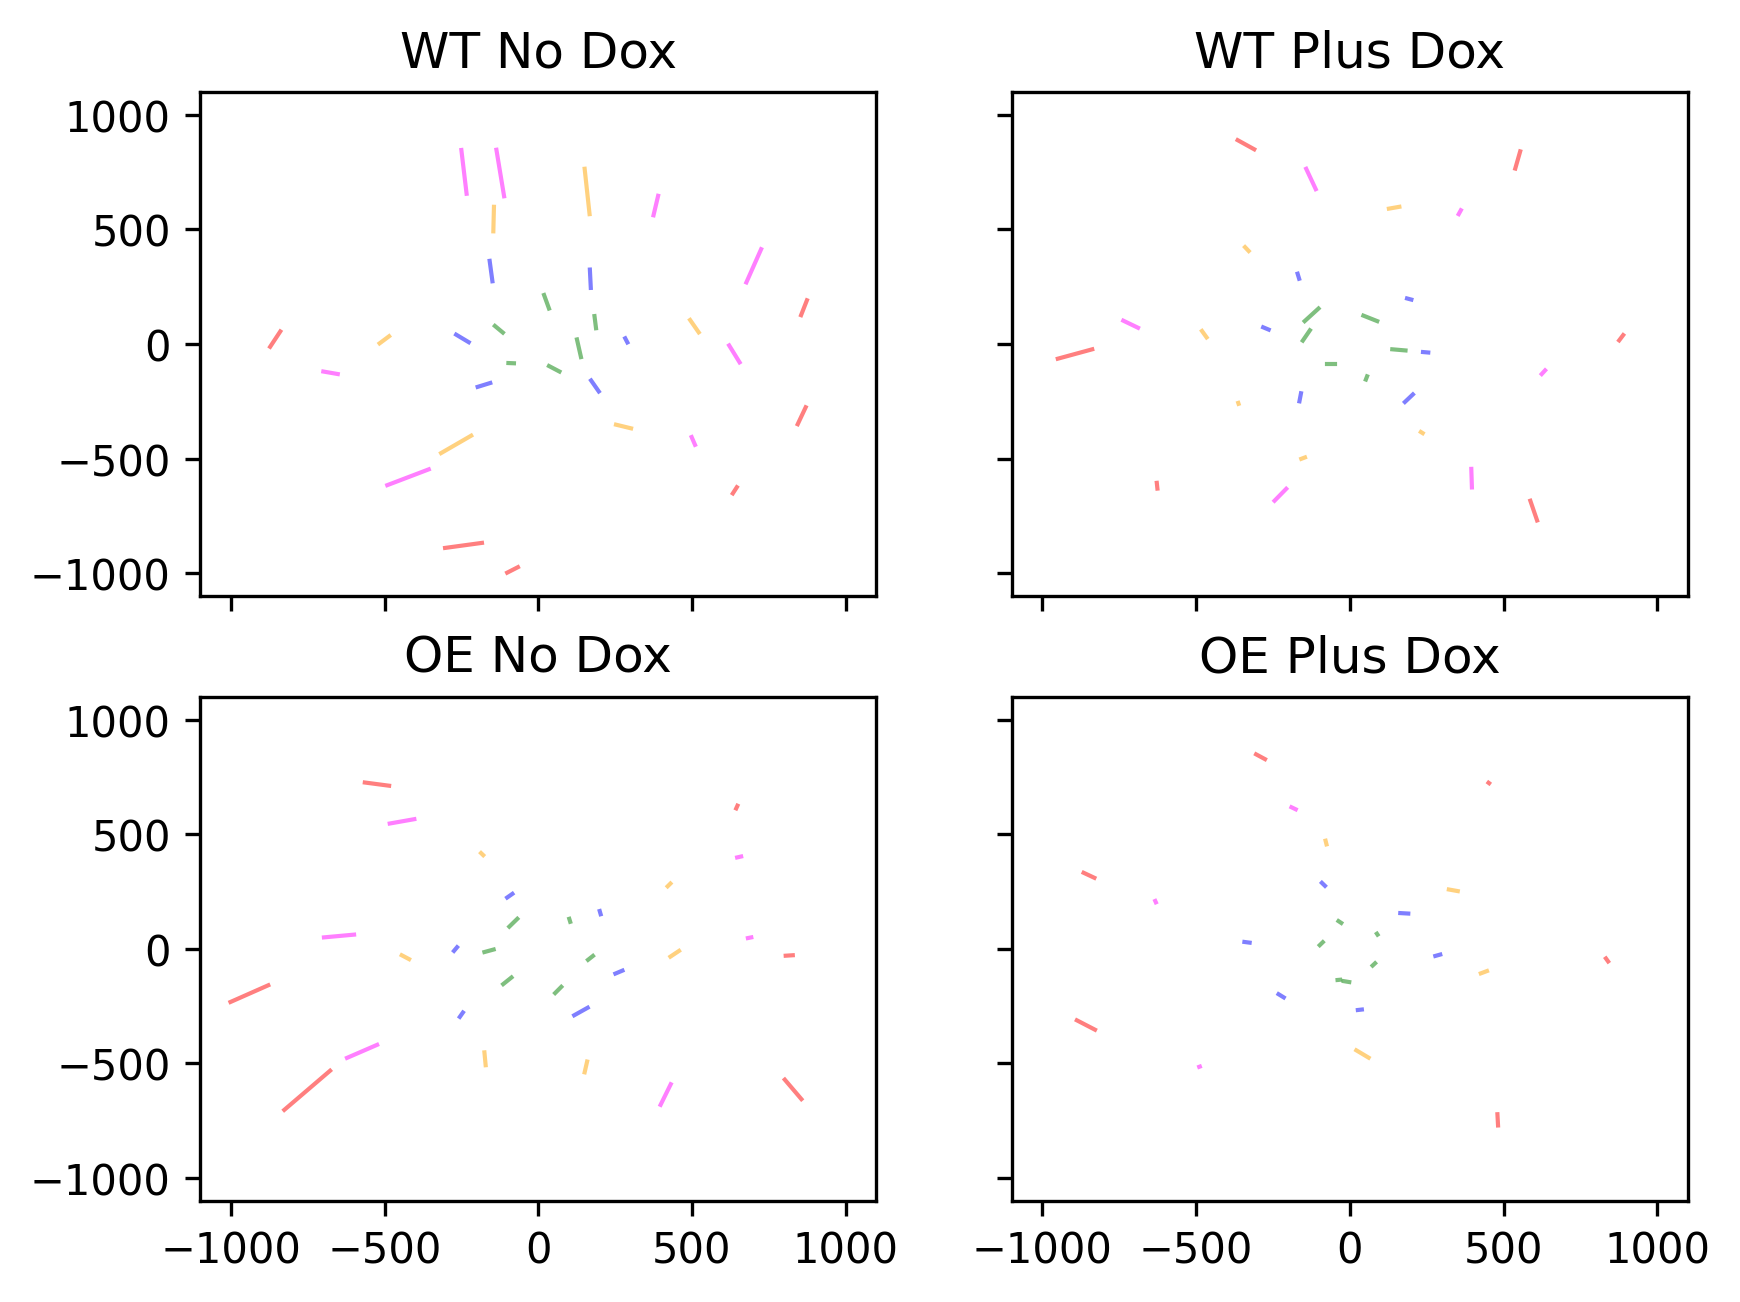

In [233]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-1100,1100)
plt.ylim(-1100,1100)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid

    ring_colors = ['green','blue','orange','magenta','red']
    if track_id.split('_')[1] == 'RED': continue
    elif well =='XY01': axes[0,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY02': axes[0,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY03': axes[1,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY04': axes[1,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Row B initial to final

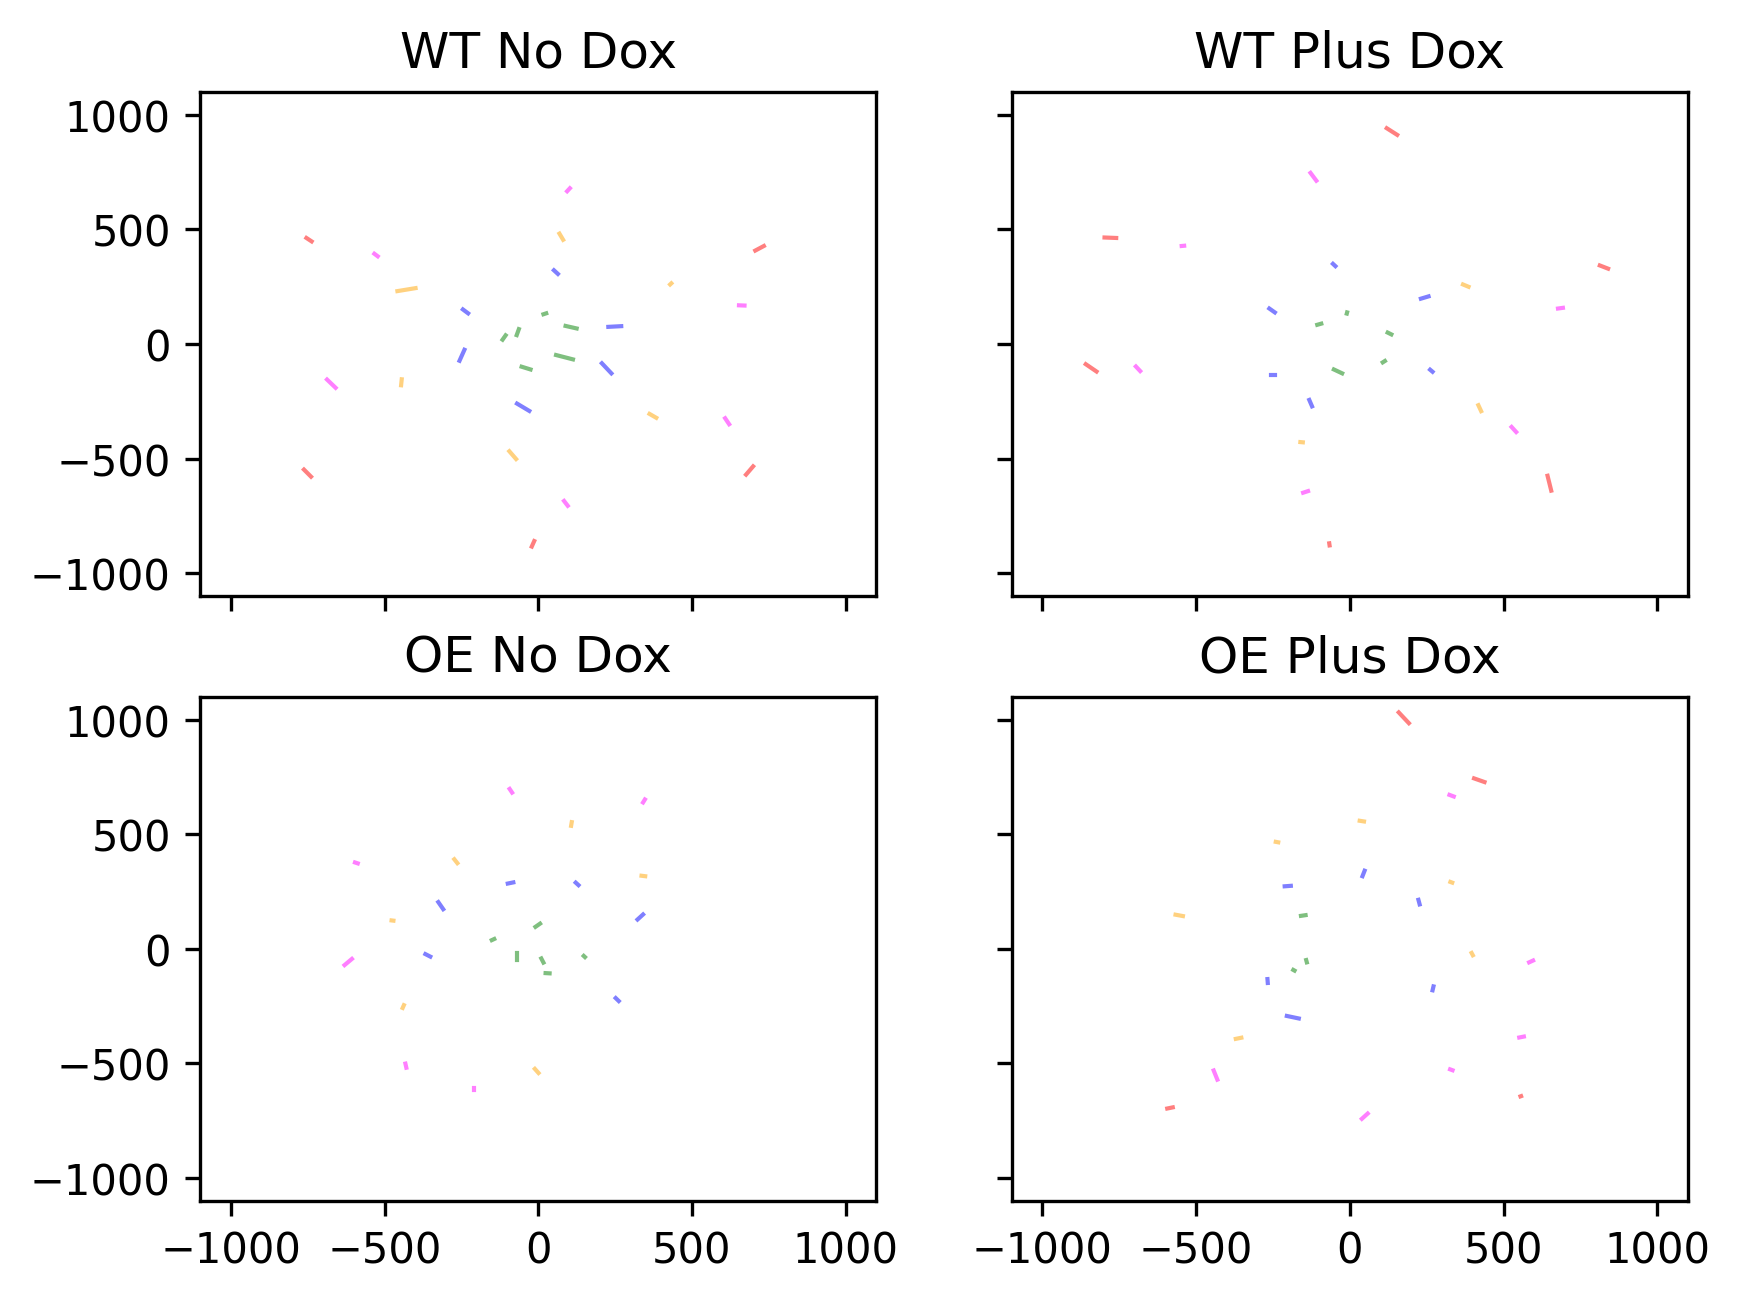

In [234]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-1100,1100)
plt.ylim(-1100,1100)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid

    ring_colors = ['green','blue','orange','magenta','red']
    if track_id.split('_')[1] == 'RED': continue
    elif well =='XY05': axes[0,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY06': axes[0,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY07': axes[1,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY08': axes[1,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## Row C initial to final

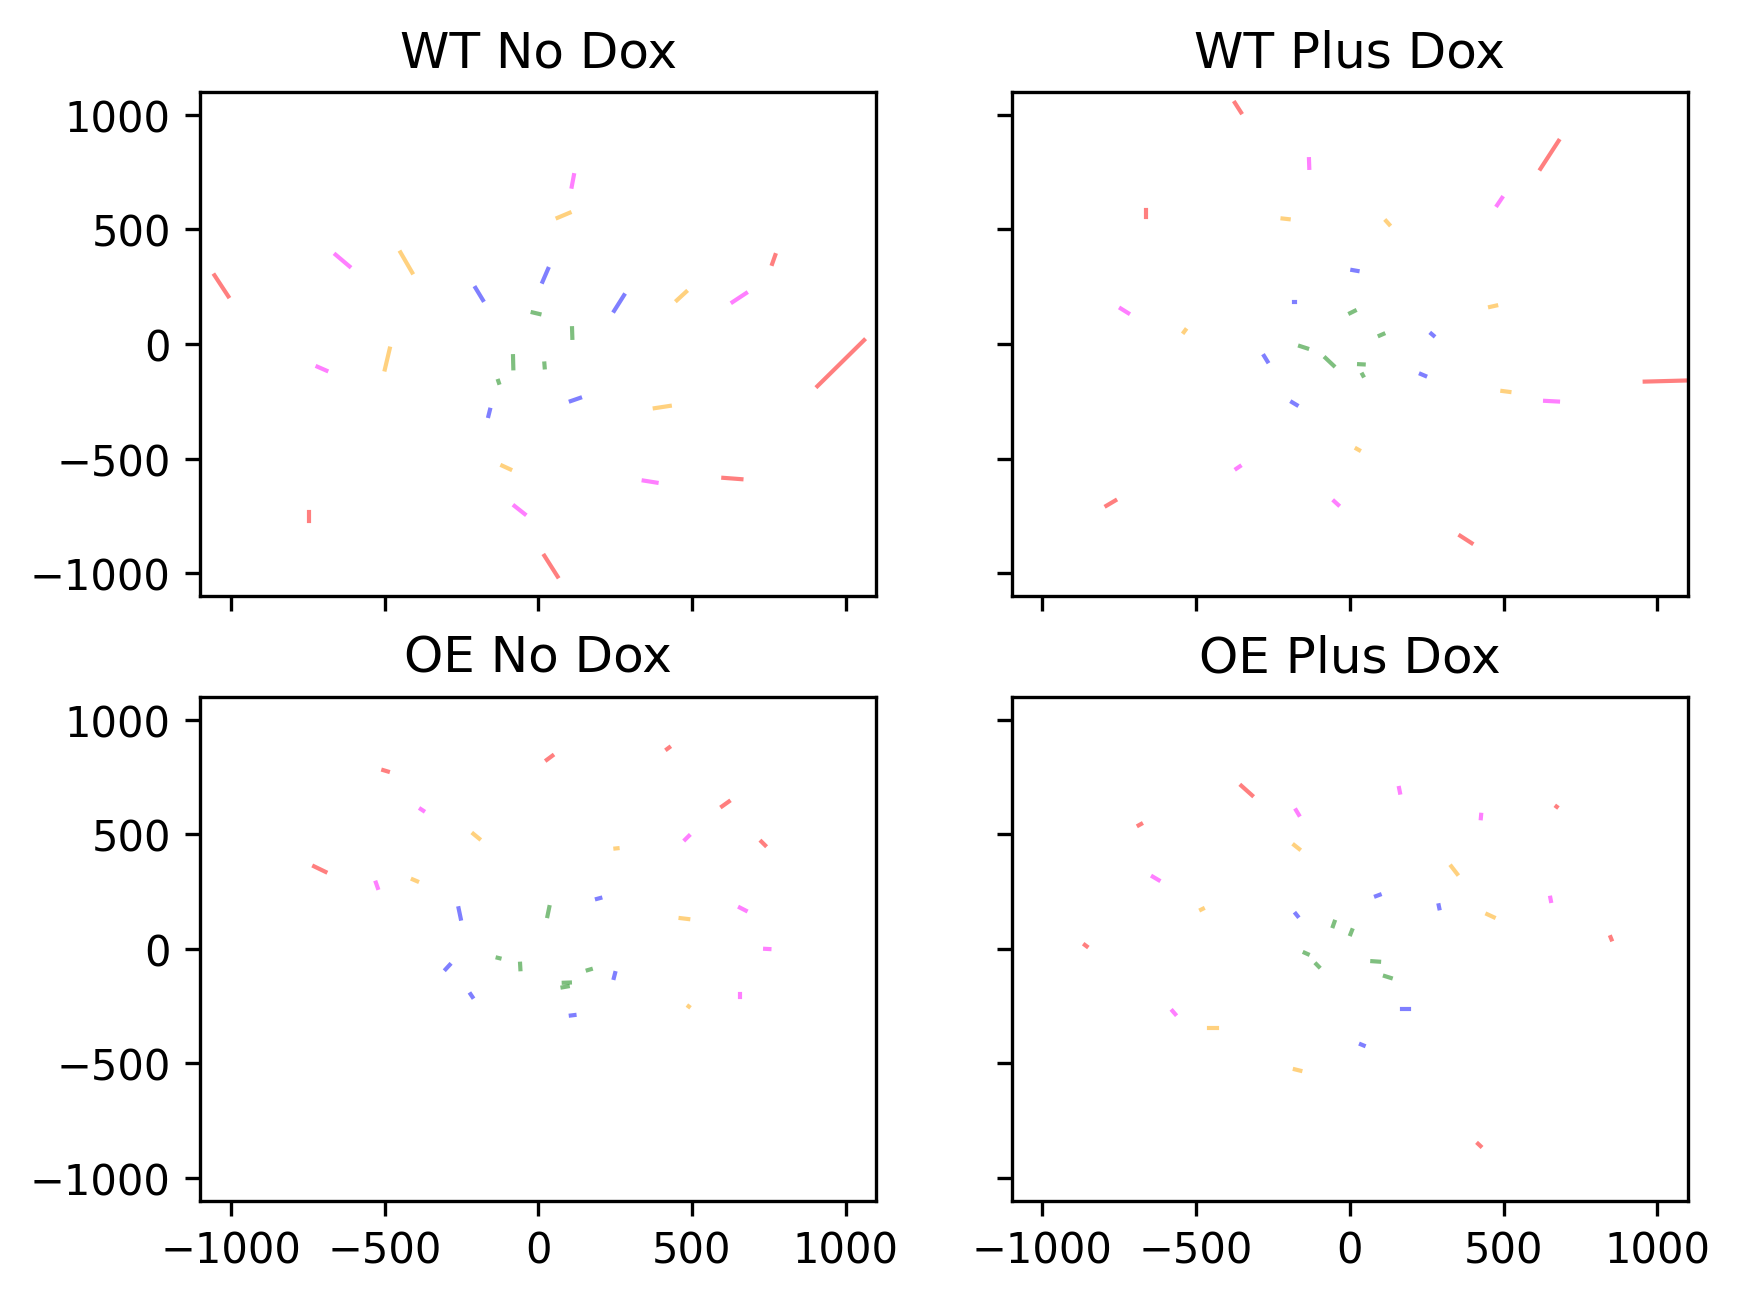

In [235]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-1100,1100)
plt.ylim(-1100,1100)

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid

    ring_colors = ['green','blue','orange','magenta','red']
    if track_id.split('_')[1] == 'RED': continue
    elif well =='XY09': axes[0,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY10': axes[0,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY11': axes[1,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well =='XY12': axes[1,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

## All rows initial to final

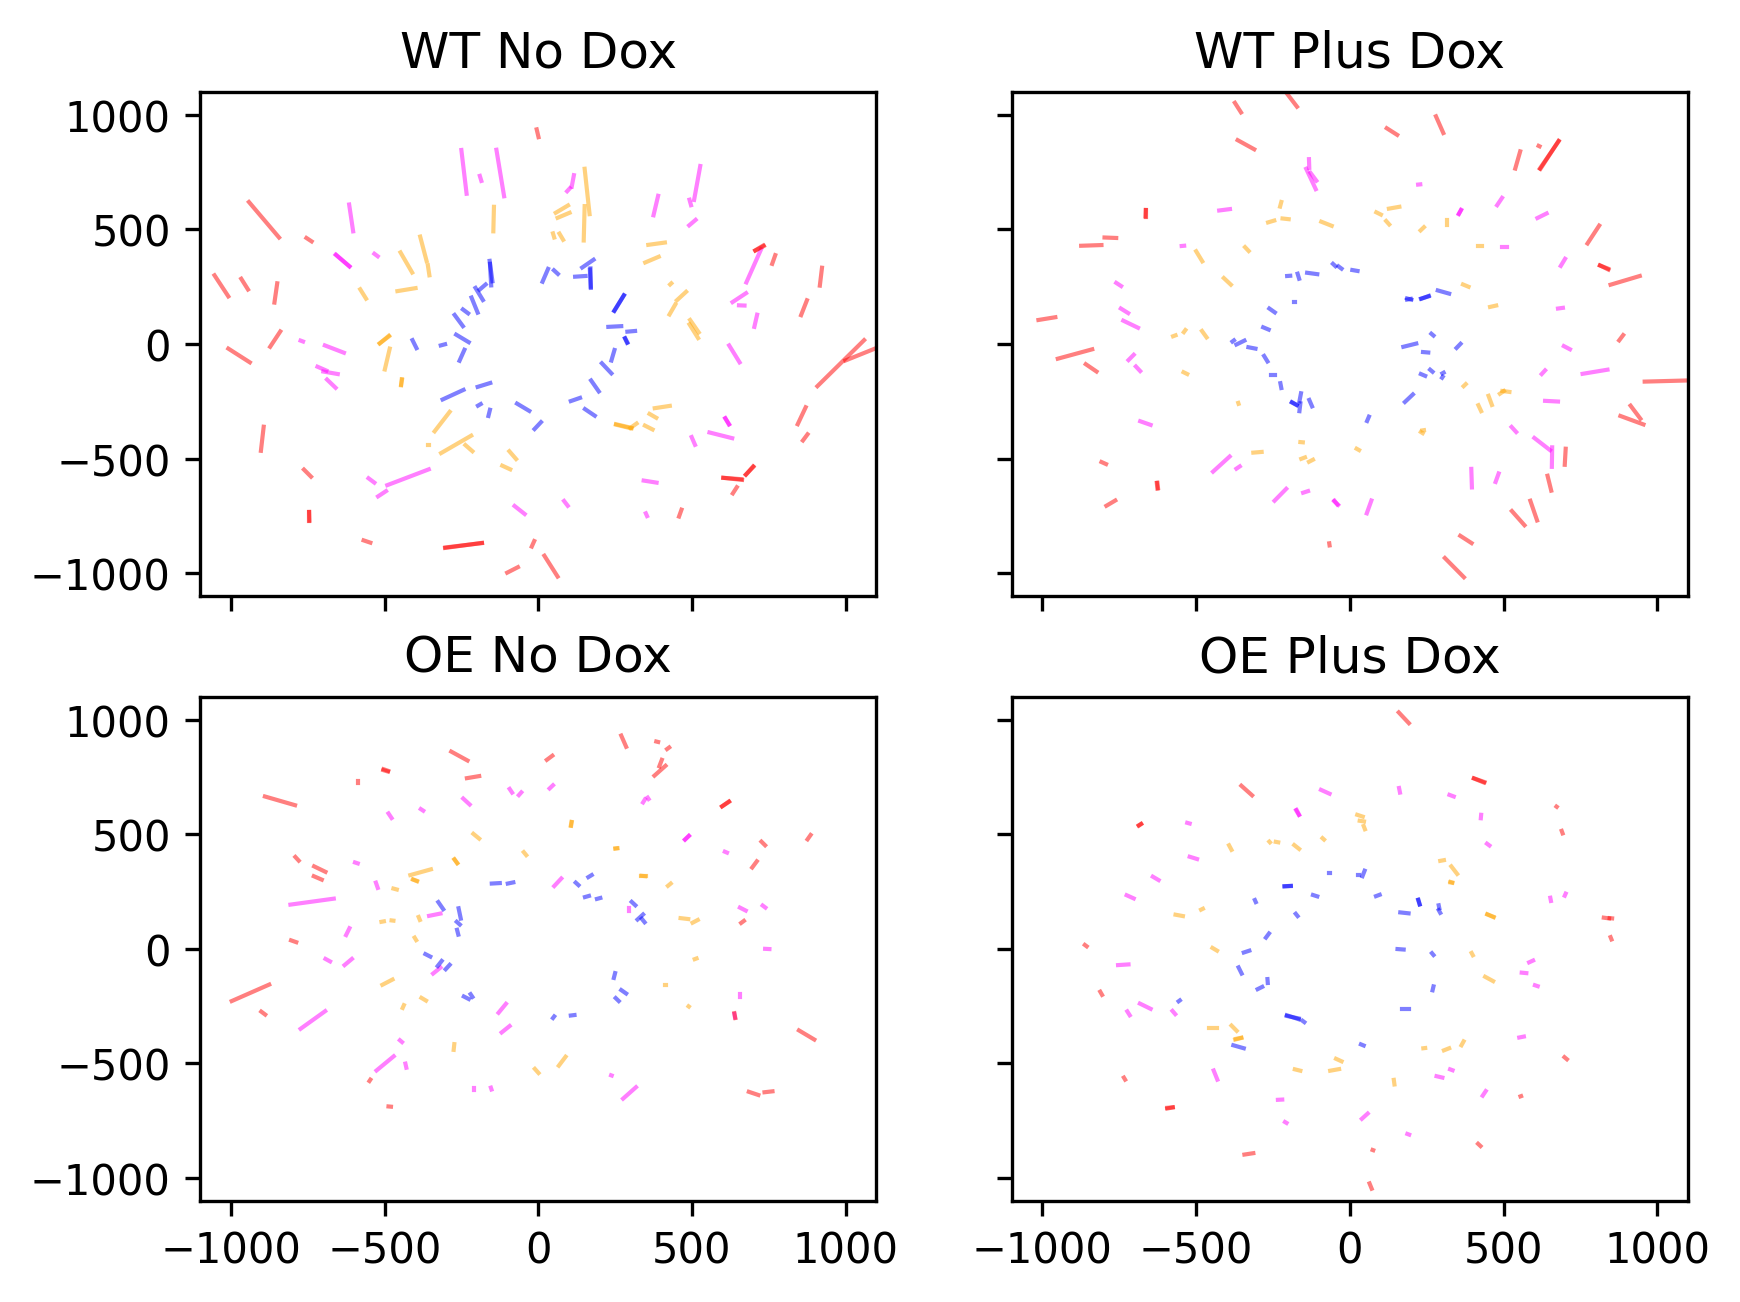

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)
plt.xlim(-1100,1100)
plt.ylim(-1100,1100)

for track_id, df in tracks.items():
    # print(track_id)
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]
    ring = track_id.split('_')[1]
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid

    ring_colors = ['green','blue','orange','magenta','red']
    if track_id.split('_')[1] == 'RED': continue
    if ring=='0': continue
    if ring=='5': continue
        
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot([x[0],x[-1]] , [y[0],y[-1]], linewidth=1.0, alpha=0.5, color=ring_colors[int(track_id.split('_')[1])])


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

plt.show()

# Plot PCM holes

In [13]:
well_centers = {
    'XY01': (1150,1350),
    'XY02': (1000,900),
    'XY03': (1075,725),
    'XY04': (1500,800),
    'XY05': (1050,1100),
    'XY06': (1175,1225),
    'XY07': (1950,875),
    'XY08': (1000,1150),
    'XY09': (1375,1425),
    'XY10': (850,1050),
    'XY11': (1525,325),
    'XY12': (1250,1375)}

In [54]:
expt_path = 'D:\\Emma Tracking Results'
data_paths = glob(os.path.join(expt_path,'*','*Coordinates.txt'))

hole_coords = {}
for path in data_paths:
    well = os.path.split(path)[0][-4:]
    coord_df = pd.read_csv(path, sep='\t', header=None, names=['X','Y'])
    coord_df['X'] = coord_df['X'] - well_centers[well][0]
    coord_df['Y'] = coord_df['Y'] - well_centers[well][1]
    hole_coords[well] = coord_df

## Calculate rotations to align PCM holes

-220.69480530205152


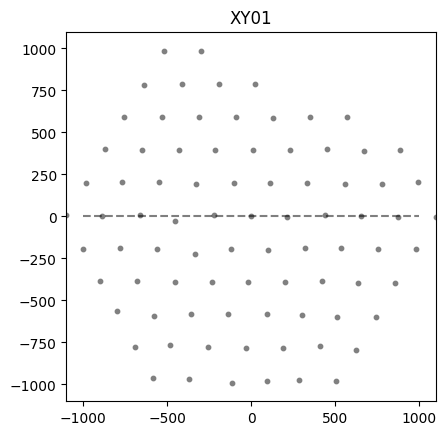

-216.14163445841942


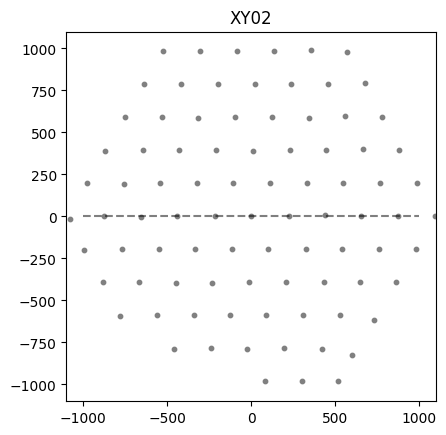

-220.0318165302091


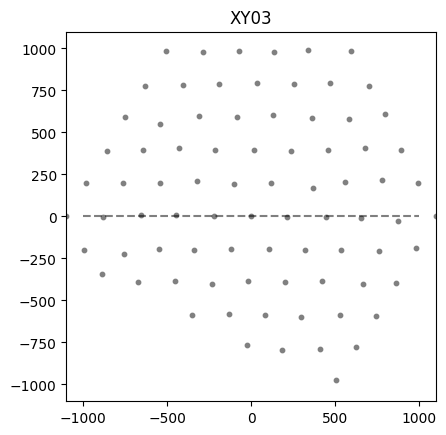

-218.9073875026419


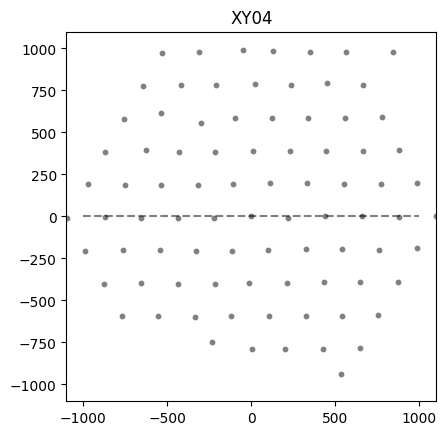

-215.42538577909778


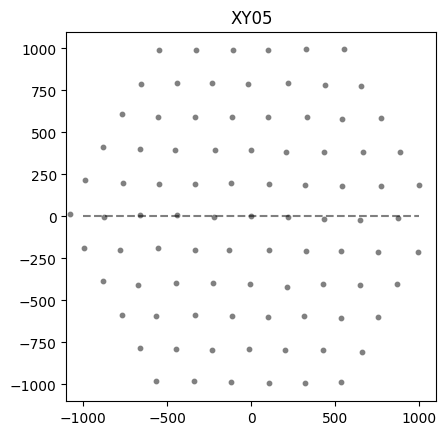

-220.7338328887028


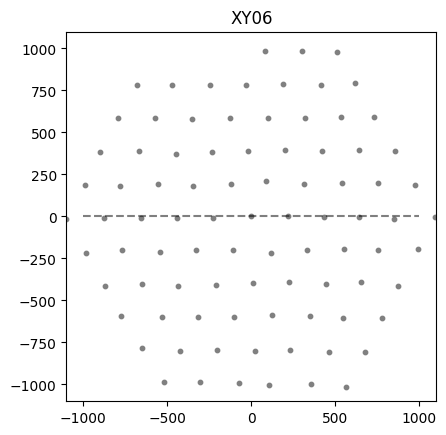

-218.53916434242464


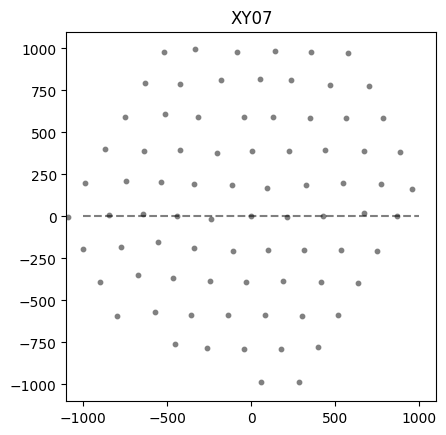

-199.12917323621105


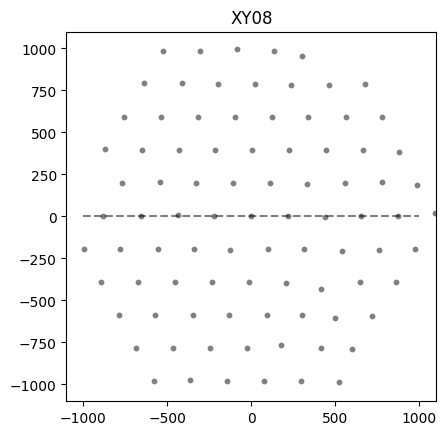

-219.1990731252966


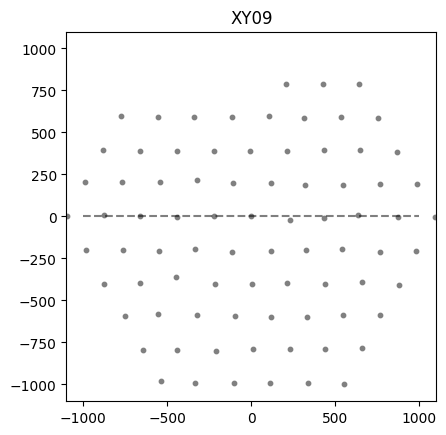

-177.26242006692382


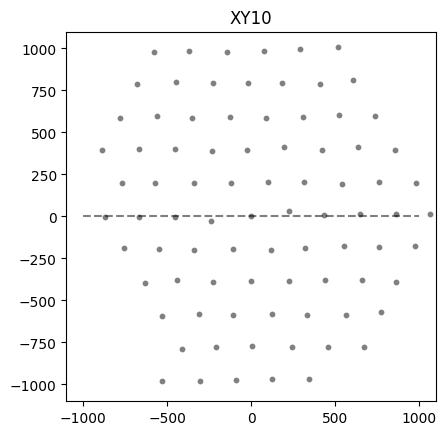

-217.32461862898762


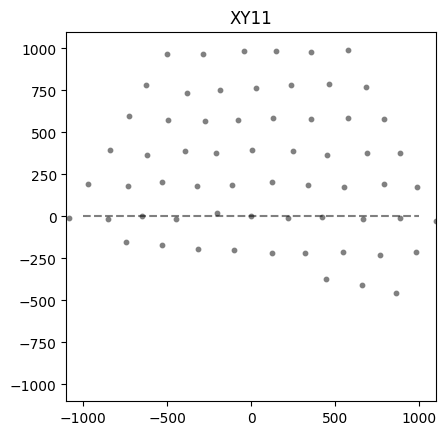

-223.25210097216504


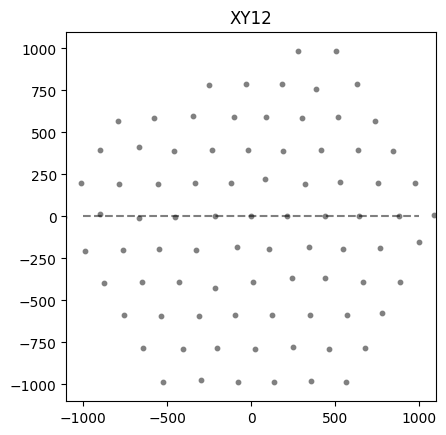

In [233]:
expt_path = 'D:\\Emma Tracking Results'
data_paths = glob(os.path.join(expt_path,'*','*Coordinates.txt'))

approx_well_centers = {
    'XY01': (1150,1350),
    'XY02': (1000,900),
    'XY03': (1075,725),
    'XY04': (1500,800),
    'XY05': (1050,1100),
    'XY06': (1175,1225),
    'XY07': (1950,875),
    'XY08': (1000,1150),
    'XY09': (1375,1425),
    'XY10': (850,1050),
    'XY11': (1525,325),
    'XY12': (1250,1375)}

def rotate_points(x,y,rotation_angle):
    x2 = (x*np.cos(rotation_angle)) - (y*np.sin(rotation_angle))
    y2 = (x*np.sin(rotation_angle)) + (y*np.cos(rotation_angle))  
    return (x2,y2)
    
hole_coords = {}
for path in data_paths:
    well = os.path.split(path)[0][-4:]
    coord_df = pd.read_csv(path, sep='\t', header=None, names=['X','Y'])
    coord_df['X'] = coord_df['X'] - approx_well_centers[well][0]
    coord_df['Y'] = coord_df['Y'] - approx_well_centers[well][1]
    hole_coords[well] = coord_df

well_adjustments = {
    'XY01': -0.025, 'XY02': 0.025, 'XY03': -0.01, 'XY04': -0.04,
    'XY05': -0.02, 'XY06': 0.025, 'XY07': -0.01, 'XY08': 0.015,
    'XY09': -0.08, 'XY10': 0.14, 'XY11': -0.04, 'XY12': 0.01}

final_well_centers, final_well_rotation = {}, {}

for well in well_adjustments:
    x = hole_coords[well]['X'].to_numpy()
    y = hole_coords[well]['Y'].to_numpy()
    
    mag = np.sqrt((x**2)+(y**2))
    argsort = np.argsort(mag)
    
    x,y,mag  = x[argsort], y[argsort], mag[argsort]
    final_well_centers[well] = (approx_well_centers[well][0]+x[0], approx_well_centers[well][1]+y[0])
    x,y = x-x[0], y-y[0]
    mag = np.sqrt((x**2)+(y**2))
    
    angle_subset = np.arctan2(y[1:7], x[1:7])
    rotation_angle = well_adjustments[well] - angle_subset[np.abs(angle_subset).argmin()]
    final_well_rotation[well] = rotation_angle
    
    fig, axis = plt.subplots()
    x2,y2 = rotate_points(x,y,rotation_angle)
    plt.scatter(x2,y2,s=10,c='grey')
    print(x2.min()/5)
    plt.plot([-1000,1000],[0,0], 'k--', alpha=0.5)
    axis.set_aspect(1)
    plt.title(well)
    plt.xlim(-1100,1100)
    plt.ylim(-1100,1100)
    plt.show()



## Create ideal PCM background

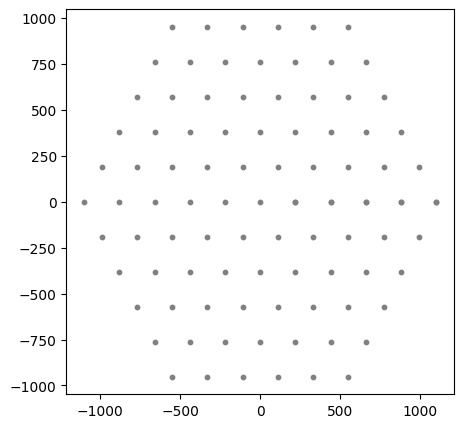

In [226]:
ihd = 220
n_rings = 5
dy = np.sin(np.pi/3)*ihd
dx = np.cos(np.pi/3)*ihd

pcm_holes_x,pcm_holes_y = [0],[0]
curr_x, curr_y,  = 0,0
displacements = [(-dx,-dy), (-ihd,0), (-dx,dy), (dx,dy), (ihd,0), (dx,-dy)]
for i in range(1, n_rings+1):
    curr_x = curr_x + ihd
    pcm_holes_x.append(curr_x)
    pcm_holes_y.append(curr_y)
    
    for j in range(6):
        for k in range(i):
            curr_x = curr_x + displacements[j][0]
            curr_y = curr_y + displacements[j][1]
            pcm_holes_x.append(curr_x)
            pcm_holes_y.append(curr_y)

fig,axis = plt.subplots(figsize=(5,5))
axis.scatter(pcm_holes_x,pcm_holes_y,s=10,c='grey')
plt.show()

## Rotate and draw

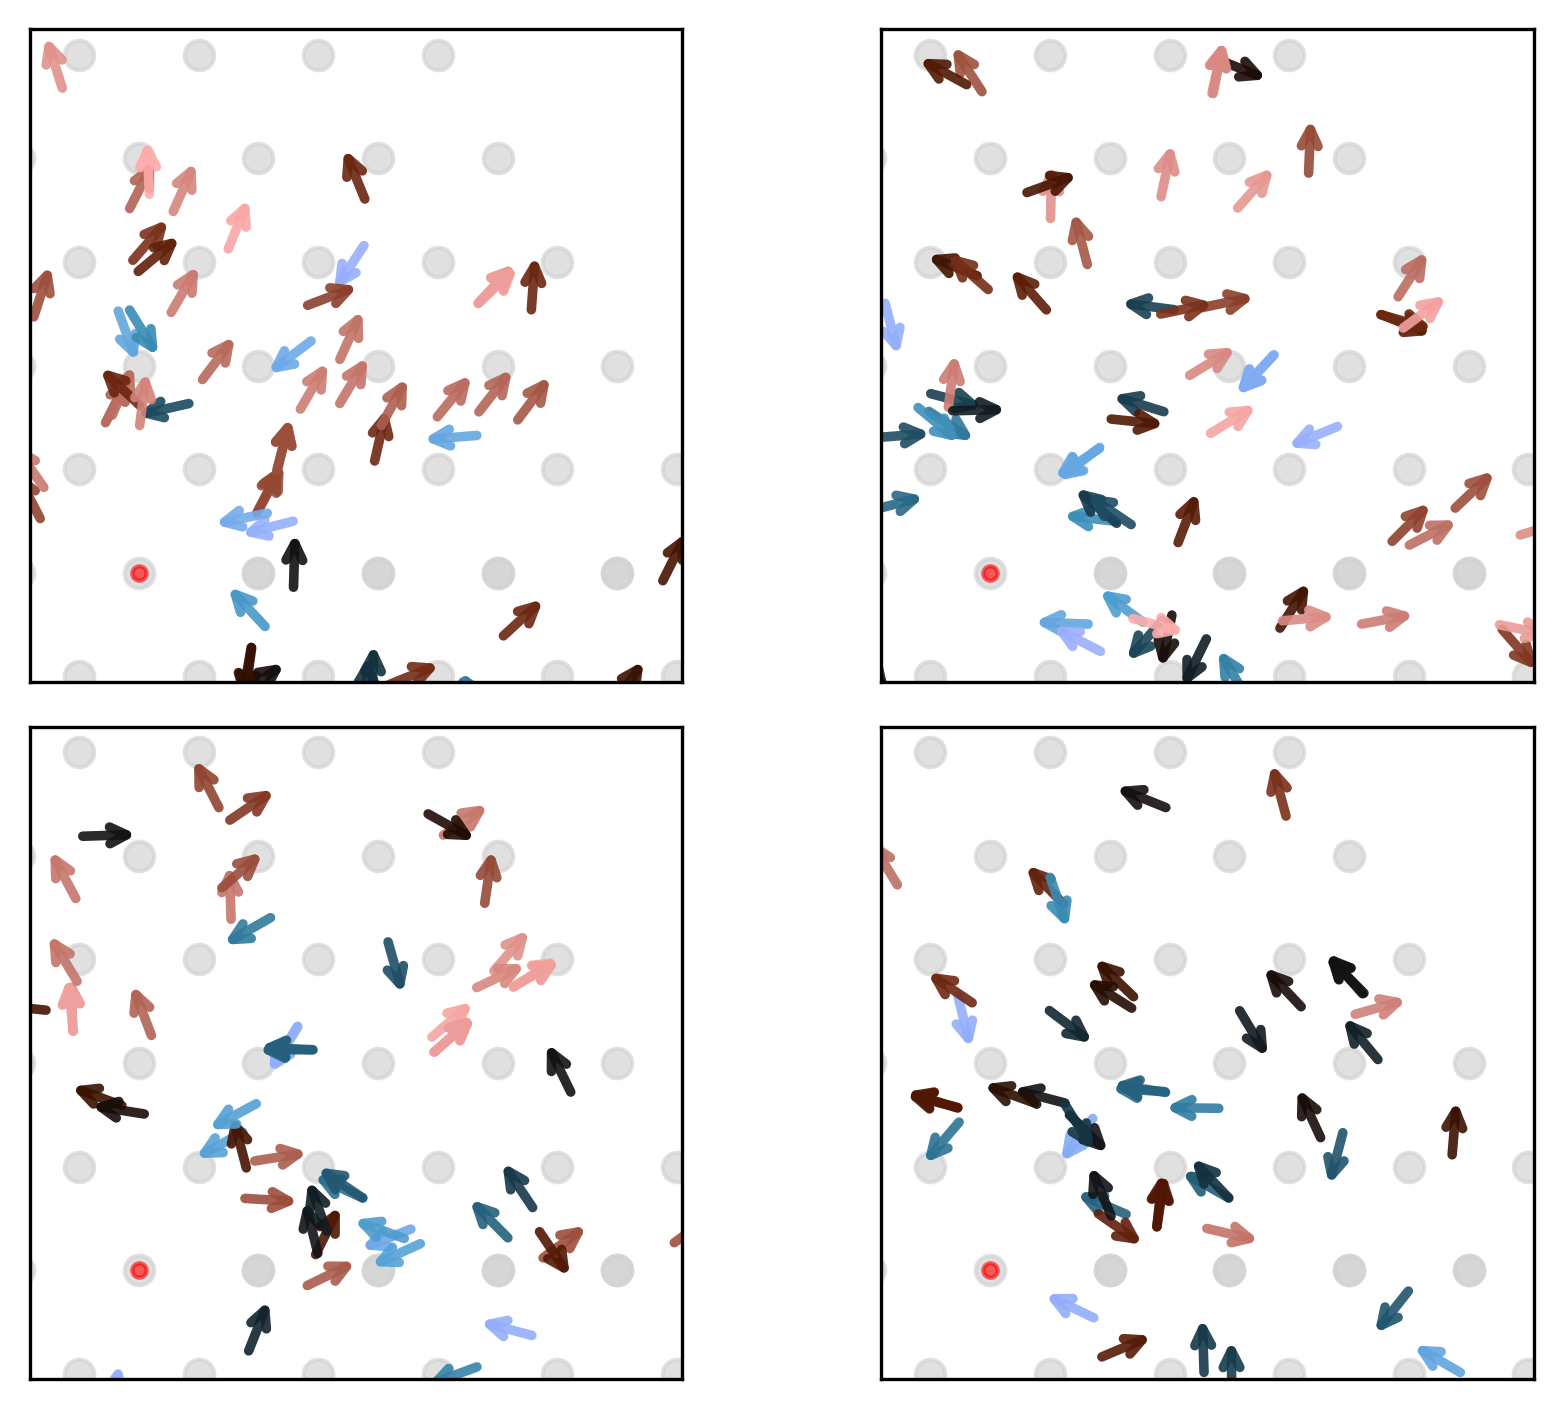

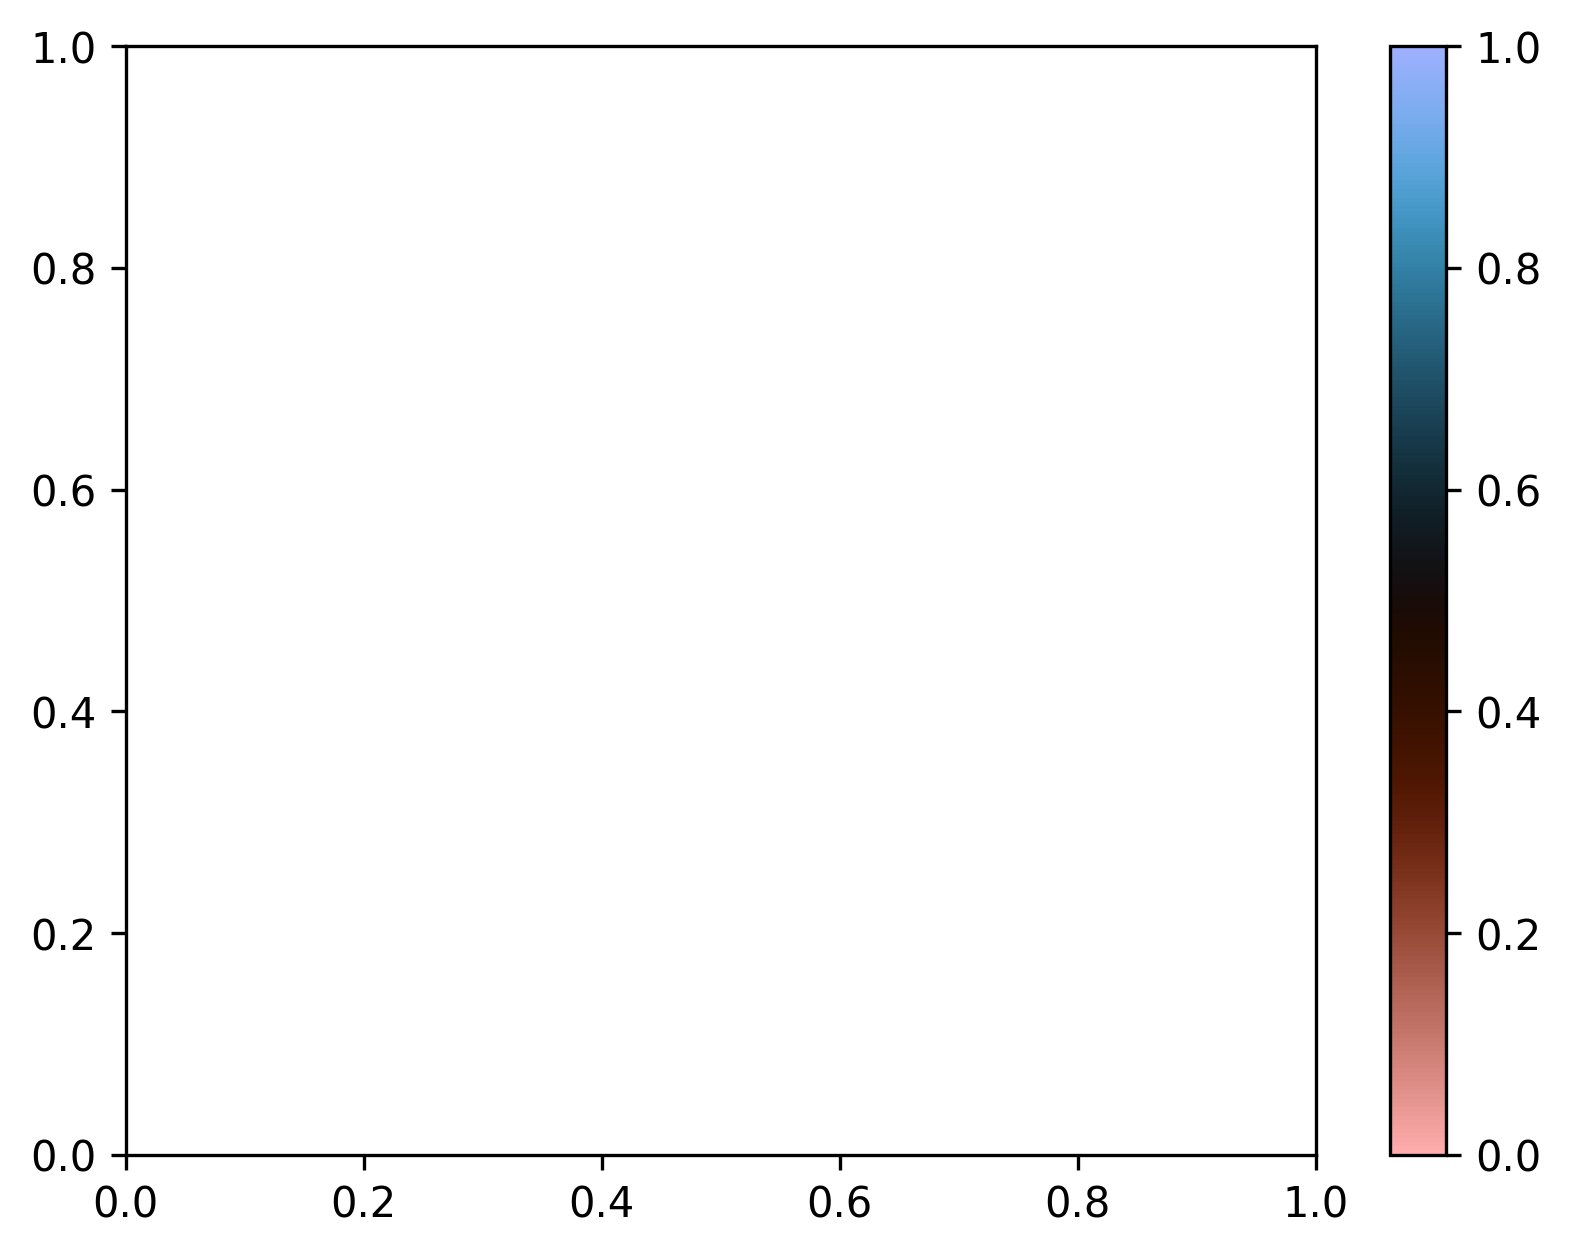

In [321]:
from matplotlib import colormaps, cm, colors
arrow_size = 100
hole_size = 50

cmap = colormaps['berlin_r']
kwargs = {'linewidth':2.3, 'shrinkA':0, 'shrinkB':0, 'alpha':0.9}
arrowstyle = ArrowStyle('->', head_width=2, head_length=4)

def rotate_points(x,y,rotation_angle):
    x2 = (x*np.cos(rotation_angle)) - (y*np.sin(rotation_angle))
    y2 = (x*np.sin(rotation_angle)) + (y*np.cos(rotation_angle))  
    return (x2,y2)
    
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300, layout='tight')
acol, bcol, ccol, dcol = iter(a), iter(b), iter(c), iter(d)
if True:
    axes[0,0].scatter(pcm_holes_x, pcm_holes_y, s=hole_size, c='lightgrey', alpha=0.7, marker='o')
    axes[0,1].scatter(pcm_holes_x, pcm_holes_y, s=hole_size, c='lightgrey', alpha=0.7, marker='o')
    axes[1,0].scatter(pcm_holes_x, pcm_holes_y, s=hole_size, c='lightgrey', alpha=0.7, marker='o')
    axes[1,1].scatter(pcm_holes_x, pcm_holes_y, s=hole_size, c='lightgrey', alpha=0.7, marker='o')

    axes[0,0].scatter(pcm_holes_x[0], pcm_holes_y[0], s=12, c='red', alpha=0.6, marker='o')
    axes[0,1].scatter(pcm_holes_x[0], pcm_holes_y[0], s=12, c='red', alpha=0.6, marker='o')
    axes[1,0].scatter(pcm_holes_x[0], pcm_holes_y[0], s=12, c='red', alpha=0.6, marker='o')
    axes[1,1].scatter(pcm_holes_x[0], pcm_holes_y[0], s=12, c='red', alpha=0.6, marker='o')

    axes[0,0].set_aspect(1)
    axes[0,1].set_aspect(1)
    axes[1,0].set_aspect(1)
    axes[1,1].set_aspect(1)
    
    axes[0,0].set_yticks([],[])
    axes[0,1].set_yticks([],[])
    axes[1,0].set_yticks([],[])
    axes[1,1].set_yticks([],[])
    
    axes[0,0].set_xticks([],[])
    axes[0,1].set_xticks([],[])
    axes[1,0].set_xticks([],[])
    axes[1,1].set_xticks([],[])
    
    plt.xlim(-200,1000)
    plt.ylim(-200,1000)


for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    ring = track_id.split('_')[1]
    
    if track_id.split('_')[1] == 'RED': continue
    if ring=='0': continue
    if ring=='5': continue
        
    # Center and rotate
    x = df['X'].to_numpy() - final_well_centers[well][0]
    y = df['Y'].to_numpy() - final_well_centers[well][1]
    x,y = rotate_points(x, y, final_well_rotation[well])

    magnitude = np.sqrt(((x[-1]-x[0])**2) + ((y[-1]-y[0])**2))
    scale_factor = arrow_size / magnitude
    
    x_final = x[0] + ((x[-1]-x[0]) * scale_factor)
    y_final = y[0] + ((y[-1]-y[0]) * scale_factor)

    if well in   ['XY01','XY05','XY09']: 
        axes[0,0].add_patch(Arrow([x[0],y[0]], [x_final,y_final], arrowstyle=arrowstyle, color=cmap(next(acol)/180), **kwargs))
        
    elif well in ['XY02','XY06','XY10']: 
        axes[0,1].add_patch(Arrow([x[0],y[0]], [x_final,y_final], arrowstyle=arrowstyle, color=cmap(next(bcol)/180), **kwargs))
        
    elif well in ['XY03','XY07','XY11']: 
        axes[1,0].add_patch(Arrow([x[0],y[0]], [x_final,y_final], arrowstyle=arrowstyle, color=cmap(next(ccol)/180), **kwargs))
        
    elif well in ['XY04','XY08','XY12']: 
        axes[1,1].add_patch(Arrow([x[0],y[0]], [x_final,y_final], arrowstyle=arrowstyle, color=cmap(next(dcol)/180), **kwargs))

plt.show()

fig,axis = plt.subplots(dpi=300)
norm = colors.Normalize(0, 1)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axis)
plt.show()

# Calculate differences in radial angles

## Define cell centers

In [27]:
well_centers = {
    'XY01': (1150,1350),
    'XY02': (1000,900),
    'XY03': (1075,725),
    'XY04': (1500,800),
    'XY05': (1050,1100),
    'XY06': (1175,1225),
    'XY07': (1950,875),
    'XY08': (1000,1150),
    'XY09': (1375,1425),
    'XY10': (850,1050),
    'XY11': (1525,325),
    'XY12': (1250,1375)}

## Histogram and scatter

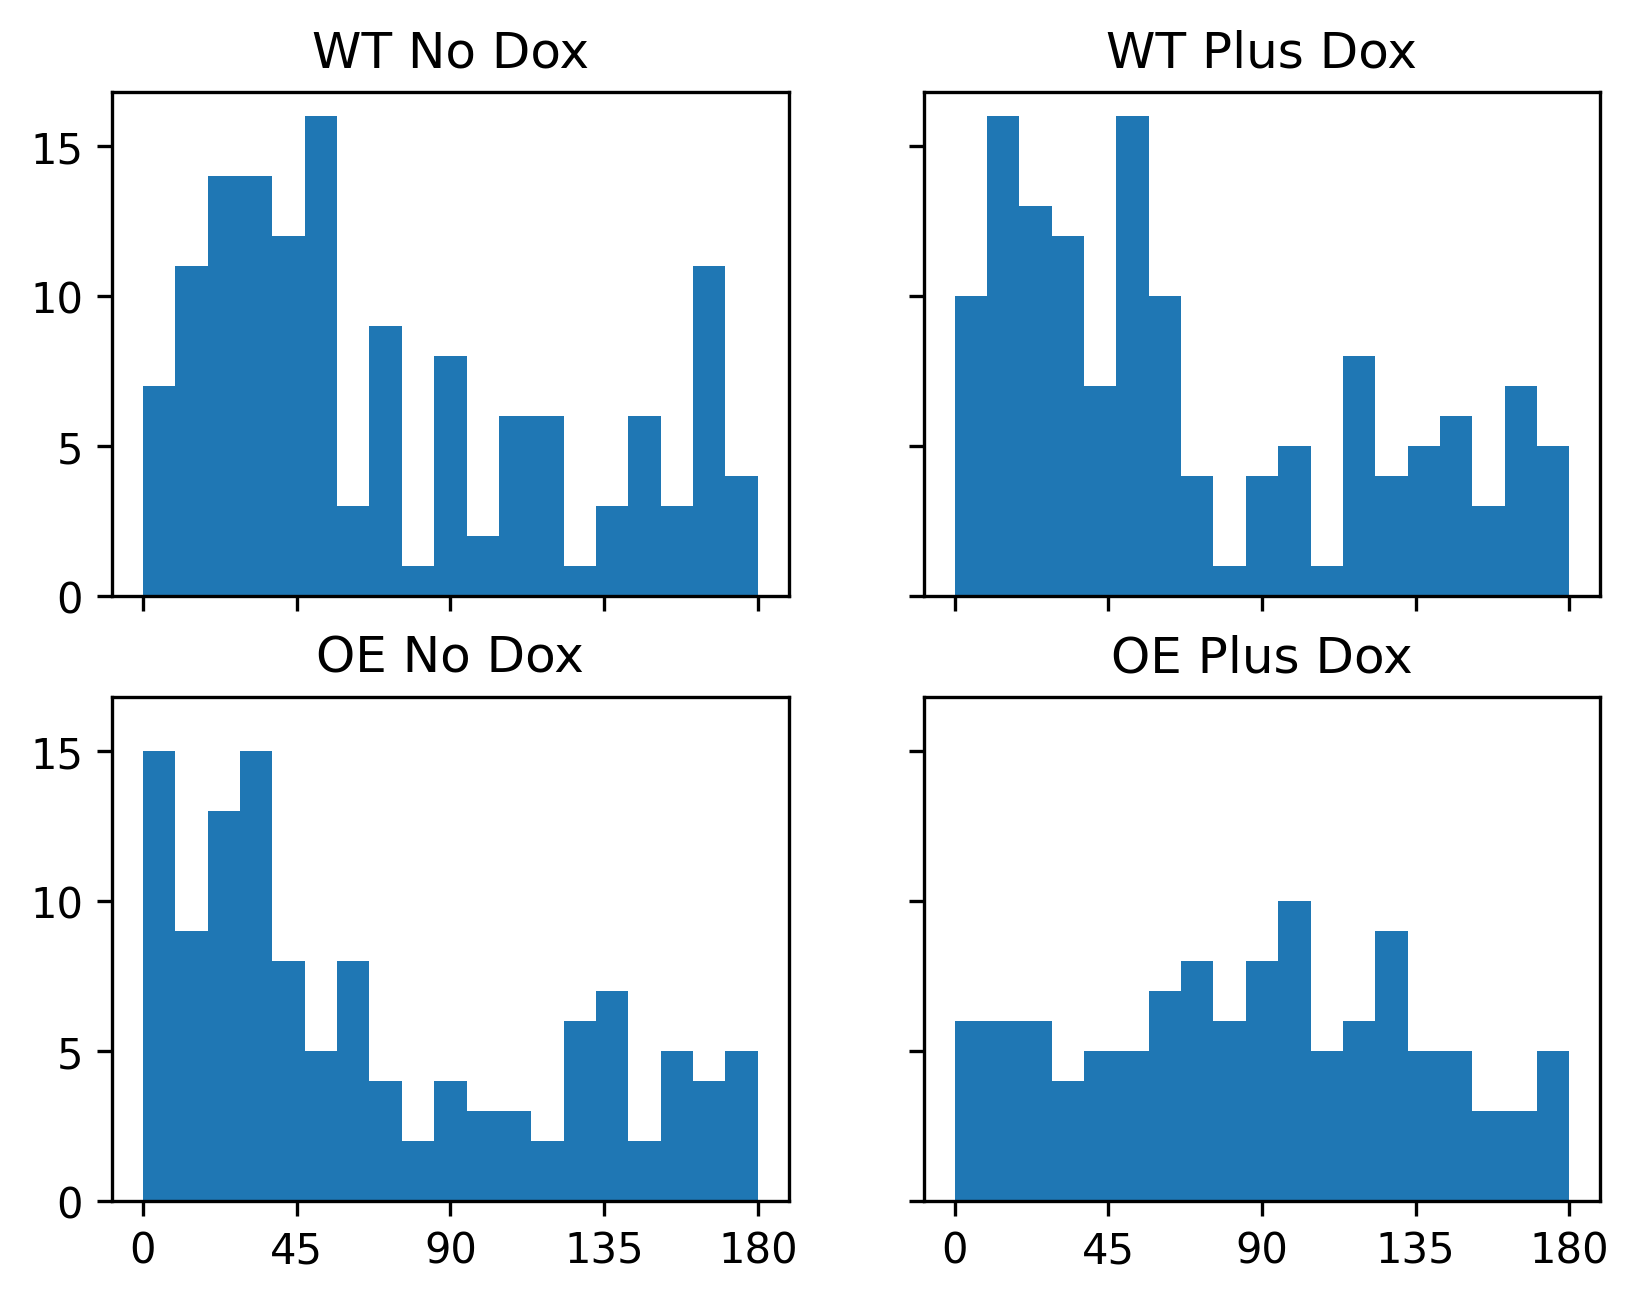

In [246]:
a,b,c,d = [],[],[],[]
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    ring = track_id.split('_')[1]
    
    x_mid, y_mid = well_centers[well]
    
    x = df['X'].to_numpy() - x_mid
    y = df['Y'].to_numpy() - y_mid
    angle_to_init = np.arctan2(y[0],x[0])
    distance_from_center = np.sqrt((x[0]**2) + (y[0]**2))
    displacement_angle = np.arctan2(y[-1]-y[0], x[-1]-x[0])
    angle_diff = np.absolute(displacement_angle - angle_to_init)
    angle_diff = np.where(angle_diff>math.pi, (2*math.pi)-angle_diff, angle_diff)
    angle_diff = angle_diff * (180/np.pi)

    if track_id.split('_')[1] == 'RED': continue
    if ring=='0': continue
    if ring=='5': continue
        
    elif well in ['XY01','XY05','XY09']: a.append(angle_diff)
    elif well in ['XY02','XY06','XY10']: b.append(angle_diff)
    elif well in ['XY03','XY07','XY11']: c.append(angle_diff)
    elif well in ['XY04','XY08','XY12']: d.append(angle_diff)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=300)

axes[0,0].hist(a, bins=np.linspace(0,180,20))
axes[0,1].hist(b, bins=np.linspace(0,180,20))
axes[1,0].hist(c, bins=np.linspace(0,180,20))
axes[1,1].hist(d, bins=np.linspace(0,180,20))

axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].set_xticks([0,45,90,135,180])
plt.show()


## Box and Violin Plot

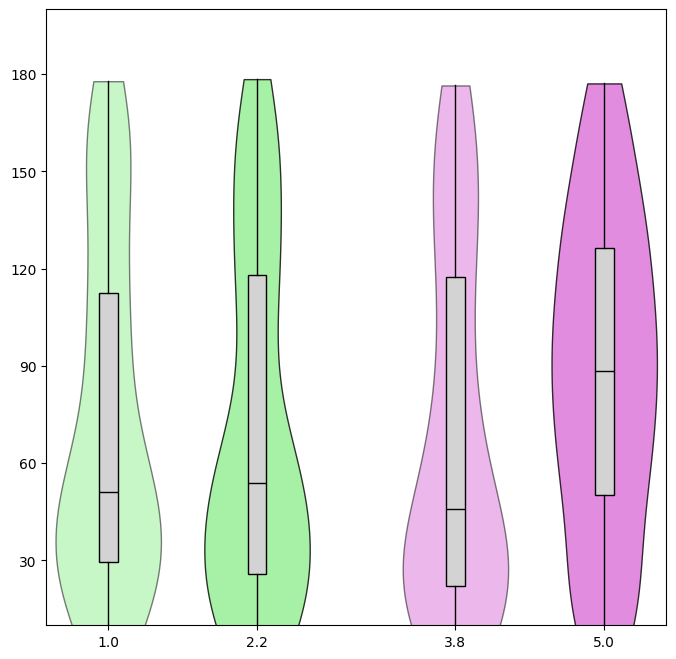

In [29]:
all_data = [np.array(a), np.array(b), np.array(c), np.array(d)]

plt.figure(dpi=100, figsize=(8,8))
violinplot = plt.violinplot(all_data, positions=[1,2.2,3.8,5], showextrema=False, showmedians=False, widths=0.85, points=200, bw_method=0.4)
colors = iter(['lightgreen','lightgreen','orchid','orchid'])
hatches = iter(['','/','','/'])
alphas = iter([0.5,0.8,0.5,0.8])
for violin in violinplot['bodies']:
    violin.set_facecolor(next(colors))
    violin.set_alpha(next(alphas))
    violin.set_edgecolor('black')
    violin.set_linewidth(1)
    # violin.set_hatch(next(hatches))
    violin.set_hatch_linewidth(0.5)
    
boxplot = plt.boxplot(all_data, positions=[1,2.2,3.8,5], whis=(0,100), showfliers=False, medianprops={'color':'black'}, widths=0.15, capwidths=0.0, patch_artist=True)
for box in boxplot['boxes']:
    box.set_facecolor('lightgrey')
plt.ylim(10,200)
plt.yticks([30,60,90,120,150,180])
plt.show()

## Bar graph

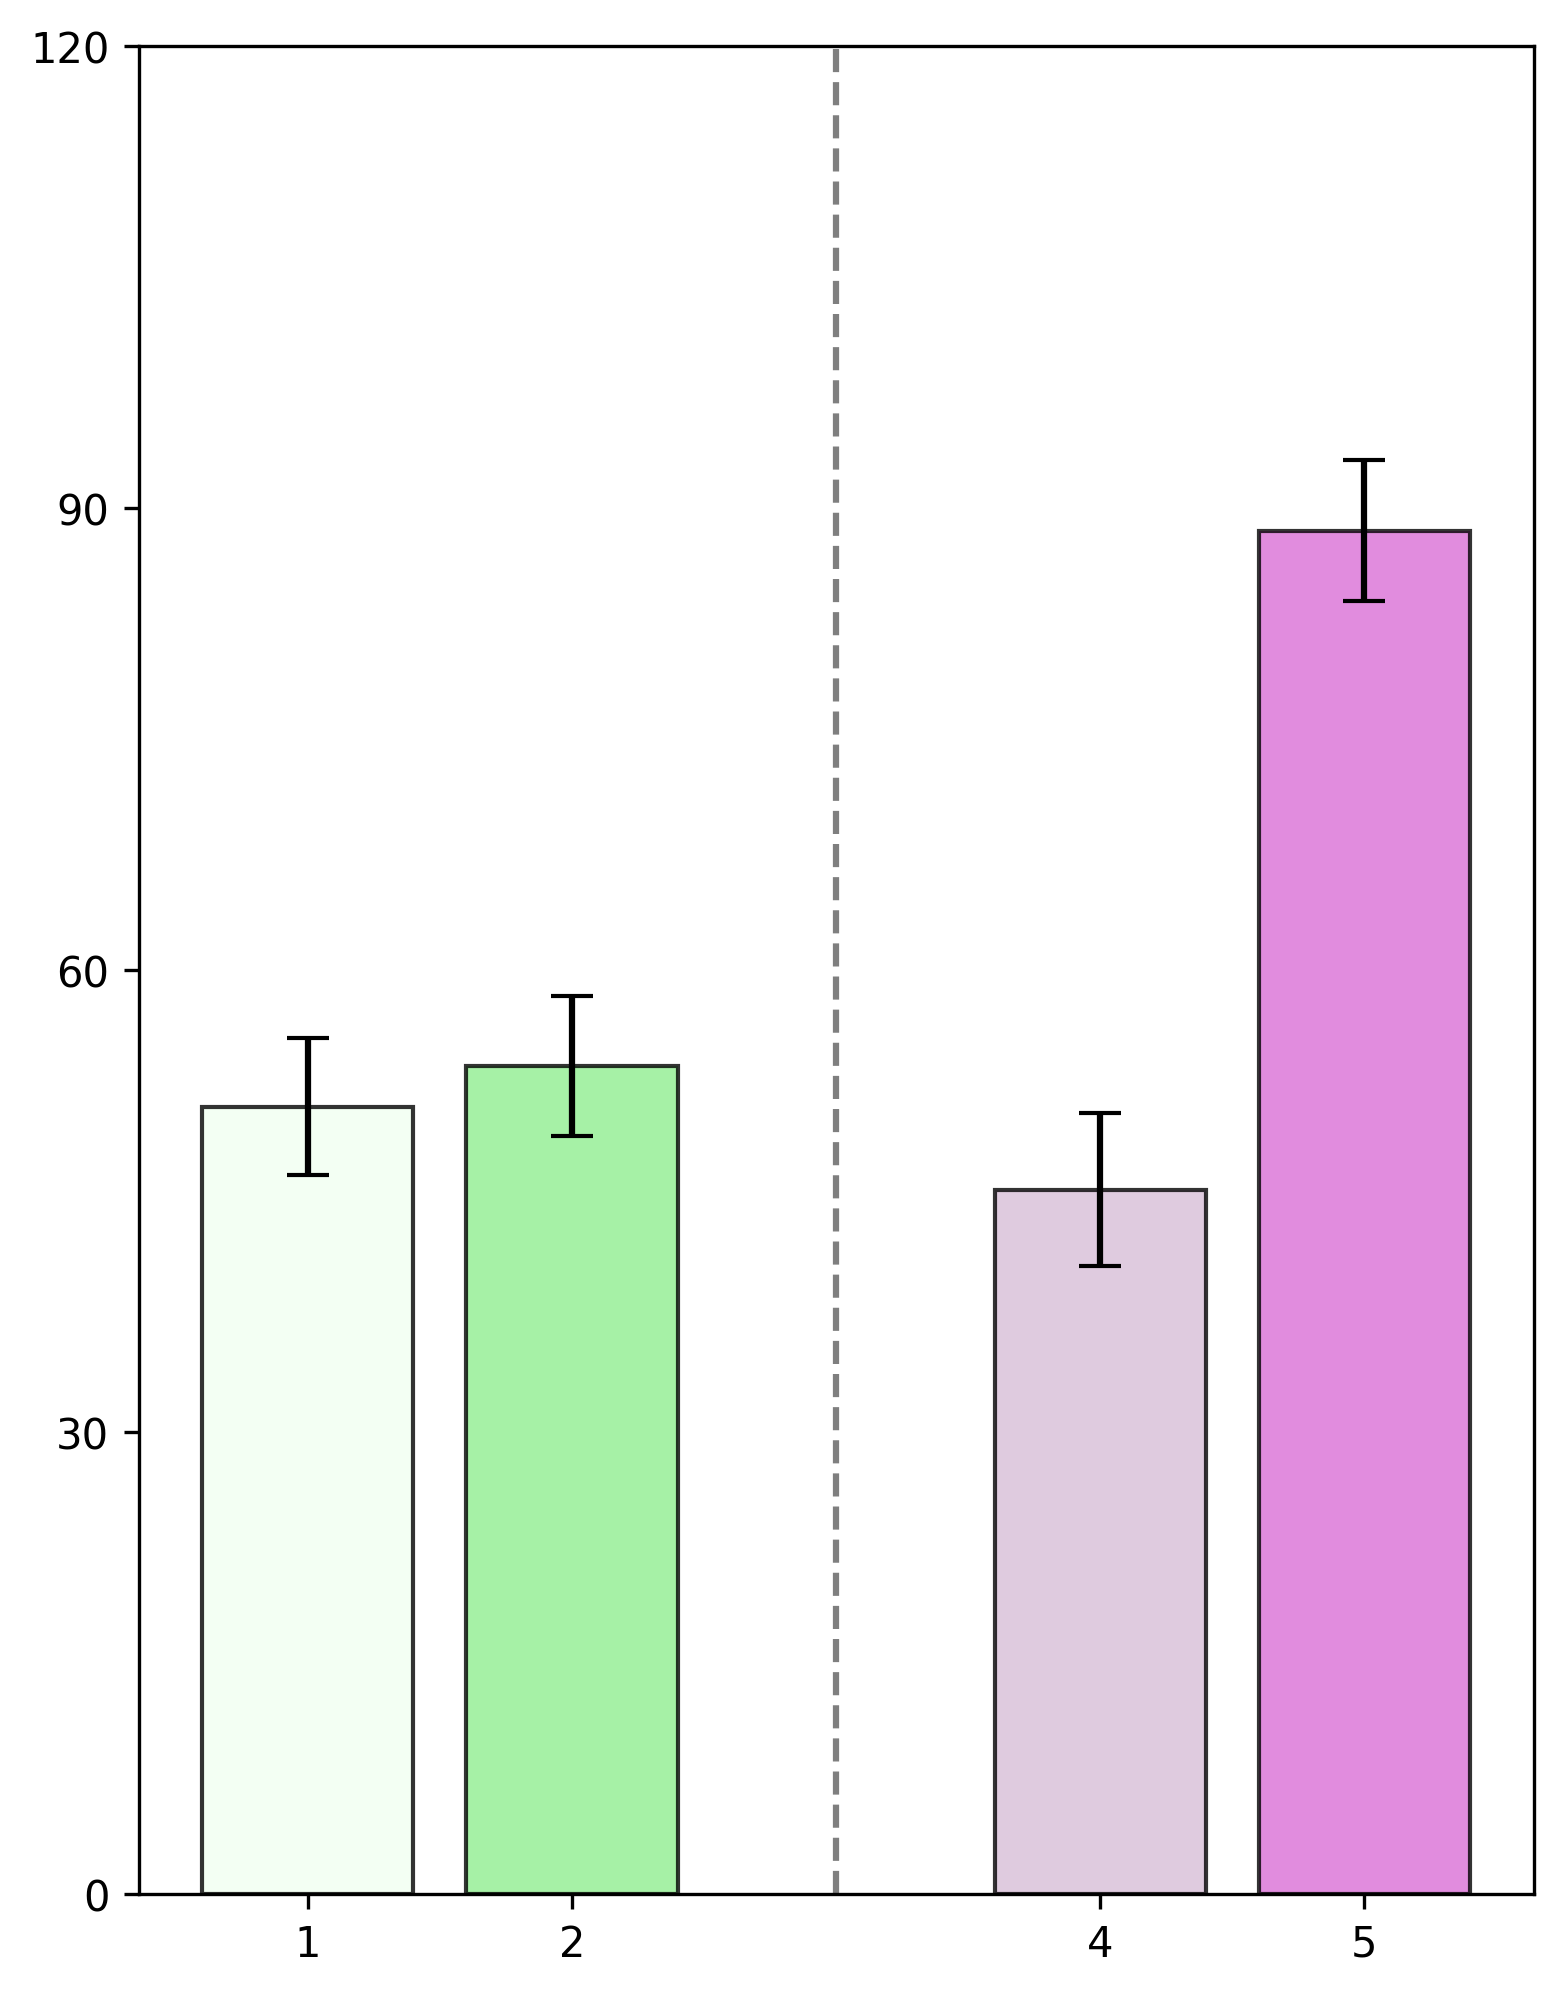

In [332]:
all_data = [np.array(a), np.array(b), np.array(c), np.array(d)]

plt.figure(dpi=300, figsize=(6,8))
bargraph = plt.bar([1,2,4,5], [np.median(data) for data in all_data], yerr=[np.std(data)/np.sqrt(len(data)) for data in all_data], 
                   color=['honeydew','lightgreen','thistle','orchid'], capsize=5, edgecolor='black',linewidth=1)
alphas = iter([0.8,0.8,0.8,0.8])
for bar in bargraph:
    bar.set_alpha(next(alphas))
plt.ylim(0,120)
plt.yticks([0,30,60,90,120])
plt.plot([3,3],[0,120], 'k--', alpha=0.5)
plt.xticks([1,2,4,5])
plt.show()

## Stats

In [ ]:
[np.std(d)/np.sqrt(len(d)) for d in data]

### All rings

In [270]:
print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.6056094739880857
0.5928413393989915
0.19563072700525508
0.9614613335927399
0.09259537181445113
0.12108169453250583


### Rings 1-4

In [333]:
print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.5587168729552241
0.22330802093084934
0.01901275463746077
0.626894612288448
0.005283490258501974
0.002869808042336718


### Rings 2-4

In [276]:
print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.25903318662385666
0.5127541030816696
0.15958913220965976
0.923520301469723
0.01457884528521915
0.21632078619217188


### Rings 3-4

In [267]:
print(ranksums(a,b).pvalue)
print(ranksums(a,c).pvalue)
print(ranksums(a,d).pvalue)
print(ranksums(b,c).pvalue) # Not sig
print(ranksums(b,d).pvalue)
print(ranksums(c,d).pvalue)

0.08127589407162163
0.41968669893862365
0.10020449354199075
0.7868266988723315
0.0020641257263412783
0.06910894685858666


# Plot combined Rings 1-4

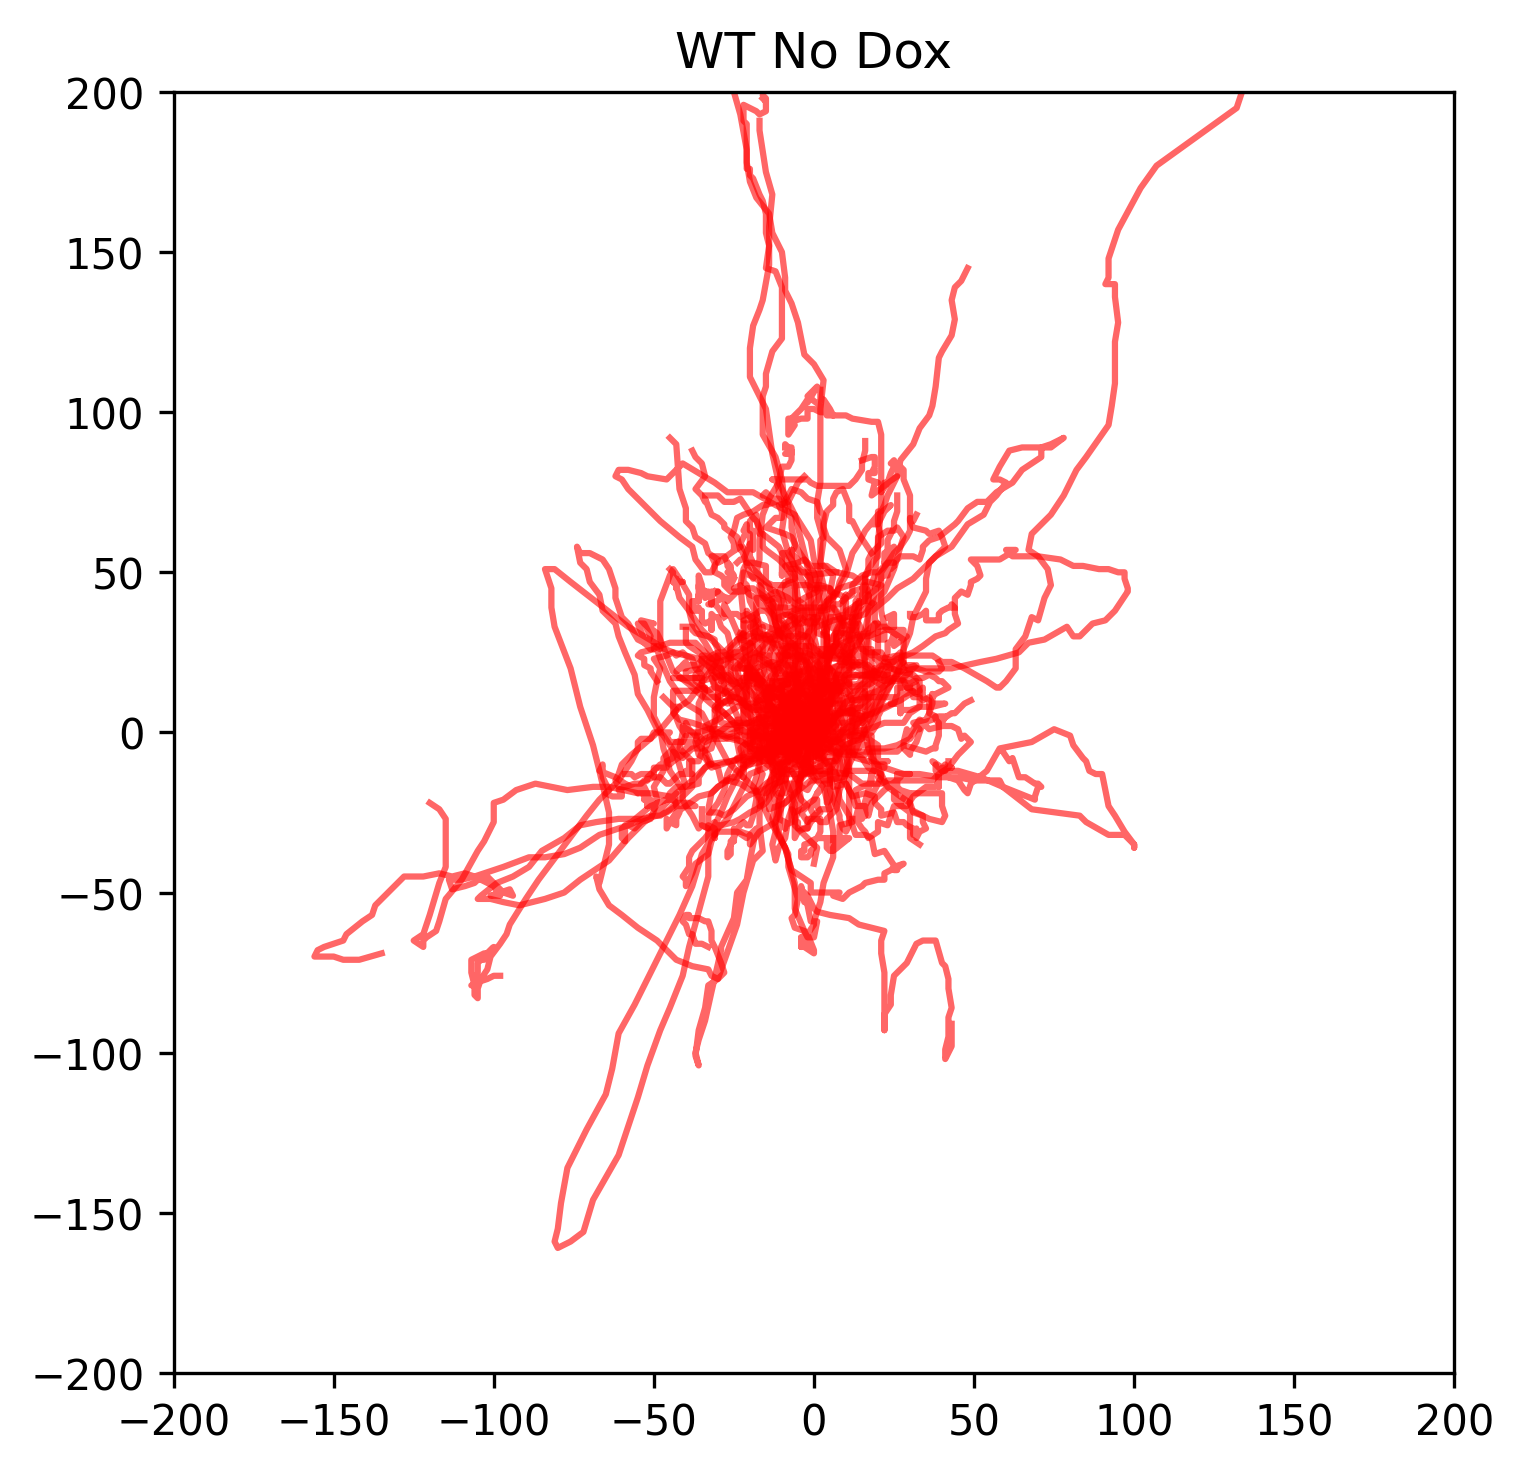

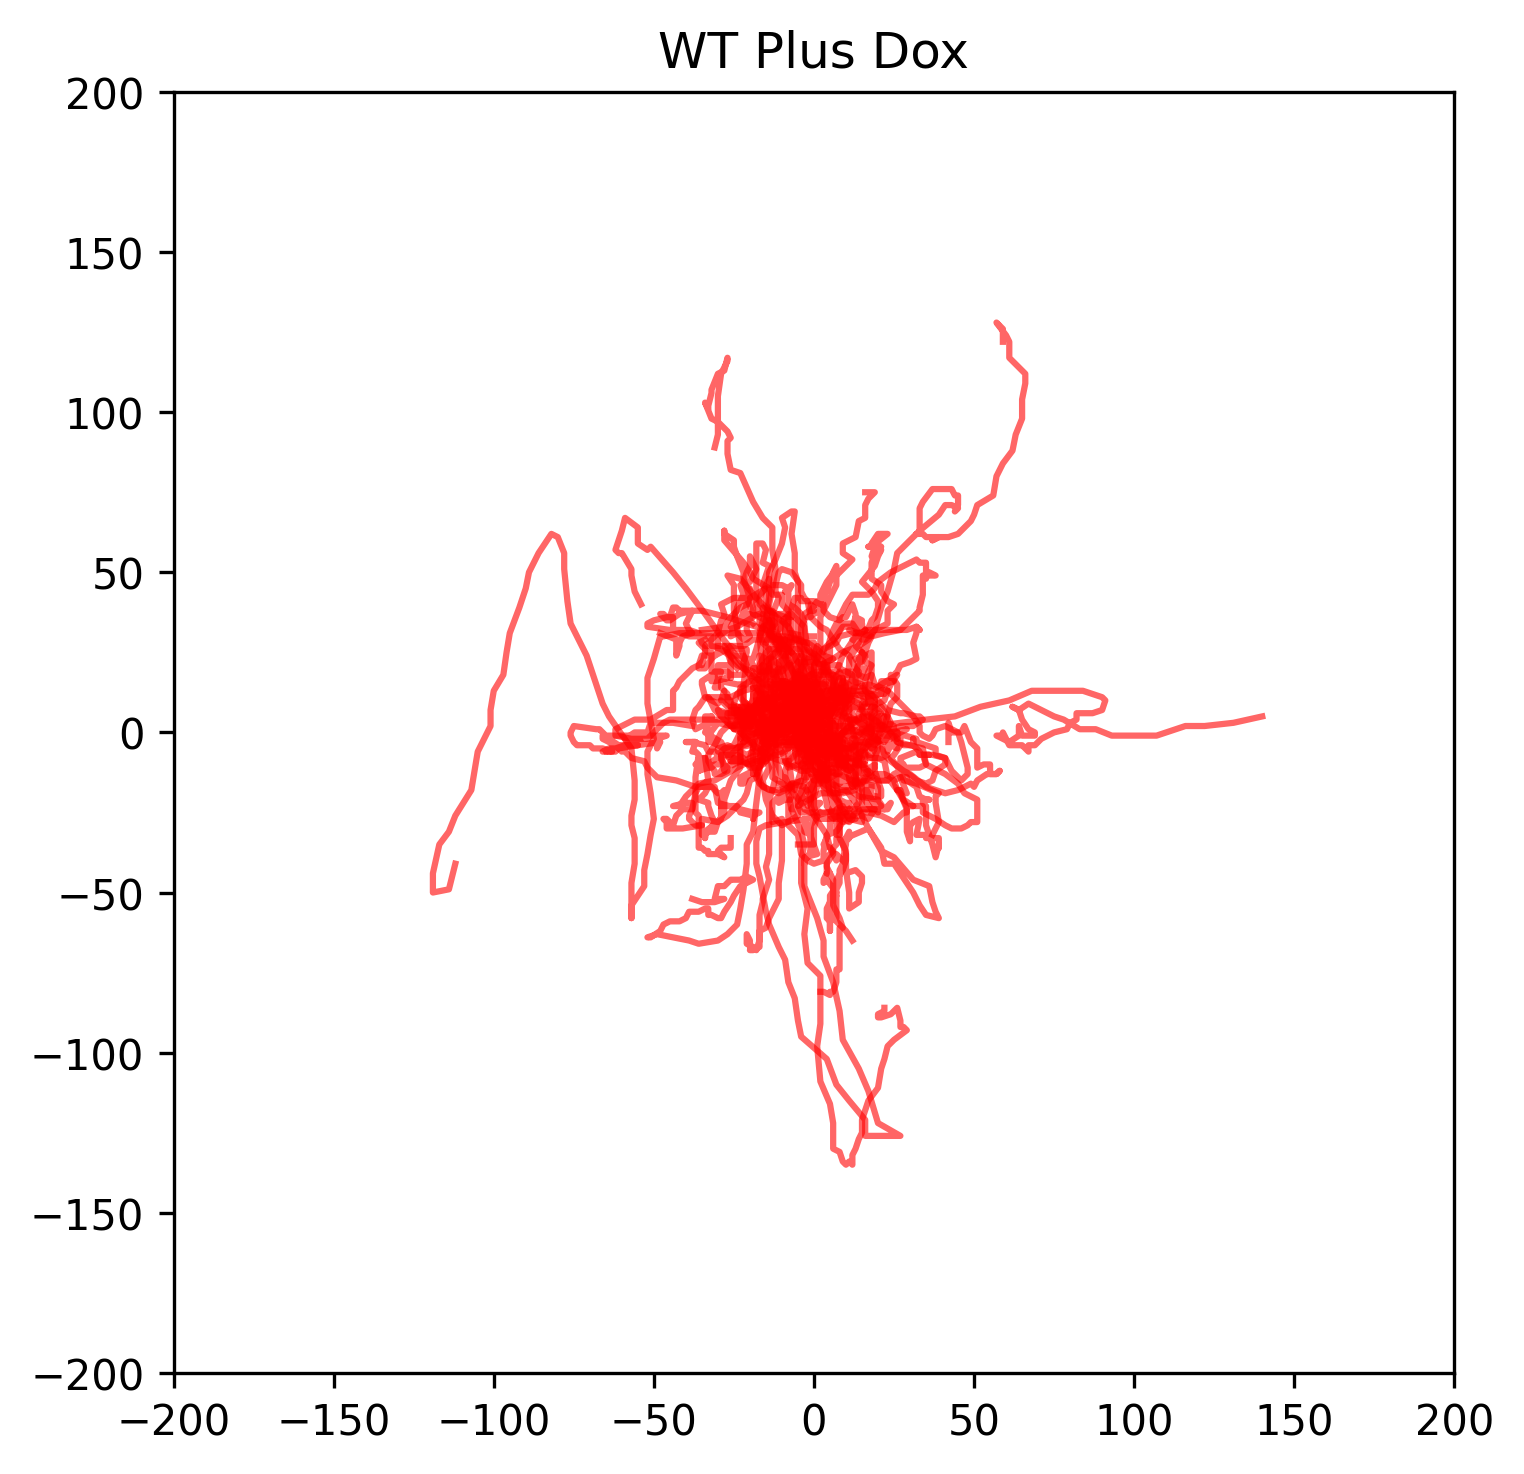

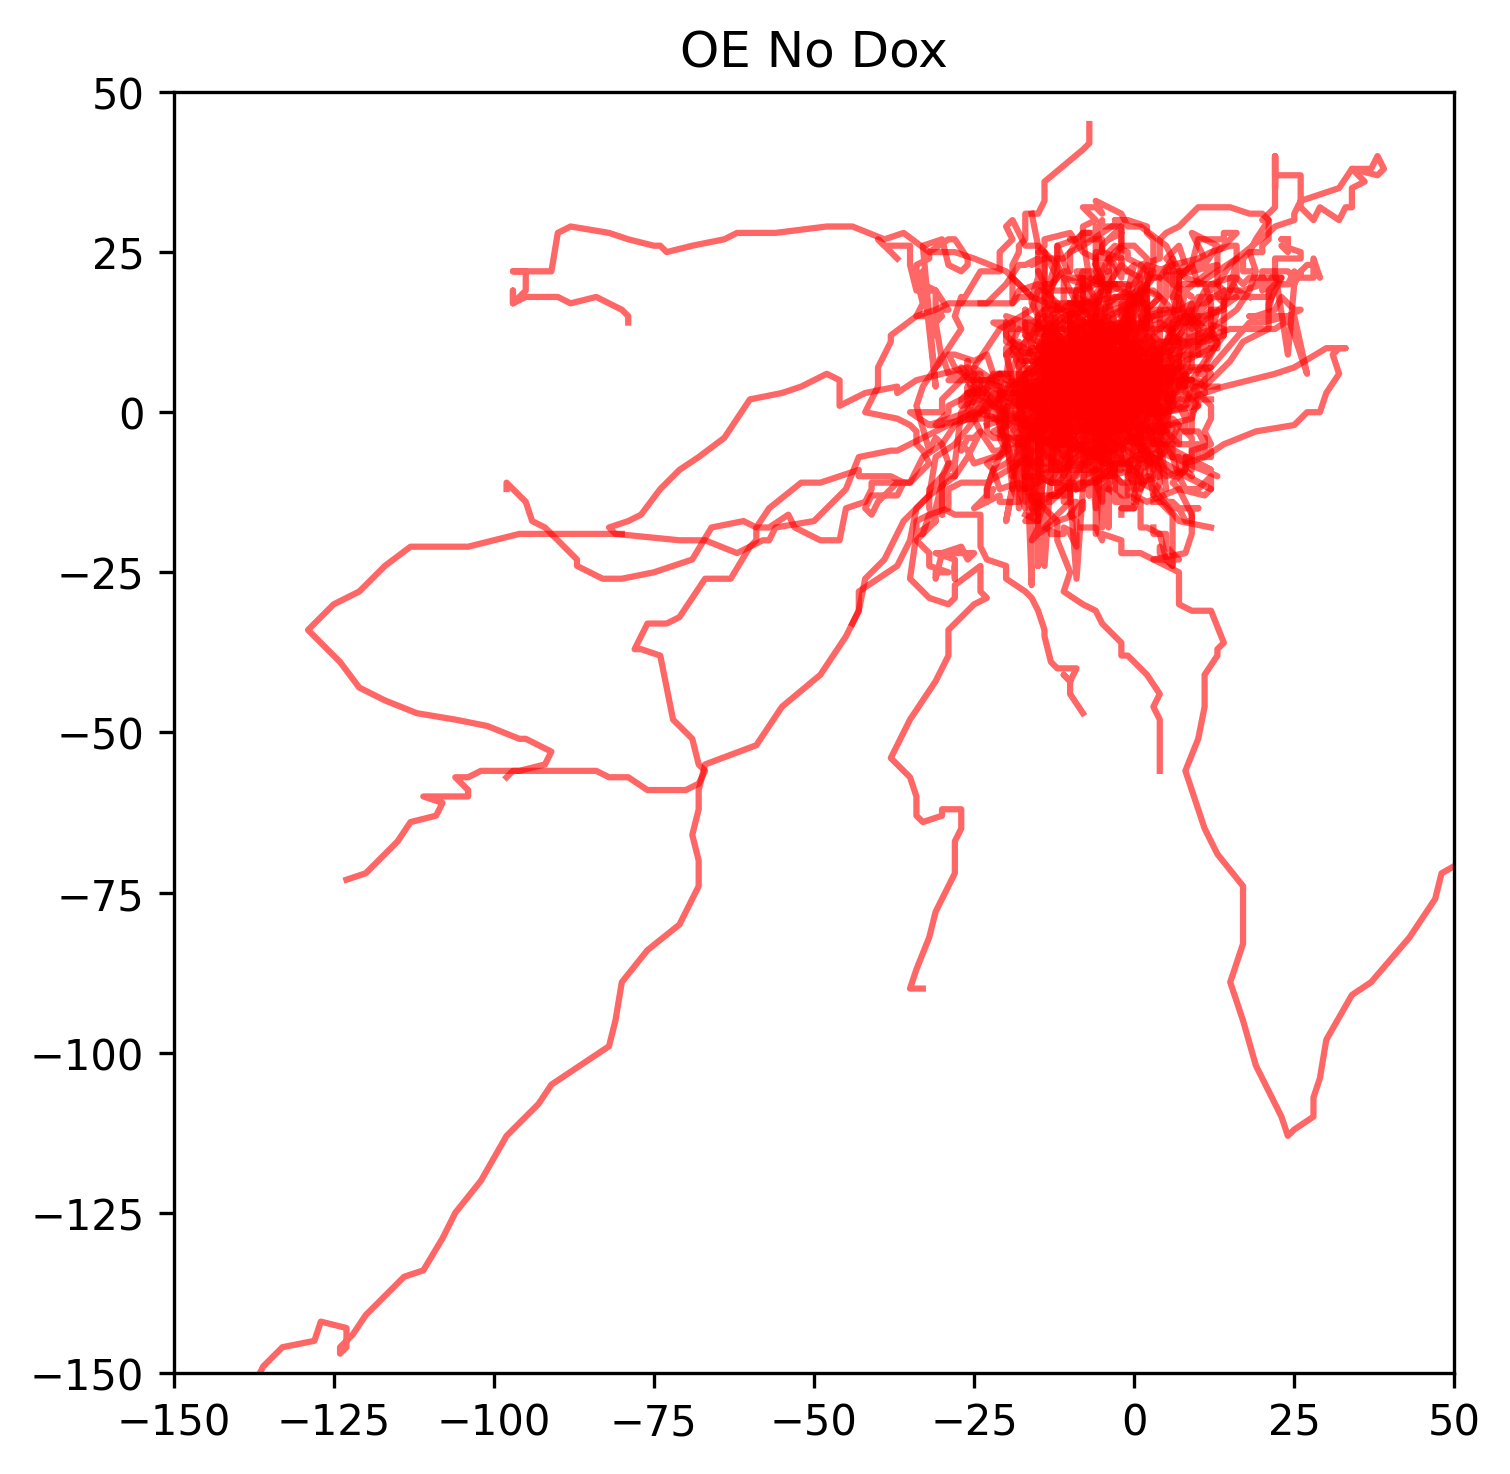

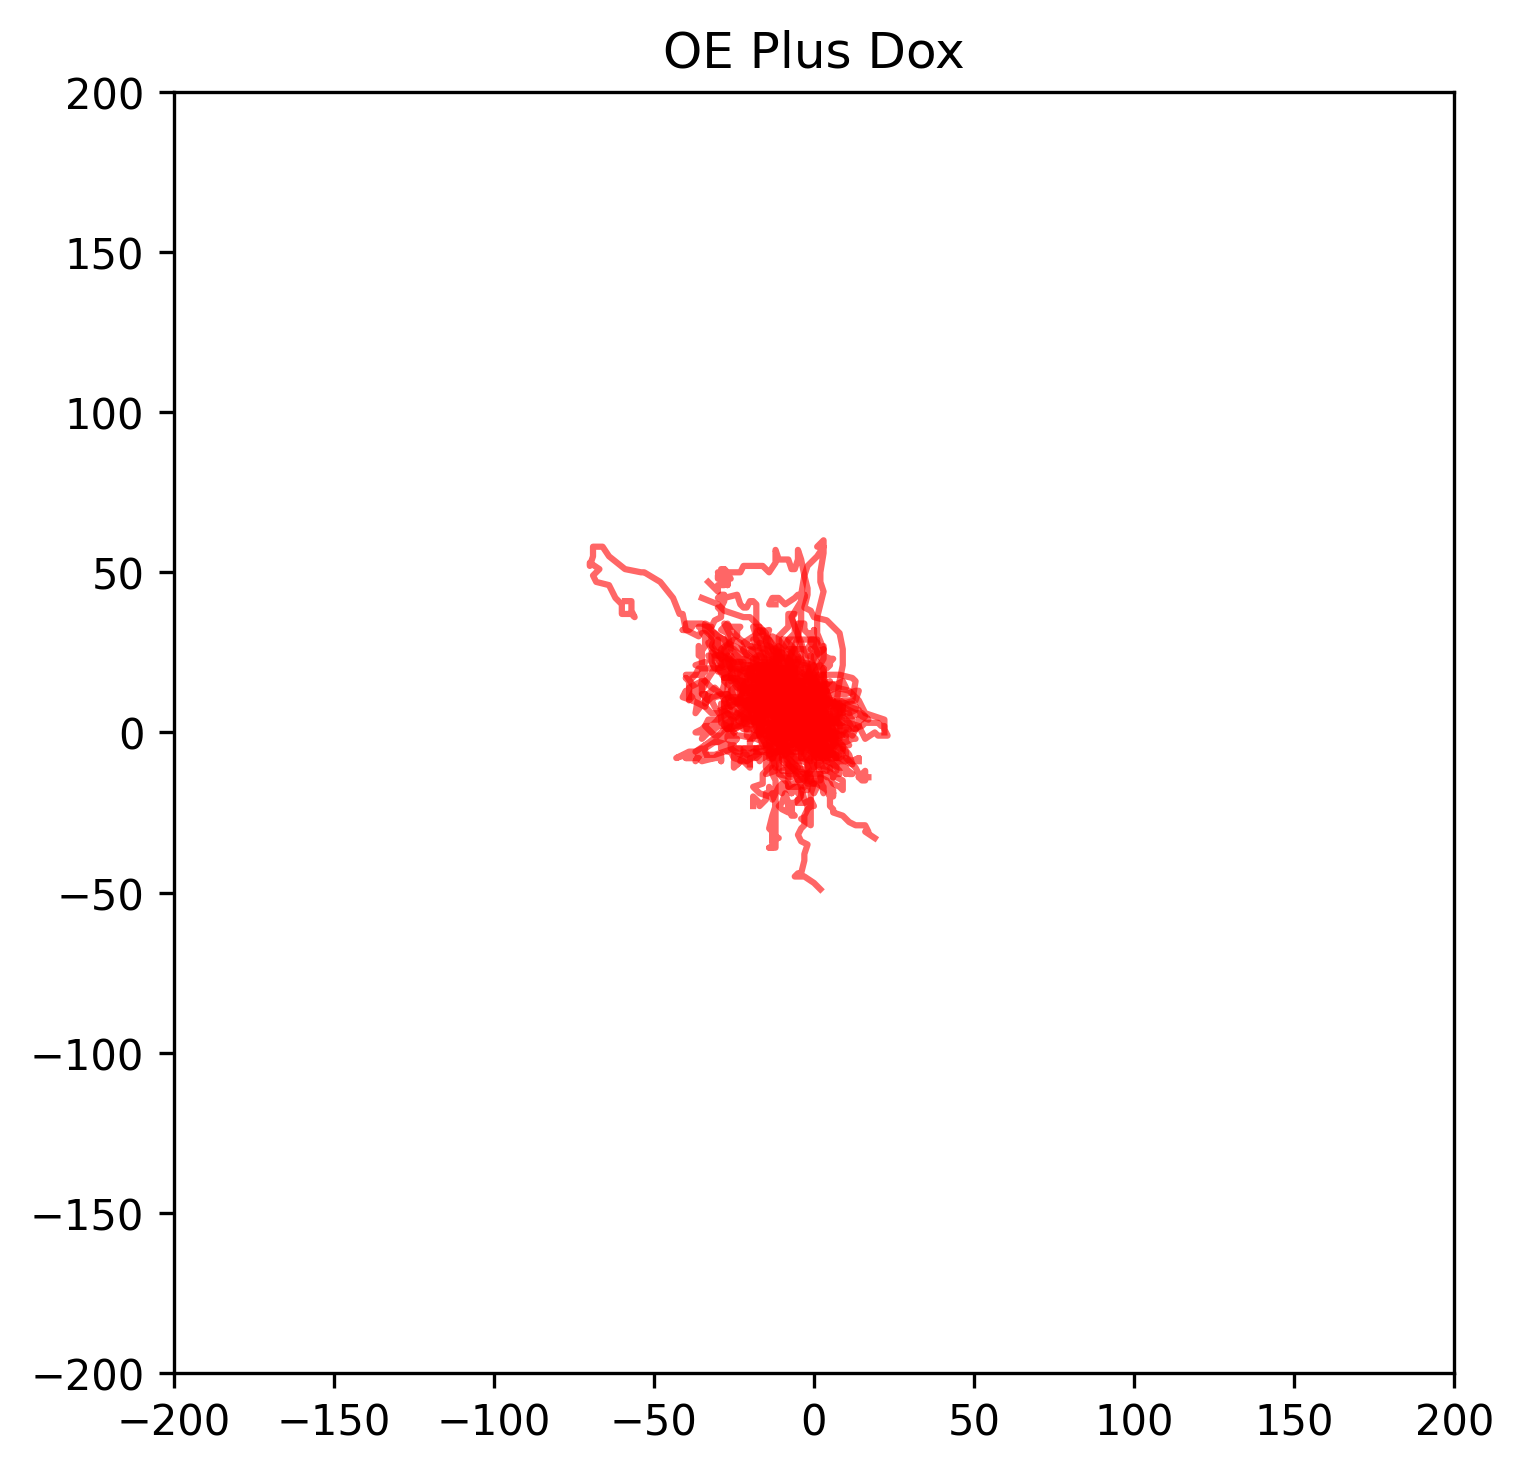

In [315]:
fig1, axis1 = plt.subplots(dpi=300, layout="constrained")
fig2, axis2 = plt.subplots(dpi=300, layout="constrained")
fig3, axis3 = plt.subplots(dpi=300, layout="constrained")
fig4, axis4 = plt.subplots(dpi=300, layout="constrained")
axes = np.array([[axis1,axis2],[axis3,axis4]])

for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    xfinal, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well,ring = track_id.split('_')[0:2]

    x = df['X'].to_numpy() - x_init
    y = df['Y'].to_numpy() - y_init

    if ring == 'RED': continue
    if ring == '0': continue
    elif well in ['XY01','XY05','XY09']: axes[0,0].plot(x,y,'r-', linewidth=1.5, alpha=0.6)
    elif well in ['XY02','XY06','XY10']: axes[0,1].plot(x,y,'r-', linewidth=1.5, alpha=0.6)
    elif well in ['XY03','XY07','XY11']: axes[1,0].plot(x,y,'r-', linewidth=1.5, alpha=0.6)
    elif well in ['XY04','XY08','XY12']: axes[1,1].plot(x,y,'r-', linewidth=1.5, alpha=0.6)


axes[0,0].set_title('WT No Dox')
axes[0,1].set_title('WT Plus Dox')
axes[1,0].set_title('OE No Dox')
axes[1,1].set_title('OE Plus Dox')

axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

axes[0,0].set_xlim(-200,200)
axes[0,1].set_xlim(-200,200)
axes[1,0].set_xlim(-150,50)
axes[1,1].set_xlim(-200,200)

axes[0,0].set_ylim(-200,200)
axes[0,1].set_ylim(-200,200)
axes[1,0].set_ylim(-150,50)
axes[1,1].set_ylim(-200,200)

plt.show()

# Forward Migration Index

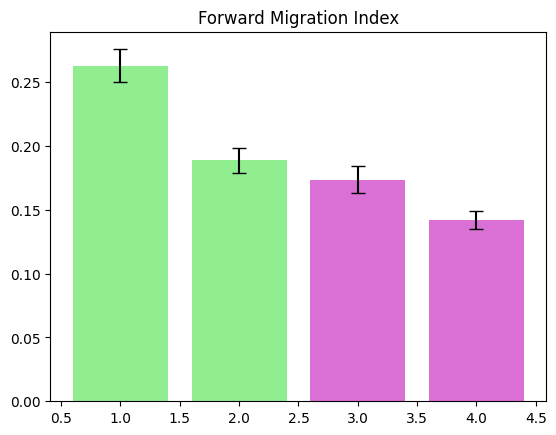

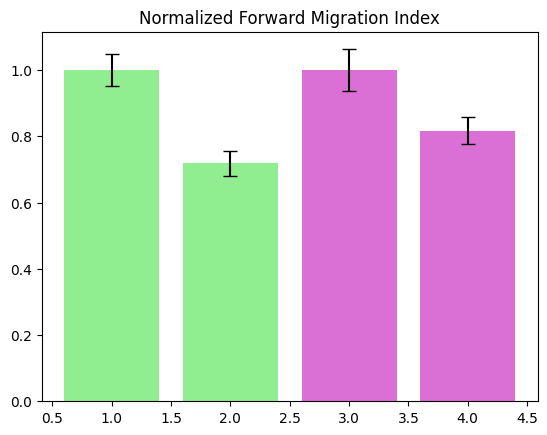

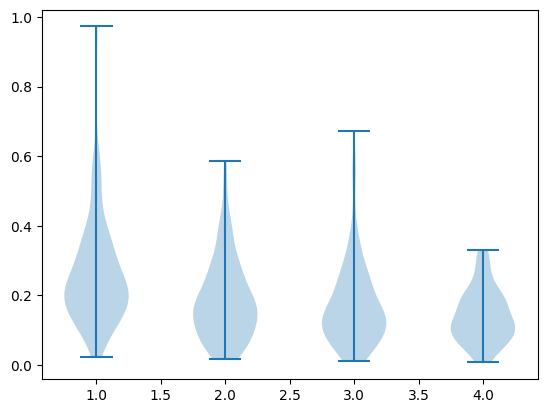

0.04961781652268018


In [32]:
# Net displacement / total displacement

# Calculate net displacement
a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    x_init, y_init = (df['X'].iloc[0], df['Y'].iloc[0])
    x_final, y_final = (df['X'].iloc[-1], df['Y'].iloc[-1])
    well = track_id.split('_')[0]

    dx = x_final - x_init
    dy = y_final - y_init
    net_displacement = np.sqrt((dx**2) + (dy**2))

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: a.append(net_displacement)
    elif well in ['XY02','XY06','XY10']: b.append(net_displacement)
    elif well in ['XY03','XY07','XY11']: c.append(net_displacement)
    elif well in ['XY04','XY08','XY12']: d.append(net_displacement)

# Calculate total displacement
a2,b2,c2,d2 = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    total_displacement = np.sqrt((dx**2) + (dy**2)).sum()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: a2.append(total_displacement)
    elif well in ['XY02','XY06','XY10']: b2.append(total_displacement)
    elif well in ['XY03','XY07','XY11']: c2.append(total_displacement)
    elif well in ['XY04','XY08','XY12']: d2.append(total_displacement)

fmi_a = np.array(a) / np.array(a2)
fmi_b = np.array(b) / np.array(b2)
fmi_c = np.array(c) / np.array(c2)
fmi_d = np.array(d) / np.array(d2)

all_data = [fmi_a, fmi_b, fmi_c, fmi_d]

plt.bar([1,2,3,4], height=[np.mean(data) for data in all_data], yerr=[np.std(data)/np.sqrt(len(data)) for data in all_data], color=['lightgreen','lightgreen','orchid','orchid'], capsize=5)
plt.title('Forward Migration Index')
plt.show()

normalized_data = [fmi_a/fmi_a.mean(), fmi_b/fmi_a.mean(), fmi_c/fmi_c.mean(), fmi_d/fmi_c.mean()]
plt.bar([1,2,3,4], height=[np.mean(data) for data in normalized_data], yerr=[np.std(data)/np.sqrt(len(data)) for data in normalized_data], color=['lightgreen','lightgreen','orchid','orchid'], capsize=5)
plt.title('Normalized Forward Migration Index')
plt.show()

plt.violinplot(all_data)
plt.show()
print(ranksums(normalized_data[1], normalized_data[3]).pvalue)

# Turn angle persistance

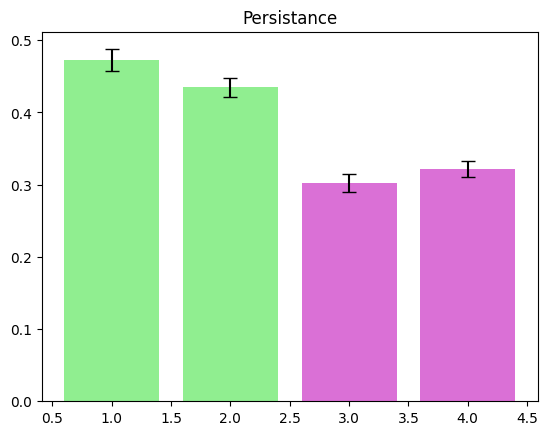

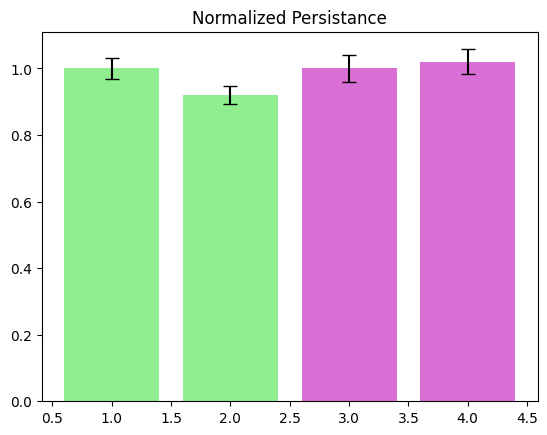

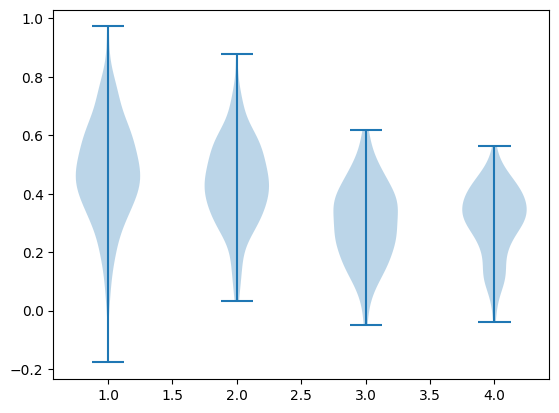

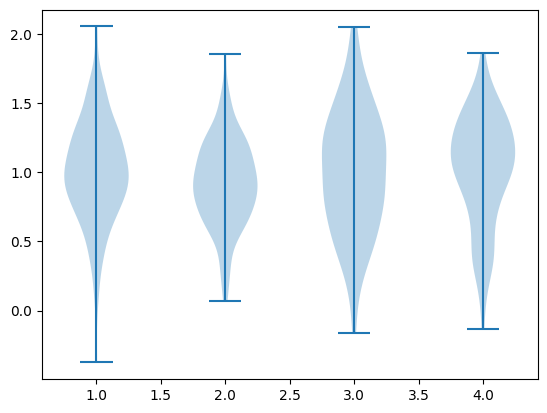

0.00476023005408077


In [33]:
# cos(turn_angle).mean()

a,b,c,d = [], [], [], []
for track_id, df in tracks.items():
    well = track_id.split('_')[0]
    dx = df['X'].iloc[1:].to_numpy() - df['X'].iloc[:-1].to_numpy()
    dy = df['Y'].iloc[1:].to_numpy() - df['Y'].iloc[:-1].to_numpy()
    displacement_magnitudes = np.sqrt((dx**2) + (dy**2))
    displacement_angles = np.arctan2(dy,dx)
    turn_angles = np.absolute(displacement_angles[1:] - displacement_angles[:-1])
    turn_angles = np.where(turn_angles>math.pi, (2*math.pi)-turn_angles, turn_angles)
    
    persistance = np.cos(turn_angles).mean()

    if track_id.split('_')[1] == 'RED': continue
    elif well in ['XY01','XY05','XY09']: a.append(persistance)
    elif well in ['XY02','XY06','XY10']: b.append(persistance)
    elif well in ['XY03','XY07','XY11']: c.append(persistance)
    elif well in ['XY04','XY08','XY12']: d.append(persistance)

a,b,c,d = [np.array(a), np.array(b), np.array(c), np.array(d)]
all_data = [a, b, c, d]

plt.bar([1,2,3,4], height=[np.median(data) for data in all_data], yerr=[np.std(data)/np.sqrt(len(data)) for data in all_data], color=['lightgreen','lightgreen','orchid','orchid'], capsize=5)
plt.title('Persistance')
plt.show()

normalized_data = [a/a.mean(), b/a.mean(), c/c.mean(), d/c.mean()]
plt.bar([1,2,3,4], height=[np.mean(data) for data in normalized_data], yerr=[np.std(data)/np.sqrt(len(data)) for data in normalized_data], color=['lightgreen','lightgreen','orchid','orchid'], capsize=5)
plt.title('Normalized Persistance')
plt.show()

plt.violinplot(all_data)
plt.show()

plt.violinplot(normalized_data)
plt.show()

print(ranksums(normalized_data[1], normalized_data[3]).pvalue)